In [119]:
'''

'''
import torch
import torch.nn as nn
import math
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
import torch.utils.data
from sklearn.metrics import r2_score
import seaborn as sns
import time
import pandas as pd
from os import listdir

print(time.strftime('%Y-%m-%d %H:%M', time.localtime()))
print(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

2020-08-16 17:45
cuda


48      0.777293
216     0.863341
384     0.842269
552     0.837722
720     0.730724
888     0.707864
1056    0.806842
1224    0.565191
1392    0.712119
1560    0.698218
1728    0.681129
1896    0.856775
2064    0.849222
2232    0.869392
2400    0.895933
2568    0.747485
2736    0.740064
2904    0.831745
3072    0.812430
3240    0.811334
3408    0.842296
3576    0.777604
3744    0.844625
3912    0.795604
4080    0.815187
4248    0.838694
4416    0.846597
4584    0.806559
4752    0.721226
4920    0.602403
5088    0.818132
5256    0.868932
5424    0.780305
5592    0.835477
5760    0.855949
5928    0.709908
6096    0.648422
Name: rsq, dtype: float64
paper average pos : 0.7173826393323213
average pos X: 0.6497649212096884
average pos Y: 0.785000357454954
paper average vel : 0.7307841083016955
average vel X: 0.6915529277169302
average vel Y: 0.7700152888864608
paper average acc : 0.44146312245898545
average acc X: 0.4087185805417041
average acc Y: 0.47420766437626677
-----------------------

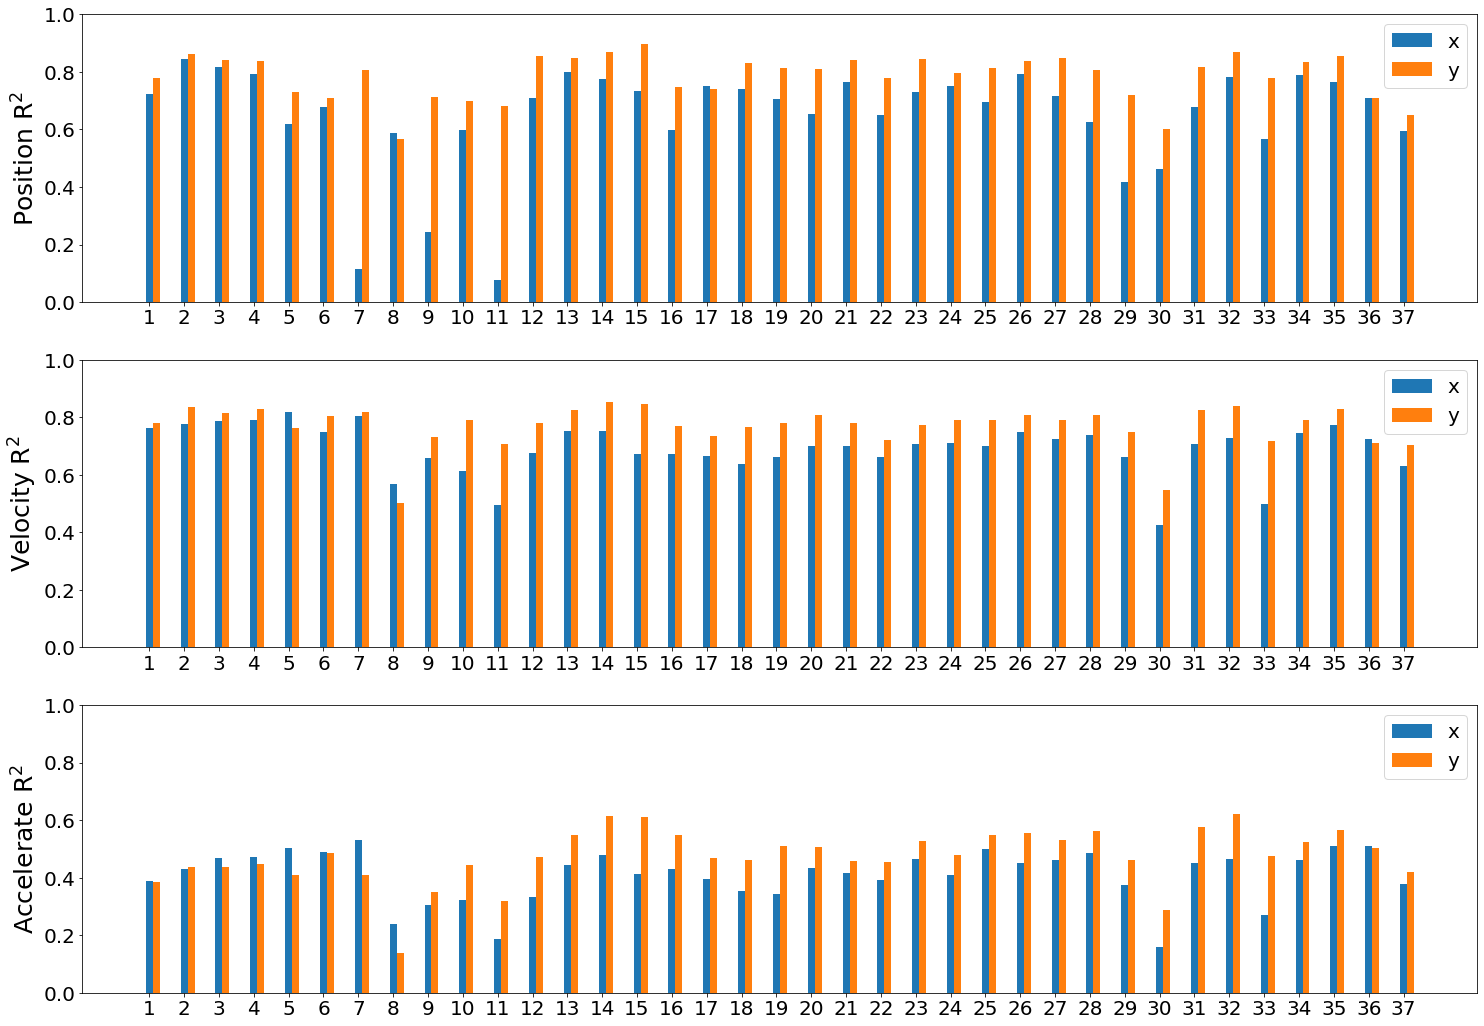

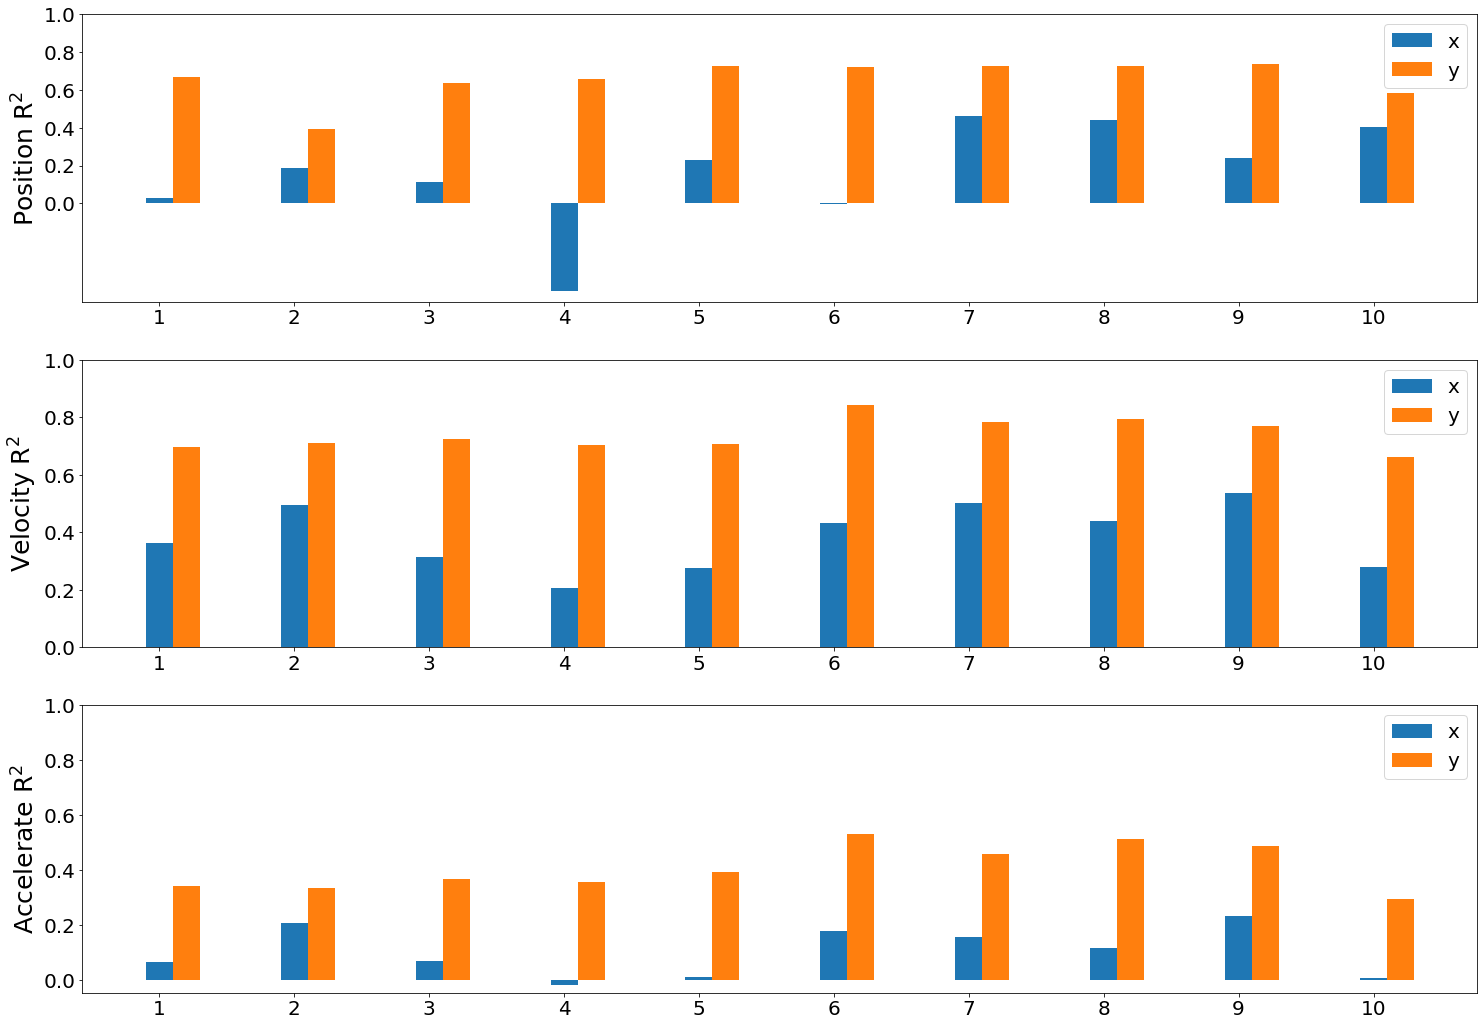

In [8]:
'''
讀取 I跟L的single session testing count && R2
論文的test data 數量 以及 I:session1~37 && L:session1~10,time bin = 64 的r2 數據
Indy && loco
'''
df = pd.read_csv('/home/nclab62159/workspace/refh_results.csv')

# indy
indy_data = df[(df["kinematic_axis"] == "posy") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'indy') & (df["rsq"][:]) ]
indy_paper_pos_x = df[(df["kinematic_axis"] == "posx") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'indy') ]
indy_paper_pos_x = indy_paper_pos_x['rsq']
indy_paper_pos_y = df[(df["kinematic_axis"] == "posy") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'indy')  ]
indy_paper_pos_y = indy_paper_pos_y['rsq']


indy_paper_vel_x = df[(df["kinematic_axis"] == "velx") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'indy') ]
indy_paper_vel_x = indy_paper_vel_x['rsq']
indy_paper_vel_y = df[(df["kinematic_axis"] == "vely") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'indy') ]
indy_paper_vel_y = indy_paper_vel_y['rsq']


indy_paper_acc_x = df[(df["kinematic_axis"] == "accx") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'indy') ]
indy_paper_acc_x = indy_paper_acc_x['rsq']
indy_paper_acc_y = df[(df["kinematic_axis"] == "accy") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'indy') ]
indy_paper_acc_y = indy_paper_acc_y['rsq']

print(indy_data['rsq'][:])
plot_pos =[]
for i in range(37):
    plot_pos.append(i+1)
plot_pos = np.array(plot_pos)
y_ticks = np.array([0, .2, .4, .6, .8, 1.0])
width = 0.2
fig,ax_ = plt.subplots(3,1, figsize=(25,18))
ax_[0].bar(plot_pos, indy_paper_pos_x, width,label = 'x')
ax_[0].bar(plot_pos+0.2, indy_paper_pos_y, width,label = 'y')
ax_[0].set_xticks(plot_pos)
ax_[0].set_xticklabels(plot_pos)
ax_[0].set_ylabel('Position R$^{2}$', size = 25)
ax_[0].set_xticks(plot_pos)
ax_[0].set_xticklabels(plot_pos, size= 20)
ax_[0].set_yticks(y_ticks)
ax_[0].set_yticklabels(y_ticks, size= 20)
ax_[0].legend(fontsize = 20)

ax_[1].bar(plot_pos, indy_paper_vel_x, width,label = 'x')
ax_[1].bar(plot_pos+0.2, indy_paper_vel_y, width,label = 'y')
ax_[1].set_xticks(plot_pos)
ax_[1].set_xticklabels(plot_pos)
ax_[1].set_ylabel('Velocity R$^{2}$', size = 25)
ax_[1].set_xticks(plot_pos)
ax_[1].set_xticklabels(plot_pos, size= 20)
ax_[1].set_yticks(y_ticks)
ax_[1].set_yticklabels(y_ticks, size= 20)
ax_[1].legend(fontsize = 20)

ax_[2].bar(plot_pos, indy_paper_acc_x, width,label = 'x')
ax_[2].bar(plot_pos+0.2, indy_paper_acc_y, width,label = 'y')
ax_[2].set_xticks(plot_pos)
ax_[2].set_xticklabels(plot_pos)
ax_[2].set_ylabel('Accelerate R$^{2}$', size = 25)
ax_[2].set_xticks(plot_pos)
ax_[2].set_xticklabels(plot_pos, size= 20)
ax_[2].set_yticks(y_ticks)
ax_[2].set_yticklabels(y_ticks, size= 20)
ax_[2].legend(fontsize = 20)

print('paper average pos :',(np.mean(indy_paper_pos_x)+np.mean(indy_paper_pos_y))/2)
print('average pos X:', np.mean(indy_paper_pos_x))
print('average pos Y:', np.mean(indy_paper_pos_y))
print('paper average vel :',(np.mean(indy_paper_vel_x)+np.mean(indy_paper_vel_y))/2)
print('average vel X:', np.mean(indy_paper_vel_x))
print('average vel Y:', np.mean(indy_paper_vel_y))
print('paper average acc :',(np.mean(indy_paper_acc_x)+np.mean(indy_paper_acc_y))/2)   
print('average acc X:', np.mean(indy_paper_acc_x))
print('average acc Y:', np.mean(indy_paper_acc_y))

print('-----------------------------------------')
# loco
loco_data = df[(df["kinematic_axis"] == "posy") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'loco') & (df["rsq"][:]) ]
loco_paper_pos_x = df[(df["kinematic_axis"] == "posx") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'loco') ]
loco_paper_pos_x = loco_paper_pos_x['rsq']
loco_paper_pos_y = df[(df["kinematic_axis"] == "posy") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'loco')  ]
loco_paper_pos_y = loco_paper_pos_y['rsq']


loco_paper_vel_x = df[(df["kinematic_axis"] == "velx") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'loco') ]
loco_paper_vel_x = loco_paper_vel_x['rsq']
loco_paper_vel_y = df[(df["kinematic_axis"] == "vely") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'loco') ]
loco_paper_vel_y = loco_paper_vel_y['rsq']

loco_paper_acc_x = df[(df["kinematic_axis"] == "accx") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'loco') ]
loco_paper_acc_x = loco_paper_acc_x['rsq']
loco_paper_acc_y = df[(df["kinematic_axis"] == "accy") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'loco') ]
loco_paper_acc_y = loco_paper_acc_y['rsq']
print(loco_data['rsq'][:])
plot_pos =[]
for i in range(len(loco_data['rsq'])):
    plot_pos.append(i+1)
plot_pos = np.array(plot_pos)
y_ticks = np.array([0, .2, .4, .6, .8, 1.0])
width = 0.2
fig,ax_ = plt.subplots(3,1, figsize=(25,18))
ax_[0].bar(plot_pos, loco_paper_pos_x, width,label = 'x')
ax_[0].bar(plot_pos+0.2, loco_paper_pos_y, width,label = 'y')
ax_[0].set_xticks(plot_pos)
ax_[0].set_xticklabels(plot_pos)
ax_[0].set_ylabel('Position R$^{2}$', size = 25)
ax_[0].set_xticks(plot_pos)
ax_[0].set_xticklabels(plot_pos, size= 20)
ax_[0].set_yticks(y_ticks)
ax_[0].set_yticklabels(y_ticks, size= 20)
ax_[0].legend(fontsize = 20)

ax_[1].bar(plot_pos, loco_paper_vel_x, width,label = 'x')
ax_[1].bar(plot_pos+0.2, loco_paper_vel_y, width,label = 'y')
ax_[1].set_xticks(plot_pos)
ax_[1].set_xticklabels(plot_pos)
ax_[1].set_ylabel('Velocity R$^{2}$', size = 25)
ax_[1].set_xticks(plot_pos)
ax_[1].set_xticklabels(plot_pos, size= 20)
ax_[1].set_yticks(y_ticks)
ax_[1].set_yticklabels(y_ticks, size= 20)
ax_[1].legend(fontsize = 20)

ax_[2].bar(plot_pos, loco_paper_acc_x, width,label = 'x')
ax_[2].bar(plot_pos+0.2, loco_paper_acc_y, width,label = 'y')
ax_[2].set_xticks(plot_pos)
ax_[2].set_xticklabels(plot_pos)
ax_[2].set_ylabel('Accelerate R$^{2}$', size = 25)
ax_[2].set_xticks(plot_pos)
ax_[2].set_xticklabels(plot_pos, size= 20)
ax_[2].set_yticks(y_ticks)
ax_[2].set_yticklabels(y_ticks, size= 20)
ax_[2].legend(fontsize = 20)


print('paper average pos :',(np.mean(loco_paper_pos_x)+np.mean(loco_paper_pos_y))/2)
print('average pos X:', np.mean(loco_paper_pos_x))
print('average pos Y:', np.mean(loco_paper_pos_y))
print('paper average vel :',(np.mean(loco_paper_vel_x)+np.mean(loco_paper_vel_y))/2)
print('average vel X:', np.mean(loco_paper_vel_x))
print('average vel Y:', np.mean(loco_paper_vel_y))
print('paper average acc :',(np.mean(loco_paper_acc_x)+np.mean(loco_paper_acc_y))/2)   
print('average acc X:', np.mean(loco_paper_acc_x))
print('average acc Y:', np.mean(loco_paper_acc_y))

In [85]:
'''
承上 論文 測試筆數
'''
Paper_Test_Count_Indy = np.array([7777,9894,8749,16212,3187,19268,22532,33276,2812,47546,
                          17863,953,2059,627,1083,1578,2199,1343,843,2843,
                          2677,5527,3085, 3109, 2747, 2380, 2875, 2772, 4046, 6529,
                          1954, 3761, 4005, 4527, 4218, 6461,7749])
Paper_Test_Count_Loco = np.array([2500 ,26200 ,5859 ,12090 ,7031 ,5979 ,25703 ,15078 ,4218 ,17656])
d_indy = df[(df["kinematic_axis"] == "accy") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'indy') ]
print(d_indy['num_testing_samples'])
print(len(Paper_Test_Count_Indy))
print('------------------')
d_loco = df[(df["kinematic_axis"] == "accy") &(df["bin_width"] == 64) & (df["decoder"] == 'rEFH_dynamic') 
                & (df["monkey"] == 'loco') ]
print(d_loco['num_testing_samples'])
print(len(Paper_Test_Count_Loco))

160      7777
328      9894
496      8749
664     16212
832      3187
1000    19268
1168    22532
1336    33276
1504     2812
1672    47546
1840    17863
2008      953
2176     2059
2344      627
2512     1083
2680     1578
2848     2199
3016     1343
3184      843
3352     2843
3520     2677
3688     5527
3856     3085
4024     3109
4192     2747
4360     2380
4528     2875
4696     2772
4864     4046
5032     6529
5200     1954
5368     3761
5536     4005
5704     4527
5872     4218
6040     6461
6208     7749
Name: num_testing_samples, dtype: int64
37
------------------
6376     2500
6544    26200
6712     5859
6880    12090
7048     7031
7216     5979
7384    25703
7552    15078
7720     4218
7888    17656
Name: num_testing_samples, dtype: int64
10


In [16]:
def Get_SNR(R_square):
    return (-10)*(math.log10(1- R_square))

def Get_Spike_Firing(firing_point, bins):
    '''
    將取得的firing 時間轉換成計數
    input array is spike firing time
    used this to count amount
    ex: 
        以 indy_20160407_02.mat 為例
        t最後一筆為882.78
        但是
        計算 firing 的點為 887.7254（hash_unit 的最後一筆）
        所以只計算時間內的firing 次數
    '''
    spike_data = []
    time_last_point = bins[-1]
    
    for kk in firing_point:
        if kk < time_last_point:
            spike_data.append(kk)
    mapping_data = np.digitize(spike_data, bins)
    map_data, bin_arr = np.histogram(spike_data, bins = bins)
    return map_data.reshape(-1, len(map_data))

In [15]:
'''
讀取資料檔案路徑
read directory path && sort file
'''
FILE_PATH_indy = str('/home/nclab62159/machineLearning/data__I_download/')
LIST_FILE_indy = listdir(FILE_PATH_indy)
LIST_FILE_indy.sort()
LIST_FILE_indy = LIST_FILE_indy[:]

FILE_PATH_loco = str('/home/nclab62159/machineLearning/data__L_download/')
LIST_FILE_loco = listdir(FILE_PATH_loco)
LIST_FILE_loco.sort()
LIST_FILE_loco = LIST_FILE_loco[:]
print('indy data count:',len(LIST_FILE_indy))
print('loco data count:',len(LIST_FILE_loco))

indy data count: 37
loco data count: 10


In [18]:
'''
read session data 
indy 電極排列 M1 && S1 不同
loco M1 & S1 一致
indy M1's channel array is same loco M1 && S1
'''
indy_ch_array = []
indy_ch_array.append(['N', 42, 46, 25, 31, 35, 39, 41, 47, 'N'])
indy_ch_array.append([38, 40, 48, 27, 29, 33, 37, 43,  6, 45])
indy_ch_array.append([34, 36, 44,  1,  9, 13, 17, 21,  2, 88])
indy_ch_array.append([30, 32, 89, 93,  5, 15, 19, 23,  8, 84])
indy_ch_array.append([26, 28, 81, 85, 87, 91,  7,  4, 86, 80])
indy_ch_array.append([22, 24, 77, 79, 83,  3, 11, 66, 82, 76])
indy_ch_array.append([18, 20, 73, 75, 95, 54, 62, 74, 78, 72])
indy_ch_array.append([14, 16, 94, 96, 57, 58, 50, 70, 64, 68])
indy_ch_array.append([10, 12, 90, 92, 61, 65, 69, 71, 56, 60])
indy_ch_array.append([ 'N', 51, 49, 53, 55, 59, 63, 67, 52 ,'N' ])

indy_ch_list = []
for i in range(10):
    for j in range(10):
        indy_ch_list.append(indy_ch_array[i][j])
        
loco_ch_array = []
loco_ch_array.append(['N', 42, 46, 25, 31, 35, 39, 41, 47, 'N'])
loco_ch_array.append([38, 40, 48, 27, 29, 33, 37, 43,  6, 45])
loco_ch_array.append([34, 36, 44,  1,  9, 13, 17, 21,  2, 88])
loco_ch_array.append([30, 32, 89, 93,  5, 15, 19, 23,  8, 84])
loco_ch_array.append([26, 28, 81, 85, 87, 91,  7,  4, 86, 80])
loco_ch_array.append([22, 24, 77, 79, 83,  3, 11, 66, 82, 76])
loco_ch_array.append([18, 20, 73, 75, 95, 54, 62, 74, 78, 72])
loco_ch_array.append([14, 16, 94, 96, 57, 58, 50, 70, 64, 68])
loco_ch_array.append([10, 12, 90, 92, 61, 65, 69, 71, 56, 60])
loco_ch_array.append([ 'N', 51, 49, 53, 55, 59, 63, 67, 52 ,'N' ])

loco_ch_list = []
for i in range(10):
    for j in range(10):
        loco_ch_list.append(loco_ch_array[i][j])

GET_indy_FILE = []
GET_loco_FILE = []
for n in LIST_FILE_indy:
    GET_indy_FILE.append(FILE_PATH_indy + n)
for n in LIST_FILE_loco:
    GET_loco_FILE.append(FILE_PATH_loco + n)
#------------------------------------------------------------------------------------------
TIME_BIN_SAMPLING = 16 # base bin width is 0.004 , if this var. == 16 , that is mean use 64ms bin width
print('Select time bin width = ', TIME_BIN_SAMPLING*4,'ms')

Select time bin width =  64 ms


In [56]:
# get indy session info.
SESSION_TRIAL_TIME_indy = [] # every session trial total time
SESSION_SORTING_FR_64_indy = []
SESSION_UNSORTING_FR_64_indy = []

SESSION_POS_X_64_indy = [] # 數量減去第一個 ,firing rate 發生後 對應的位置點會是第二筆,所以這邊減去第一筆資料
SESSION_POS_Y_64_indy = []
SESSION_POS_Z_64_indy = []

SESSION_VEL_X_64_indy = []
SESSION_VEL_Y_64_indy = []
SESSION_VEL_Z_64_indy = []

SESSION_ACC_X_64_indy = [] #配合筆數, 第一筆補 0
SESSION_ACC_Y_64_indy = []
SESSION_ACC_Z_64_indy = []

SESSION_DIS_X_64_indy = []
SESSION_DIS_Y_64_indy = []
SESSION_DIS_Z_64_indy = []
for index in range(len(GET_indy_FILE)):
    print('\n------------------------------------------------------')
    print('session ', index+1)
    file_path = str(GET_indy_FILE[index]) #
    file_name = str(LIST_FILE_indy[index])
    print('file name ==', file_name)
    print('------------------------------------------------------\n')
    mat_file = h5py.File(file_path, 'r') # read mat file
    CHANNELS = mat_file[list(mat_file.keys())[1]]
    
    CURSOR_POS = mat_file[list(mat_file.keys())[2]]
    
    FINGER_POS = mat_file[list(mat_file.keys())[3]]
    
    SPIKES = mat_file[list(mat_file.keys())[4]]
    session_unit = SPIKES.shape[0]
    TIMES = mat_file[list(mat_file.keys())[5]]
    t = TIMES[0]
    time_bins = t[::TIME_BIN_SAMPLING]
    print('File keys() :', list(mat_file.keys()))
    print('Channel count :', CHANNELS)
    print('Cursor position :', CURSOR_POS)
    print('Finger position :', FINGER_POS)
    print('Spike  :', SPIKES)
    print('Time :', TIMES)
    print('\nTime (bin width = ',np.round(TIME_BIN_SAMPLING*(t[1]-t[0]),4),') :', time_bins)
    print('Trial Time :', t[-1] - t[0])
    SESSION_TRIAL_TIME_indy.append((t[-1] - t[0]))
    print('Session time count(\''+str(np.round(TIME_BIN_SAMPLING*(t[1]-t[0]),4))+'\'):' ,t[::TIME_BIN_SAMPLING].shape[0])
    print('Session unit count : ', session_unit)
    
    # get sorting data && unsorting data
    print('===== Get Session Info. =====')
    # Movement( 位置去掉第一個 ;加速度第一個補0 這樣數量才會跟論文一樣)
    
    finger_pos_z = np.array(FINGER_POS[0][::TIME_BIN_SAMPLING])
    finger_pos_x = np.array(FINGER_POS[1][::TIME_BIN_SAMPLING])
    finger_pos_y = np.array(FINGER_POS[2][::TIME_BIN_SAMPLING])
    print(' == Finger Position shape:',finger_pos_z.shape[0])
    finger_dis_z = (finger_pos_z[1:] - finger_pos_z[:-1])*(-10)
    finger_dis_x = (finger_pos_x[1:] - finger_pos_x[:-1])*(-10)
    finger_dis_y = (finger_pos_y[1:] - finger_pos_y[:-1])*(-10)
    print(' == Finger Distance shape:',finger_dis_z.shape[0])
    # p1-p0/t ,*(-10)配合論文繪圖, cm => mm
    vel_z = (finger_pos_z[1:] - finger_pos_z[:-1])*(-10)/(TIME_BIN_SAMPLING*0.004) 
    vel_x = (finger_pos_x[1:] - finger_pos_x[:-1])*(-10)/(TIME_BIN_SAMPLING*0.004)
    vel_y = (finger_pos_y[1:] - finger_pos_y[:-1])*(-10)/(TIME_BIN_SAMPLING*0.004)
    print(' == Finger Velocity shape:',vel_z.shape[0])
    acc_z = (vel_z[1:] - vel_z[:-1])/(TIME_BIN_SAMPLING*0.004)
    acc_z = np.concatenate((np.zeros(1), acc_z),axis=0)
    acc_x = (vel_x[1:] - vel_x[:-1])/(TIME_BIN_SAMPLING*0.004)
    acc_x = np.concatenate((np.zeros(1), acc_x),axis=0)
    acc_y = (vel_y[1:] - vel_y[:-1])/(TIME_BIN_SAMPLING*0.004)
    acc_y = np.concatenate((np.zeros(1), acc_y),axis=0)
    print(' == Finger Accelerate shape:',acc_z.shape[0])
    # firing rate
    firing_rate_hash = []
    firing_rate_unit2 = []
    firing_rate_unit3 = []
    firing_rate_unit4 = []
    firing_rate_unit5 = []
    num = 0
    for ch_index in indy_ch_list:

        # firing rate
        if str(ch_index) != 'N':
            unit_hash = mat_file[SPIKES[0][ch_index-1]] # 從0開始所以要減1
            unit_02 = mat_file[SPIKES[1][ch_index-1]]
            unit_03 = mat_file[SPIKES[2][ch_index-1]]
            
            
            # unit.shape[0] == 2 表示 .mat檔對應的是空集合的channel
            if unit_hash.shape[0] != 2 : 
                firing_rate_hash = np.concatenate((firing_rate_hash,Get_Spike_Firing(unit_hash[0], time_bins)), axis=0)               
            else:
                firing_rate_hash = np.concatenate((firing_rate_hash, np.zeros([1,time_bins.shape[0]-1])), axis=0)
        
            
            if unit_02.shape[0] != 2 :
                firing_rate_unit2 = np.concatenate((firing_rate_unit2,Get_Spike_Firing(unit_02[0], time_bins)), axis=0)
            else:
                firing_rate_unit2 = np.concatenate((firing_rate_unit2, np.zeros([1,time_bins.shape[0]-1])), axis=0)

            if unit_03.shape[0] != 2 :
                firing_rate_unit3 = np.concatenate((firing_rate_unit3,Get_Spike_Firing(unit_03[0], time_bins)), axis=0)
            else:
                firing_rate_unit3 = np.concatenate((firing_rate_unit3, np.zeros([1,time_bins.shape[0]-1])), axis=0)
            
            if session_unit == 5 :
                unit_04 = mat_file[SPIKES[3][ch_index-1]]
                unit_05 = mat_file[SPIKES[4][ch_index-1]]
                
                if unit_04.shape[0] != 2 :
                    firing_rate_unit4 = np.concatenate((firing_rate_unit4, Get_Spike_Firing(unit_04[0], time_bins)), axis=0)
                else:
                    firing_rate_unit4 = np.concatenate((firing_rate_unit4, np.zeros([1,time_bins.shape[0]-1])), axis=0)
                
                if unit_05.shape[0] != 2 :
                    firing_rate_unit5 = np.concatenate((firing_rate_unit5, Get_Spike_Firing(unit_05[0], time_bins)), axis=0)
                else:
                    firing_rate_unit5 = np.concatenate((firing_rate_unit5, np.zeros([1,time_bins.shape[0]-1])), axis=0)
            
            else:
                firing_rate_unit4 = np.concatenate((firing_rate_unit4, np.zeros([1,time_bins.shape[0]-1])), axis=0)
                firing_rate_unit5 = np.concatenate((firing_rate_unit5, np.zeros([1,time_bins.shape[0]-1])), axis=0)
            
            
        else:
            if num == 0:
                firing_rate_hash = np.zeros([1,time_bins.shape[0]-1])
                firing_rate_unit2 = np.zeros([1,time_bins.shape[0]-1])
                firing_rate_unit3 = np.zeros([1,time_bins.shape[0]-1])
                firing_rate_unit4 = np.zeros([1,time_bins.shape[0]-1])
                firing_rate_unit5 = np.zeros([1,time_bins.shape[0]-1])
            else :
                firing_rate_hash = np.concatenate((firing_rate_hash, np.zeros([1,time_bins.shape[0]-1])), axis=0)
                firing_rate_unit2 = np.concatenate((firing_rate_unit2, np.zeros([1,time_bins.shape[0]-1])), axis=0)
                firing_rate_unit3 = np.concatenate((firing_rate_unit3, np.zeros([1,time_bins.shape[0]-1])), axis=0)
                firing_rate_unit4 = np.concatenate((firing_rate_unit4, np.zeros([1,time_bins.shape[0]-1])), axis=0)
                firing_rate_unit5 = np.concatenate((firing_rate_unit5, np.zeros([1,time_bins.shape[0]-1])), axis=0)
        num +=1
#     print(firing_rate_hash.shape)
#     print(firing_rate_unit4.shape) # np.all(firing_rate_unit4 == 0) 非 5個 unit的可以用此函數驗證 0矩陣
    
    unsort_data = firing_rate_hash + firing_rate_unit2 + firing_rate_unit3+ firing_rate_unit4+firing_rate_unit5
    print('Unsort Firing Rate :',unsort_data.shape)
    print(firing_rate_hash.shape[1])
    sort_data = np.concatenate((firing_rate_hash.reshape(1, firing_rate_hash.shape[0], firing_rate_hash.shape[1]),
                               firing_rate_unit2.reshape(1, firing_rate_unit2.shape[0], firing_rate_unit2.shape[1]),
                               firing_rate_unit3.reshape(1, firing_rate_unit3.shape[0], firing_rate_unit3.shape[1]),
                               firing_rate_unit4.reshape(1, firing_rate_unit4.shape[0], firing_rate_unit4.shape[1]),
                               firing_rate_unit5.reshape(1, firing_rate_unit5.shape[0], firing_rate_unit5.shape[1]),),axis = 0)
    print('sort Firing Rate :',sort_data.shape)
    # Get Data for train
#     SESSION_SORTING_FR_64_indy.append(sort_data)
    SESSION_UNSORTING_FR_64_indy.append(unsort_data)
    
    SESSION_POS_X_64_indy.append(finger_pos_x[1:]) # 數量減去第一個
    SESSION_POS_Y_64_indy.append(finger_pos_y[1:])
    SESSION_POS_Z_64_indy.append(finger_pos_z[1:])
    
#     SESSION_DIS_X_64_indy.append(finger_dis_x)
#     SESSION_DIS_Y_64_indy.append(finger_dis_y)
#     SESSION_DIS_Z_64_indy.append(finger_dis_z)
    
    SESSION_VEL_X_64_indy.append(vel_x)
    SESSION_VEL_Y_64_indy.append(vel_y)
    SESSION_VEL_Z_64_indy.append(vel_z)

    SESSION_ACC_X_64_indy.append(acc_x) #配合筆數, 第一筆補 0
    SESSION_ACC_Y_64_indy.append(acc_y)
    SESSION_ACC_Z_64_indy.append(acc_z)
    print('\n')


------------------------------------------------------
session  1
file name == indy_20160407_02.mat
------------------------------------------------------

File keys() : ['#refs#', 'chan_names', 'cursor_pos', 'finger_pos', 'spikes', 't', 'target_pos', 'wf']
Channel count : <HDF5 dataset "chan_names": shape (1, 192), type "|O">
Cursor position : <HDF5 dataset "cursor_pos": shape (2, 204446), type "<f8">
Finger position : <HDF5 dataset "finger_pos": shape (3, 204446), type "<f8">
Spike  : <HDF5 dataset "spikes": shape (3, 192), type "|O">
Time : <HDF5 dataset "t": shape (1, 204446), type "<f8">

Time (bin width =  0.064 ) : [ 65.     65.064  65.128 ... 882.6   882.664 882.728]
Trial Time : 817.78
Session time count('0.064'): 12778
Session unit count :  3
===== Get Session Info. =====
 == Finger Position shape: 12778
 == Finger Distance shape: 12777
 == Finger Velocity shape: 12777
 == Finger Accelerate shape: 12777
Unsort Firing Rate : (100, 12777)
12777
sort Firing Rate : (5, 100, 1277

Unsort Firing Rate : (100, 7812)
7812
sort Firing Rate : (5, 100, 7812)



------------------------------------------------------
session  10
file name == indy_20160627_01.mat
------------------------------------------------------

File keys() : ['#refs#', 'chan_names', 'cursor_pos', 'finger_pos', 'spikes', 't', 'target_pos', 'wf']
Channel count : <HDF5 dataset "chan_names": shape (1, 96), type "|O">
Cursor position : <HDF5 dataset "cursor_pos": shape (2, 840737), type "<f8">
Finger position : <HDF5 dataset "finger_pos": shape (6, 840737), type "<f8">
Spike  : <HDF5 dataset "spikes": shape (5, 96), type "|O">
Time : <HDF5 dataset "t": shape (1, 840737), type "<f8">

Time (bin width =  0.064 ) : [ 105.936  106.     106.064 ... 3468.752 3468.816 3468.88 ]
Trial Time : 3362.944
Session time count('0.064'): 52547
Session unit count :  5
===== Get Session Info. =====
 == Finger Position shape: 52547
 == Finger Distance shape: 52546
 == Finger Velocity shape: 52546
 == Finger Accelerate shap

Unsort Firing Rate : (100, 6343)
6343
sort Firing Rate : (5, 100, 6343)



------------------------------------------------------
session  19
file name == indy_20161005_06.mat
------------------------------------------------------

File keys() : ['#refs#', 'chan_names', 'cursor_pos', 'finger_pos', 'spikes', 't', 'target_pos', 'wf']
Channel count : <HDF5 dataset "chan_names": shape (1, 96), type "|O">
Cursor position : <HDF5 dataset "cursor_pos": shape (2, 93501), type "<f8">
Finger position : <HDF5 dataset "finger_pos": shape (3, 93501), type "<f8">
Spike  : <HDF5 dataset "spikes": shape (5, 96), type "|O">
Time : <HDF5 dataset "t": shape (1, 93501), type "<f8">

Time (bin width =  0.064 ) : [1288.    1288.064 1288.128 ... 1661.824 1661.888 1661.952]
Trial Time : 374.0
Session time count('0.064'): 5844
Session unit count :  5
===== Get Session Info. =====
 == Finger Position shape: 5844
 == Finger Distance shape: 5843
 == Finger Velocity shape: 5843
 == Finger Accelerate shape: 5843
Un

Unsort Firing Rate : (100, 7875)
7875
sort Firing Rate : (5, 100, 7875)



------------------------------------------------------
session  28
file name == indy_20161026_03.mat
------------------------------------------------------

File keys() : ['#refs#', 'chan_names', 'cursor_pos', 'finger_pos', 'spikes', 't', 'target_pos', 'wf']
Channel count : <HDF5 dataset "chan_names": shape (1, 96), type "|O">
Cursor position : <HDF5 dataset "cursor_pos": shape (2, 124364), type "<f8">
Finger position : <HDF5 dataset "finger_pos": shape (3, 124364), type "<f8">
Spike  : <HDF5 dataset "spikes": shape (5, 96), type "|O">
Time : <HDF5 dataset "t": shape (1, 124364), type "<f8">

Time (bin width =  0.064 ) : [ 94.548  94.612  94.676 ... 591.828 591.892 591.956]
Trial Time : 497.452
Session time count('0.064'): 7773
Session unit count :  5
===== Get Session Info. =====
 == Finger Position shape: 7773
 == Finger Distance shape: 7772
 == Finger Velocity shape: 7772
 == Finger Accelerate shape: 7772
Uns

Unsort Firing Rate : (100, 11461)
11461
sort Firing Rate : (5, 100, 11461)



------------------------------------------------------
session  37
file name == indy_20170131_02.mat
------------------------------------------------------

File keys() : ['#refs#', 'chan_names', 'cursor_pos', 'finger_pos', 'spikes', 't', 'target_pos', 'wf']
Channel count : <HDF5 dataset "chan_names": shape (1, 96), type "|O">
Cursor position : <HDF5 dataset "cursor_pos": shape (2, 203995), type "<f8">
Finger position : <HDF5 dataset "finger_pos": shape (3, 203995), type "<f8">
Spike  : <HDF5 dataset "spikes": shape (5, 96), type "|O">
Time : <HDF5 dataset "t": shape (1, 203995), type "<f8">

Time (bin width =  0.064 ) : [1674.024 1674.088 1674.152 ... 2489.832 2489.896 2489.96 ]
Trial Time : 815.9760000000001
Session time count('0.064'): 12750
Session unit count :  5
===== Get Session Info. =====
 == Finger Position shape: 12750
 == Finger Distance shape: 12749
 == Finger Velocity shape: 12749
 == Finger Acc

In [57]:
# get loco session info.
SESSION_TRIAL_TIME_loco = [] # every session trial total time
SESSION_SORTING_FR_64_loco = []
SESSION_UNSORTING_FR_64_loco = []

SESSION_POS_X_64_loco = [] # 數量減去第一個 ,firing rate 發生後 對應的位置點會是第二筆,所以這邊減去第一筆資料
SESSION_POS_Y_64_loco = []
SESSION_POS_Z_64_loco = []

SESSION_VEL_X_64_loco = []
SESSION_VEL_Y_64_loco = []
SESSION_VEL_Z_64_loco = []

SESSION_ACC_X_64_loco = [] #配合筆數, 第一筆補 0
SESSION_ACC_Y_64_loco = []
SESSION_ACC_Z_64_loco = []

SESSION_DIS_X_64_loco = []
SESSION_DIS_Y_64_loco = []
SESSION_DIS_Z_64_loco = []
for index in range(len(GET_loco_FILE)):
    print('\n------------------------------------------------------')
    print('session ', index+1)
    file_path = str(GET_loco_FILE[index]) #
    file_name = str(LIST_FILE_loco[index])
    print('file name ==', file_name)
    print('------------------------------------------------------\n')
    mat_file = h5py.File(file_path, 'r') # read mat file
    CHANNELS = mat_file[list(mat_file.keys())[1]]
    
    CURSOR_POS = mat_file[list(mat_file.keys())[2]]
    
    FINGER_POS = mat_file[list(mat_file.keys())[3]]
    
    SPIKES = mat_file[list(mat_file.keys())[4]]
    session_unit = SPIKES.shape[0]
    TIMES = mat_file[list(mat_file.keys())[5]]
    t = TIMES[0]
    time_bins = t[::TIME_BIN_SAMPLING]
    print('File keys() :', list(mat_file.keys()))
    print('Channel count :', CHANNELS)
    print('Cursor position :', CURSOR_POS)
    print('Finger position :', FINGER_POS)
    print('Spike  :', SPIKES)
    print('Time :', TIMES)
    print('\nTime (bin width = ',np.round(TIME_BIN_SAMPLING*(t[1]-t[0]),4),') :', time_bins)
    print('Trial Time :', t[-1] - t[0])
    SESSION_TRIAL_TIME_loco.append((t[-1] - t[0]))
    print('Session time count(\''+str(np.round(TIME_BIN_SAMPLING*(t[1]-t[0]),4))+'\'):' ,t[::TIME_BIN_SAMPLING].shape[0])
    print('Session unit count : ', session_unit)
    # get sorting data && unsorting data
    print('===== Get Session Info. =====')
    # Movement( 位置去掉第一個 ;加速度第一個補0 這樣數量才會跟論文一樣)
    
    finger_pos_z = np.array(FINGER_POS[0][::TIME_BIN_SAMPLING])
    finger_pos_x = np.array(FINGER_POS[1][::TIME_BIN_SAMPLING])
    finger_pos_y = np.array(FINGER_POS[2][::TIME_BIN_SAMPLING])
    print(' == Finger Position shape:',finger_pos_z.shape[0])
    finger_dis_z = (finger_pos_z[1:] - finger_pos_z[:-1])*(-10)
    finger_dis_x = (finger_pos_x[1:] - finger_pos_x[:-1])*(-10)
    finger_dis_y = (finger_pos_y[1:] - finger_pos_y[:-1])*(-10)
    print(' == Finger Distance shape:',finger_dis_z.shape[0])
    # p1-p0/t ,*(-10)配合論文繪圖, cm => mm
    vel_z = (finger_pos_z[1:] - finger_pos_z[:-1])*(-10)/(TIME_BIN_SAMPLING*0.004) 
    vel_x = (finger_pos_x[1:] - finger_pos_x[:-1])*(-10)/(TIME_BIN_SAMPLING*0.004)
    vel_y = (finger_pos_y[1:] - finger_pos_y[:-1])*(-10)/(TIME_BIN_SAMPLING*0.004)
    print(' == Finger Velocity shape:',vel_z.shape[0])
    acc_z = (vel_z[1:] - vel_z[:-1])/(TIME_BIN_SAMPLING*0.004)
    acc_z = np.concatenate((np.zeros(1), acc_z),axis=0)
    acc_x = (vel_x[1:] - vel_x[:-1])/(TIME_BIN_SAMPLING*0.004)
    acc_x = np.concatenate((np.zeros(1), acc_x),axis=0)
    acc_y = (vel_y[1:] - vel_y[:-1])/(TIME_BIN_SAMPLING*0.004)
    acc_y = np.concatenate((np.zeros(1), acc_y),axis=0)
    print(' == Finger Accelerate shape:',acc_z.shape[0])
    # firing rate
    firing_rate_hash = []
    firing_rate_unit2 = []
    firing_rate_unit3 = []
    firing_rate_unit4 = []
    firing_rate_unit5 = []
    num = 0
    for ch_index in loco_ch_list:

        # firing rate
        if str(ch_index) != 'N':
            unit_hash = mat_file[SPIKES[0][ch_index-1]] # 從0開始所以要減1
            unit_02 = mat_file[SPIKES[1][ch_index-1]]
            unit_03 = mat_file[SPIKES[2][ch_index-1]]
            
            
            # unit.shape[0] == 2 表示 .mat檔對應的是空集合的channel
            if unit_hash.shape[0] != 2 : 
                firing_rate_hash = np.concatenate((firing_rate_hash,Get_Spike_Firing(unit_hash[0], time_bins)), axis=0)               
            else:
                firing_rate_hash = np.concatenate((firing_rate_hash, np.zeros([1,time_bins.shape[0]-1])), axis=0)
        
            
            if unit_02.shape[0] != 2 :
                firing_rate_unit2 = np.concatenate((firing_rate_unit2,Get_Spike_Firing(unit_02[0], time_bins)), axis=0)
            else:
                firing_rate_unit2 = np.concatenate((firing_rate_unit2, np.zeros([1,time_bins.shape[0]-1])), axis=0)

            if unit_03.shape[0] != 2 :
                firing_rate_unit3 = np.concatenate((firing_rate_unit3,Get_Spike_Firing(unit_03[0], time_bins)), axis=0)
            else:
                firing_rate_unit3 = np.concatenate((firing_rate_unit3, np.zeros([1,time_bins.shape[0]-1])), axis=0)
            
            if session_unit == 5 :
                unit_04 = mat_file[SPIKES[3][ch_index-1]]
                unit_05 = mat_file[SPIKES[4][ch_index-1]]
                
                if unit_04.shape[0] != 2 :
                    firing_rate_unit4 = np.concatenate((firing_rate_unit4, Get_Spike_Firing(unit_04[0], time_bins)), axis=0)
                else:
                    firing_rate_unit4 = np.concatenate((firing_rate_unit4, np.zeros([1,time_bins.shape[0]-1])), axis=0)
                
                if unit_05.shape[0] != 2 :
                    firing_rate_unit5 = np.concatenate((firing_rate_unit5, Get_Spike_Firing(unit_05[0], time_bins)), axis=0)
                else:
                    firing_rate_unit5 = np.concatenate((firing_rate_unit5, np.zeros([1,time_bins.shape[0]-1])), axis=0)
            
            else:
                firing_rate_unit4 = np.concatenate((firing_rate_unit4, np.zeros([1,time_bins.shape[0]-1])), axis=0)
                firing_rate_unit5 = np.concatenate((firing_rate_unit5, np.zeros([1,time_bins.shape[0]-1])), axis=0)
            
            
        else:
            if num == 0:
                firing_rate_hash = np.zeros([1,time_bins.shape[0]-1])
                firing_rate_unit2 = np.zeros([1,time_bins.shape[0]-1])
                firing_rate_unit3 = np.zeros([1,time_bins.shape[0]-1])
                firing_rate_unit4 = np.zeros([1,time_bins.shape[0]-1])
                firing_rate_unit5 = np.zeros([1,time_bins.shape[0]-1])
            else :
                firing_rate_hash = np.concatenate((firing_rate_hash, np.zeros([1,time_bins.shape[0]-1])), axis=0)
                firing_rate_unit2 = np.concatenate((firing_rate_unit2, np.zeros([1,time_bins.shape[0]-1])), axis=0)
                firing_rate_unit3 = np.concatenate((firing_rate_unit3, np.zeros([1,time_bins.shape[0]-1])), axis=0)
                firing_rate_unit4 = np.concatenate((firing_rate_unit4, np.zeros([1,time_bins.shape[0]-1])), axis=0)
                firing_rate_unit5 = np.concatenate((firing_rate_unit5, np.zeros([1,time_bins.shape[0]-1])), axis=0)
        num +=1
#     print(firing_rate_hash.shape)
#     print(firing_rate_unit4.shape) # np.all(firing_rate_unit4 == 0) 非 5個 unit的可以用此函數驗證 0矩陣
    
    unsort_data = firing_rate_hash + firing_rate_unit2 + firing_rate_unit3+ firing_rate_unit4+firing_rate_unit5
    print('Unsort Firing Rate :',unsort_data.shape)
    print(firing_rate_hash.shape[1])
    sort_data = np.concatenate((firing_rate_hash.reshape(1, firing_rate_hash.shape[0], firing_rate_hash.shape[1]),
                               firing_rate_unit2.reshape(1, firing_rate_unit2.shape[0], firing_rate_unit2.shape[1]),
                               firing_rate_unit3.reshape(1, firing_rate_unit3.shape[0], firing_rate_unit3.shape[1]),
                               firing_rate_unit4.reshape(1, firing_rate_unit4.shape[0], firing_rate_unit4.shape[1]),
                               firing_rate_unit5.reshape(1, firing_rate_unit5.shape[0], firing_rate_unit5.shape[1]),),axis = 0)
    print('sort Firing Rate :',sort_data.shape)
    # Get Data for train
#     SESSION_SORTING_FR_64_loco.append(sort_data)
    SESSION_UNSORTING_FR_64_loco.append(unsort_data)
    
    SESSION_POS_X_64_loco.append(finger_pos_x[1:]) # 數量減去第一個
    SESSION_POS_Y_64_loco.append(finger_pos_y[1:])
    SESSION_POS_Z_64_loco.append(finger_pos_z[1:])
    
#     SESSION_DIS_X_64_loco.append(finger_dis_x)
#     SESSION_DIS_Y_64_loco.append(finger_dis_y)
#     SESSION_DIS_Z_64_loco.append(finger_dis_z)
    
    SESSION_VEL_X_64_loco.append(vel_x)
    SESSION_VEL_Y_64_loco.append(vel_y)
    SESSION_VEL_Z_64_loco.append(vel_z)

    SESSION_ACC_X_64_loco.append(acc_x) #配合筆數, 第一筆補 0
    SESSION_ACC_Y_64_loco.append(acc_y)
    SESSION_ACC_Z_64_loco.append(acc_z)
    print('\n')


------------------------------------------------------
session  1
file name == loco_20170210_03.mat
------------------------------------------------------

File keys() : ['#refs#', 'chan_names', 'cursor_pos', 'finger_pos', 'spikes', 't', 'target_pos', 'wf']
Channel count : <HDF5 dataset "chan_names": shape (1, 192), type "|O">
Cursor position : <HDF5 dataset "cursor_pos": shape (2, 442095), type "<f8">
Finger position : <HDF5 dataset "finger_pos": shape (3, 442095), type "<f8">
Spike  : <HDF5 dataset "spikes": shape (5, 192), type "|O">
Time : <HDF5 dataset "t": shape (1, 442095), type "<f8">

Time (bin width =  0.064 ) : [6786.904 6786.968 6787.032 ... 8555.096 8555.16  8555.224]
Trial Time : 1768.3760000000002
Session time count('0.064'): 27631
Session unit count :  5
===== Get Session Info. =====
 == Finger Position shape: 27631
 == Finger Distance shape: 27630
 == Finger Velocity shape: 27630
 == Finger Accelerate shape: 27630
Unsort Firing Rate : (100, 27630)
27630
sort Firing Ra

Unsort Firing Rate : (100, 18114)
18114
sort Firing Rate : (5, 100, 18114)



------------------------------------------------------
session  10
file name == loco_20170302_02.mat
------------------------------------------------------

File keys() : ['#refs#', 'chan_names', 'cursor_pos', 'finger_pos', 'spikes', 't', 'target_pos', 'wf']
Channel count : <HDF5 dataset "chan_names": shape (1, 192), type "|O">
Cursor position : <HDF5 dataset "cursor_pos": shape (2, 570830), type "<f8">
Finger position : <HDF5 dataset "finger_pos": shape (3, 570830), type "<f8">
Spike  : <HDF5 dataset "spikes": shape (5, 192), type "|O">
Time : <HDF5 dataset "t": shape (1, 570830), type "<f8">

Time (bin width =  0.064 ) : [3420.    3420.064 3420.128 ... 5703.136 5703.2   5703.264]
Trial Time : 2283.316
Session time count('0.064'): 35677
Session unit count :  5
===== Get Session Info. =====
 == Finger Position shape: 35677
 == Finger Distance shape: 35676
 == Finger Velocity shape: 35676
 == Finger Accelerate

37
10



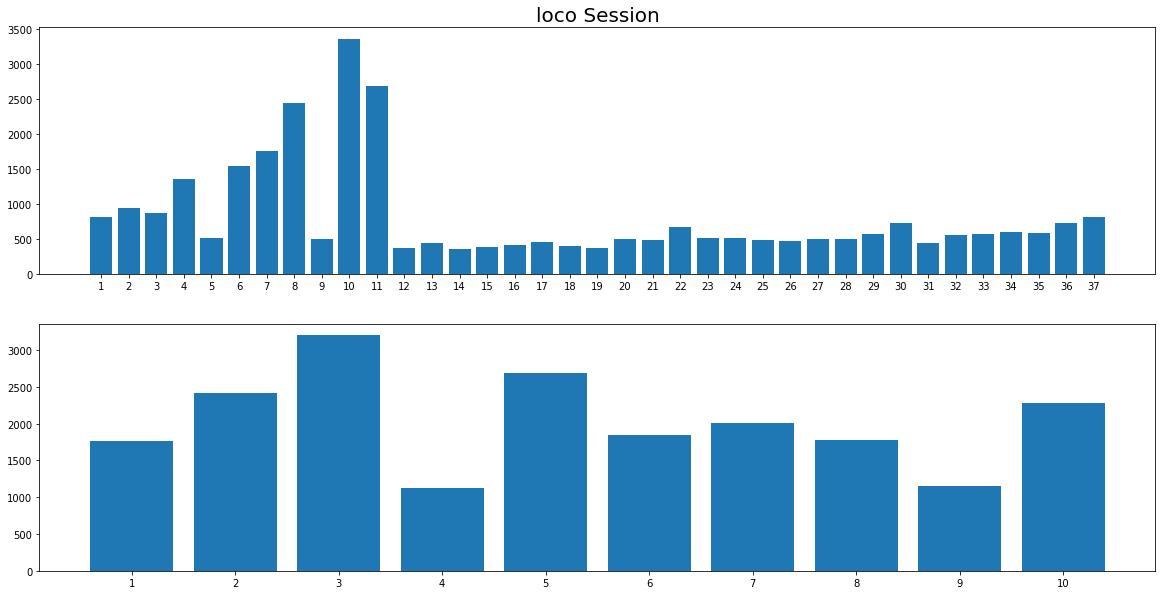

In [55]:
'''
plot session total time
'''
print(len(SESSION_TRIAL_TIME_indy))
print(len(SESSION_TRIAL_TIME_loco))
xtick_label_indy = []
xtick_label_loco = []
for n in range(len(SESSION_TRIAL_TIME_indy)):
    xtick_label_indy.append(n+1)
xtick_label_indy = np.array(xtick_label_indy)
for n in range(len(SESSION_TRIAL_TIME_loco)):
    xtick_label_loco.append(n+1)
xtick_label_loco = np.array(xtick_label_loco)
fig, ax = plt.subplots(2,1,figsize=(20,10))
ax[0].bar(xtick_label_indy, np.array(SESSION_TRIAL_TIME_indy))
ax[0].set_xticks(xtick_label_indy)
ax[0].set_title('indy Session', size=20)

ax[1].bar(xtick_label_loco, np.array(SESSION_TRIAL_TIME_loco))
ax[1].set_xticks(xtick_label_loco)
ax[0].set_title('loco Session', size=20)
print()

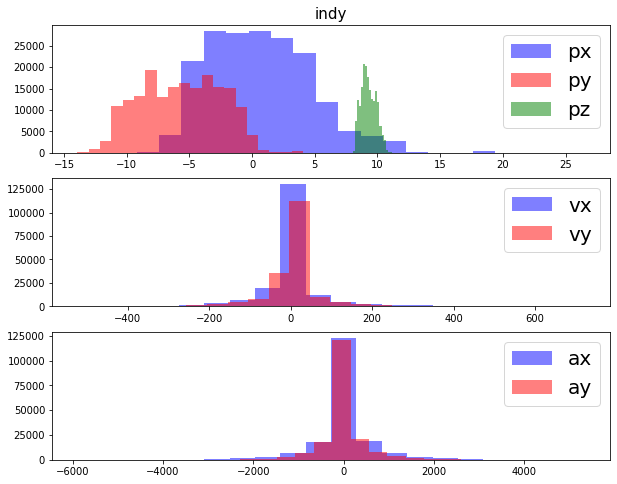

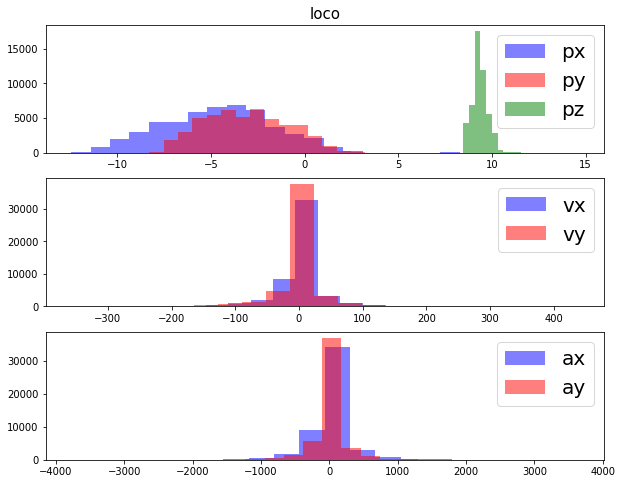

In [171]:
'''
plot distribution for pos / vel / Acc
for paper using , so only get training amount(5000)
主要用來觀察 normalize 前的 training data 分佈
'''
Px_indy = []
Py_indy = []
Pz_indy = []
Vx_indy = []
Vy_indy = []
Ax_indy = []
Ay_indy = []
for index in range(len(SESSION_POS_X_64_indy)):
    px = np.array(SESSION_POS_X_64_indy[index])[:5000]
    py = np.array(SESSION_POS_Y_64_indy[index])[:5000]
    pz = np.array(SESSION_POS_Z_64_indy[index])[:5000]
    vx = np.array(SESSION_VEL_X_64_indy[index])[:5000]
    vy = np.array(SESSION_VEL_Y_64_indy[index])[:5000]
    ax = np.array(SESSION_ACC_X_64_indy[index])[:5000]
    ay = np.array(SESSION_ACC_Y_64_indy[index])[:5000]
    
    if index == 0:
        Px_indy = px
        Py_indy = py
        Pz_indy = pz
        Vx_indy = vx
        Vy_indy = vy
        Ax_indy = ax
        Ay_indy = ay
    else :
        Px_indy = np.concatenate((Px_indy, px), axis=0)
        Py_indy = np.concatenate((Py_indy, py), axis=0)
        Pz_indy = np.concatenate((Pz_indy, pz), axis=0)
        Vx_indy = np.concatenate((Vx_indy, vx), axis=0)
        Vy_indy = np.concatenate((Vy_indy, vy), axis=0)
        Ax_indy = np.concatenate((Ax_indy, ax), axis=0)
        Ay_indy = np.concatenate((Ay_indy, ay), axis=0)

fig ,ax_indy = plt.subplots(3, 1, figsize=(10, 8))
ax_indy[0].set_title('indy', size=15)
ax_indy[0].hist(Px_indy, bins=20, label='px', alpha = 0.5, color = 'b')
ax_indy[0].hist(Py_indy, bins=20, label='py', alpha = 0.5, color = 'r')
ax_indy[0].hist(Pz_indy, bins=20, label='pz', alpha = 0.5, color = 'g')
ax_indy[0].legend(fontsize=20)
ax_indy[1].hist(Vx_indy, bins=20, label='vx', alpha = 0.5, color = 'b')
ax_indy[1].hist(Vy_indy, bins=20, label='vy', alpha = 0.5, color = 'r')
ax_indy[1].legend(fontsize=20)
ax_indy[2].hist(Ax_indy, bins=20, label='ax', alpha = 0.5, color = 'b')
ax_indy[2].hist(Ay_indy, bins=20, label='ay', alpha = 0.5, color = 'r')
ax_indy[2].legend(fontsize=20)

# ===========================================================
Px_loco = []
Py_loco = []
Pz_loco = []
Vx_loco = []
Vy_loco = []
Ax_loco = []
Ay_loco = []

for index in range(len(SESSION_POS_X_64_loco)):
    px = np.array(SESSION_POS_X_64_loco[index])[:5000]
    py = np.array(SESSION_POS_Y_64_loco[index])[:5000]
    pz = np.array(SESSION_POS_Z_64_loco[index])[:5000]
    vx = np.array(SESSION_VEL_X_64_loco[index])[:5000]
    vy = np.array(SESSION_VEL_Y_64_loco[index])[:5000]
    ax = np.array(SESSION_ACC_X_64_loco[index])[:5000]
    ay = np.array(SESSION_ACC_Y_64_loco[index])[:5000]
    
    if index == 0:
        Px_loco = px
        Py_loco = py
        Pz_loco = pz
        Vx_loco = vx
        Vy_loco = vy
        Ax_loco = ax
        Ay_loco = ay
    else :
        Px_loco = np.concatenate((Px_loco, px), axis=0)
        Py_loco = np.concatenate((Py_loco, py), axis=0)
        Pz_loco = np.concatenate((Pz_loco, pz), axis=0)
        Vx_loco = np.concatenate((Vx_loco, vx), axis=0)
        Vy_loco = np.concatenate((Vy_loco, vy), axis=0)
        Ax_loco = np.concatenate((Ax_loco, ax), axis=0)
        Ay_loco = np.concatenate((Ay_loco, ay), axis=0)


fig ,ax_loco = plt.subplots(3, 1, figsize=(10, 8))
ax_loco[0].set_title('loco', size=15)
ax_loco[0].hist(Px_loco, bins=20, label='px', alpha = 0.5, color = 'b')
ax_loco[0].hist(Py_loco, bins=20, label='py', alpha = 0.5, color = 'r')
ax_loco[0].hist(Pz_loco, bins=20, label='pz', alpha = 0.5, color = 'g')

ax_loco[0].legend(fontsize=20)
ax_loco[1].hist(Vx_loco, bins=20, label='vx', alpha = 0.5, color = 'b')
ax_loco[1].hist(Vy_loco, bins=20, label='vy', alpha = 0.5, color = 'r')
ax_loco[1].legend(fontsize=20)
ax_loco[2].hist(Ax_loco, bins=20, label='ax', alpha = 0.5, color = 'b')
ax_loco[2].hist(Ay_loco, bins=20, label='ay', alpha = 0.5, color = 'r')
ax_loco[2].legend(fontsize=20)

print()

In [234]:
'''
model
'''
class model_1(nn.Module):
    def __init__(self, Order_Count, Hidden_layer_num):
        super(model_1, self).__init__()
        
        self.order = Order_Count+1
        self.hidden_layer_num = Hidden_layer_num
        self.GRU_layer = nn.GRU(100, 100, Hidden_layer_num, batch_first = True) # input_dimension, output_dimension, hidden_layer
        
        # spactial
        self.conv_spac_1 = nn.Conv3d(1, 128, kernel_size=(6, 3, 3), stride = 1, padding=(0,1,1) )
        self.conv_spac_1_bn = nn.BatchNorm3d(128)
        self.conv_spac_1_Prelu = nn.PReLU()
        self.conv_spac_2 = nn.Conv3d(128, 256, kernel_size = (1, 3, 3), stride = 1, dilation = (1, 3, 3))
        self.conv_spac_2_bn = nn.BatchNorm3d(256)
        self.conv_spac_2_Prelu = nn.PReLU()
        self.conv_spac_3 = nn.Conv3d(256, 128, kernel_size = (1, 1, 1) , stride = 1) #out size [128, 4, 4]
        self.conv_spac_3_bn = nn.BatchNorm3d(128)
        self.conv_spac_3_Prelu = nn.PReLU()
        # temporal
        self.conv_temp_vel_1 = nn.Conv3d(1, 128, kernel_size = (6, 3, 3), stride = 1, padding = (0, 1, 1))
        self.conv_temp_vel_1_bn = nn.BatchNorm3d(128)
        self.conv_temp_vel_1_Prelu = nn.PReLU()
        self.conv_temp_vel_2 = nn.Conv3d(128, 512, kernel_size = (1, 3, 3), stride = 1, dilation = (1, 3, 3))
        self.conv_temp_vel_2_bn = nn.BatchNorm3d(512)
        self.conv_temp_vel_2_Prelu = nn.PReLU()
        self.conv_temp_vel_3 = nn.Conv3d(512, 128, kernel_size = (1, 1, 1), stride = 1) #out size [256, 4, 4]
        self.conv_temp_vel_3_bn = nn.BatchNorm3d(128)
        self.conv_temp_vel_3_Prelu = nn.PReLU()
        
        self.conv_temp_acc_1 = nn.Conv3d(1, 128, kernel_size = (6, 3, 3), stride = 1, padding = (0, 1, 1))
        self.conv_temp_acc_1_bn = nn.BatchNorm3d(128)
        self.conv_temp_acc_1_Prelu = nn.PReLU()
        self.conv_temp_acc_2 = nn.Conv3d(128, 512, kernel_size = (1, 3, 3), stride = 1, dilation = (1, 3, 3))
        self.conv_temp_acc_2_bn = nn.BatchNorm3d(512)
        self.conv_temp_acc_2_Prelu = nn.PReLU()
        self.conv_temp_acc_3 = nn.Conv3d(512, 128, kernel_size = (1, 1, 1), stride = 1) #out size [256, 4, 4]
        self.conv_temp_acc_3_bn = nn.BatchNorm3d(128)
        self.conv_temp_acc_3_Prelu = nn.PReLU()
        
        self.conv_temp_pos_1 = nn.Conv3d(1, 128, kernel_size = (6, 3, 3), stride = 1, padding = (0, 1, 1))
        self.conv_temp_pos_1_bn = nn.BatchNorm3d(128)
        self.conv_temp_pos_1_Prelu = nn.PReLU()
        self.conv_temp_pos_2 = nn.Conv3d(128, 512, kernel_size = (1, 3, 3), stride = 1, dilation = (1, 3, 3))
        self.conv_temp_pos_2_bn = nn.BatchNorm3d(512)
        self.conv_temp_pos_2_Prelu = nn.PReLU()
        self.conv_temp_pos_3 = nn.Conv3d(512, 128, kernel_size = (1, 1, 1), stride = 1) #out size [256, 4, 4]
        self.conv_temp_pos_3_bn = nn.BatchNorm3d(128)
        self.conv_temp_pos_3_Prelu = nn.PReLU()
        
        # spac + temp
        self.fc1_vel = nn.Linear((128+128)*4*4, 256)
        self.fc2_vel = nn.Linear(256, 64)
        self.fc3_vel = nn.Linear(64, 2)
        
        self.fc1_acc = nn.Linear((128+128)*4*4, 256)
        self.fc2_acc = nn.Linear(256, 64)
        self.fc3_acc = nn.Linear(64, 2)
        
        self.fc1_pos = nn.Linear((128+128)*4*4, 256)
        self.fc2_pos = nn.Linear(256, 64)
        self.fc3_pos = nn.Linear(64, 2)
        
    def forward(self, data):
        
        spacial_data = data[:, -6:, :].view(data.size(0), 1, 6, 10, 10) #
        # spacial feature
        spac_f = self.conv_spac_1_Prelu(self.conv_spac_1_bn(self.conv_spac_1(spacial_data)))
        spac_f = self.conv_spac_2_Prelu(self.conv_spac_2_bn(self.conv_spac_2(spac_f)))
        spac_f = self.conv_spac_3_Prelu(self.conv_spac_3_bn(self.conv_spac_3(spac_f)))
        
        temporal_data = data
        seq_out, (h_s) = self.GRU_layer(temporal_data)
        # temporal feature
        seq_f = seq_out[:, -6:, :].contiguous().view(-1, 1, 6, 10, 10)
        
        vel_f = self.conv_temp_vel_1_Prelu(self.conv_temp_vel_1_bn(self.conv_temp_vel_1(seq_f)))
        vel_f = self.conv_temp_vel_2_Prelu(self.conv_temp_vel_2_bn(self.conv_temp_vel_2(vel_f)))
        vel_f = self.conv_temp_vel_3_Prelu(self.conv_temp_vel_3_bn(self.conv_temp_vel_3(vel_f)))
        
        acc_f = self.conv_temp_acc_1_Prelu(self.conv_temp_acc_1_bn(self.conv_temp_acc_1(seq_f)))
        acc_f = self.conv_temp_acc_2_Prelu(self.conv_temp_acc_2_bn(self.conv_temp_acc_2(acc_f)))
        acc_f = self.conv_temp_acc_3_Prelu(self.conv_temp_acc_3_bn(self.conv_temp_acc_3(acc_f)))
        
        pos_f = self.conv_temp_pos_1_Prelu(self.conv_temp_pos_1_bn(self.conv_temp_pos_1(seq_f)))
        pos_f = self.conv_temp_pos_2_Prelu(self.conv_temp_pos_2_bn(self.conv_temp_pos_2(pos_f)))
        pos_f = self.conv_temp_pos_3_Prelu(self.conv_temp_pos_3_bn(self.conv_temp_pos_3(pos_f)))
        
        #concatenate var.(vel / acc) spac + temp
        spac_f = spac_f.view(-1, 128*4*4)
        vel_f = vel_f.view(-1, 128*4*4)
        acc_f = acc_f.view(-1, 128*4*4)
        pos_f = pos_f.view(-1, 128*4*4)
        
        cat_vel = torch.cat([spac_f, vel_f], dim=1)
        cat_acc = torch.cat([spac_f, acc_f], dim=1)
        cat_pos = torch.cat([spac_f, pos_f], dim=1)
        
        pred_vel = torch.tanh(self.fc1_vel(cat_vel))
        pred_vel = torch.tanh(self.fc2_vel(pred_vel))
        pred_vel = self.fc3_vel(pred_vel)
        
        pred_acc = torch.tanh(self.fc1_acc(cat_acc))
        pred_acc = torch.tanh(self.fc2_acc(pred_acc))
        pred_acc = self.fc3_acc(pred_acc)
        
        pred_pos = torch.tanh(self.fc1_pos(cat_pos))
        pred_pos = torch.tanh(self.fc2_pos(pred_pos))
        pred_pos = self.fc3_pos(pred_pos)
        
        return pred_vel, pred_acc, pred_pos
#----------
# model 是原本使用的方式 ,由文獻可知 在conv 的特徵擷取上 是優於gru 故 model1 跟model2的差異 
# ---------------------------------------------  
# class model_2_1(nn.Module):
#     def __init__(self, Order_Count, Hidden_layer_num):
#         super(model_1, self).__init__()
        
#         self.order = Order_Count+1
#         self.hidden_layer_num = Hidden_layer_num
#         self.GRU_layer = nn.GRU(100, 100, Hidden_layer_num, batch_first = True) # input_dimension, output_dimension, hidden_layer
        
#         # spactial
#         self.conv_spac_1 = nn.Conv3d(1, 128, kernel_size=(6, 3, 3), stride = 1, padding=(0,1,1) )
#         self.conv_spac_1_bn = nn.BatchNorm3d(128)
#         self.conv_spac_1_Prelu = nn.PReLU()
#         self.conv_spac_2 = nn.Conv3d(128, 256, kernel_size = (1, 3, 3), stride = 1, dilation = (1, 3, 3))
#         self.conv_spac_2_bn = nn.BatchNorm3d(256)
#         self.conv_spac_2_Prelu = nn.PReLU()
#         self.conv_spac_3 = nn.Conv3d(256, 128, kernel_size = (1, 1, 1) , stride = 1) #out size [128, 4, 4]
#         self.conv_spac_3_bn = nn.BatchNorm3d(128)
#         self.conv_spac_3_Prelu = nn.PReLU()
#         # temporal
#         self.conv_temp_vel_1 = nn.Conv3d(1, 128, kernel_size = (6, 3, 3), stride = 1, padding = (0, 1, 1))
#         self.conv_temp_vel_1_bn = nn.BatchNorm3d(128)
#         self.conv_temp_vel_1_Prelu = nn.PReLU()
#         self.conv_temp_vel_2 = nn.Conv3d(128, 512, kernel_size = (1, 3, 3), stride = 1, dilation = (1, 3, 3))
#         self.conv_temp_vel_2_bn = nn.BatchNorm3d(512)
#         self.conv_temp_vel_2_Prelu = nn.PReLU()
#         self.conv_temp_vel_3 = nn.Conv3d(512, 128, kernel_size = (1, 1, 1), stride = 1) #out size [256, 4, 4]
#         self.conv_temp_vel_3_bn = nn.BatchNorm3d(128)
#         self.conv_temp_vel_3_Prelu = nn.PReLU()
        
#         self.conv_temp_acc_1 = nn.Conv3d(1, 128, kernel_size = (6, 3, 3), stride = 1, padding = (0, 1, 1))
#         self.conv_temp_acc_1_bn = nn.BatchNorm3d(128)
#         self.conv_temp_acc_1_Prelu = nn.PReLU()
#         self.conv_temp_acc_2 = nn.Conv3d(128, 512, kernel_size = (1, 3, 3), stride = 1, dilation = (1, 3, 3))
#         self.conv_temp_acc_2_bn = nn.BatchNorm3d(512)
#         self.conv_temp_acc_2_Prelu = nn.PReLU()
#         self.conv_temp_acc_3 = nn.Conv3d(512, 128, kernel_size = (1, 1, 1), stride = 1) #out size [256, 4, 4]
#         self.conv_temp_acc_3_bn = nn.BatchNorm3d(128)
#         self.conv_temp_acc_3_Prelu = nn.PReLU()
        
#         # spac + temp
#         self.fc1_vel = nn.Linear((128+128)*4*4, 256)
#         self.fc2_vel = nn.Linear(256, 64)
#         self.fc3_vel = nn.Linear(64, 2)
        
#         self.fc1_acc = nn.Linear((128+128)*4*4, 256)
#         self.fc2_acc = nn.Linear(256, 64)
#         self.fc3_acc = nn.Linear(64, 2)
        
#     def forward(self, data):
        
#         spacial_data = data[:, -6:, :].view(data.size(0), 1, 6, 10, 10) #
#         # spacial feature
#         spac_f = self.conv_spac_1_Prelu(self.conv_spac_1_bn(self.conv_spac_1(spacial_data)))
#         spac_f = self.conv_spac_2_Prelu(self.conv_spac_2_bn(self.conv_spac_2(spac_f)))
#         spac_f = self.conv_spac_3_Prelu(self.conv_spac_3_bn(self.conv_spac_3(spac_f)))
        
#         temporal_data = data
#         seq_out, (h_s) = self.GRU_layer(temporal_data)
#         # temporal feature
#         seq_f = seq_out[:, -6:, :].contiguous().view(-1, 1, 6, 10, 10)
        
#         vel_f = self.conv_temp_vel_1_Prelu(self.conv_temp_vel_1_bn(self.conv_temp_vel_1(seq_f)))
#         vel_f = self.conv_temp_vel_2_Prelu(self.conv_temp_vel_2_bn(self.conv_temp_vel_2(vel_f)))
#         vel_f = self.conv_temp_vel_3_Prelu(self.conv_temp_vel_3_bn(self.conv_temp_vel_3(vel_f)))
        
#         acc_f = self.conv_temp_acc_1_Prelu(self.conv_temp_acc_1_bn(self.conv_temp_acc_1(seq_f)))
#         acc_f = self.conv_temp_acc_2_Prelu(self.conv_temp_acc_2_bn(self.conv_temp_acc_2(acc_f)))
#         acc_f = self.conv_temp_acc_3_Prelu(self.conv_temp_acc_3_bn(self.conv_temp_acc_3(acc_f)))
        
#         #concatenate var.(vel / acc) spac + temp
#         spac_f = spac_f.view(-1, 128*4*4)
#         vel_f = vel_f.view(-1, 128*4*4)
#         acc_f = acc_f.view(-1, 128*4*4)
        
#         cat_vel = torch.cat([spac_f, vel_f], dim=1)
#         cat_acc = torch.cat([spac_f, acc_f], dim=1)
        
#         pred_vel = torch.tanh(self.fc1_vel(cat_vel))
#         pred_vel = torch.tanh(self.fc2_vel(pred_vel))
#         pred_vel = self.fc3_vel(pred_vel)
        
#         pred_acc = torch.tanh(self.fc1_acc(cat_acc))
#         pred_acc = torch.tanh(self.fc2_acc(pred_acc))
#         pred_acc = self.fc3_acc(pred_acc)
        
#         return pred_vel, pred_acc
# class model_2_2(nn.Module):
#     def __init__(self, Order_Count, Hidden_layer_num):
#         super(model_1, self).__init__()
        
#         self.order = Order_Count+1
#         self.hidden_layer_num = Hidden_layer_num
        
#         self.gru_layer1 = nn.GRU(100, 100, self.hidden_layer_num, batch_first = True)
        
#         self.temp_conv_1 = nn.Conv3d(1, 128, kernel_size = (1, 3, 3), stride =1, dilation =(1, 3, 3))
#         self.temp_conv_1_bn = nn.BatchNorm3d(128)
#         self.temp_conv_1_prelu = nn.PReLU()
        
#         self.temp_conv_2 = nn.Conv3d(128, 256, kernel_size = (1, 4, 4), stride =1)
#         self.temp_conv_2_bn = nn.BatchNorm3d(256)
#         self.temp_conv_2_prelu = nn.PReLU()
        
#         self.gru_layer2 = nn.GRU(256, 32, 2, batch_first = True)
        
#         self.fc_t0 = nn.Linear(32, 2)
#         self.fc_t1 = nn.Linear(32, 2)
#     def forward(self, data):
#         seq_data_1, (h_s_1) = self.gru_layer1(data)
        
#         select_layer_num = 20
#         temp_data = seq_data_1[:,-select_layer_num:, :]
#         temp_data = temp_data.view(data.size(0), 1, select_layer_num, 10, 10)
        
#         #[1, select_layer_num, 10, 10] >> [128, select_layer_num, 4, 4]
#         feature = self.temp_conv_1_prelu(self.temp_conv_1_bn(self.temp_conv_1(temp_data))) 
#         # [128, select_layer_num, 4, 4] >> [256, select_layer_num,1, 1] >> [256, select_layer_num]
#         feature = self.temp_conv_2_prelu(self.temp_conv_2_bn(self.temp_conv_2(feature))).squeeze() 
#         feature = feature.transpose(1, 2) # [bs, 256, select_layer_num] >> [bs,select_layer_num, 256] 
        
#         seq_data_2, (h_s_2) = self.gru_layer2(data)
        
#         pred_tp1 = torch.tanh(self.fc_t1(seq_data_2[:, -2, :]))
#         pred_t = torch.tanh(self.fc_t0(seq_data_2[:, -2, :]))
#         return pred_tp1, pred_t
        
print('')

In [314]:
'''
indy
training cross data prepare
&& 
single model

model_1 基於預測的動作變量 配合 normalize 才能同時預測三個變量
資料預準備()
假如是single model
看是否使用 normalize ,否的話 模型最後幾層需要調整 需要用到ffn 不然 數值差異太大 ,很難同時預測3個變量,針對model_1 需要使用
前上述,如果是cross data的預準備
IsNormal = False
IsNormal_Cross_Data = True
IsRecord_R2 = False <--- 由於還未訓練,所以此項無法預測r2
IsRecord_Pred = False <--- 由於還未訓練,所以此項無法將預測的數據做保存
----------------------------------------------------------------
如下所示 在預測r2時 假如訓練single_model 則下面的 cross_model 需要隱藏掉(#)
out_vel, out_acc , out_pos = single_model(fr_data) 
out_vel, out_acc , out_pos = cross_model(fr_data)

'''

ORDER = 19 # ex: 為5時,表示使用了過去5個時刻+上現在時刻
Hidden_Num = 5 #搭配 order 數量變化 5/1 ,9/2, 14/5, 19/10or20 , 這邊調整只適用於model2_2 針對位置模型調整 , model_1不要超過5

TRAIN_DATA_COUNT = 5000 #
UseSortData = False

# 使用 single session 個別 normal 或者 cross session的normal
# [1] IsNormal = True && IsNormal_Cross_Data = False 
# [2] IsNormal = False && IsNormal_Cross_Data = True 
# [3] IsNormal = False && IsNormal_Cross_Data = False
IsNormal = False
IsNormal_Cross_Data = True
IsSingle = False # Single model train or not train 是否訓練丹session 
IsRecord_R2 = True # calculate R2 // 是否計算R2
IsRecord_Pred = True # 是否紀錄 實際值與預測值
IsRecord_train_Pred = True # 是否紀錄 training data的預測值, 主要用來檢查model 訓練時是否有學到


CROSS_DATA_UNSORT_indy = []
CROSS_LABEL_indy = []
CROSS_DATA_SORT_indy = []

R2_POS_X_indy = []
R2_POS_Y_indy = []
R2_VEL_X_indy = []
R2_VEL_Y_indy = []
R2_ACC_X_indy = []
R2_ACC_Y_indy = []

# for test data 
Pred_POS_X_indy = []
Pred_POS_Y_indy = []
Pred_VEL_X_indy = []
Pred_VEL_Y_indy = []
Pred_ACC_X_indy = []
Pred_ACC_Y_indy = []

Real_POS_X_indy = []
Real_POS_Y_indy = []
Real_VEL_X_indy = []
Real_VEL_Y_indy = []
Real_ACC_X_indy = []
Real_ACC_Y_indy = []
# for train data
Pred_Train_PX_indy = []
Pred_Train_PY_indy = []
Pred_Train_VX_indy = []
Pred_Train_VY_indy = []
Pred_Train_AX_indy = []
Pred_Train_AY_indy = []
print('\n---------------------Prepare Cross Data Normalize value----------------------------------------\n')
train_cross_data_pos = []
train_cross_data_vel = []
train_cross_data_acc = []
if IsNormal_Cross_Data == True:
    for index in range(len(SESSION_UNSORTING_FR_64_indy)):
        pos_x, pos_y, pos_z= [] ,[], []
        vel_x, vel_y, vel_z= [] ,[], []
        acc_x, acc_y, acc_z= [] ,[], []
        pos_x = SESSION_POS_X_64_indy[index].reshape(len(SESSION_POS_X_64_indy[index]),1) #
        pos_y = SESSION_POS_Y_64_indy[index].reshape(len(SESSION_POS_Y_64_indy[index]),1)
        pos_z = SESSION_POS_Z_64_indy[index].reshape(len(SESSION_POS_Z_64_indy[index]),1)
    
        vel_x = SESSION_VEL_X_64_indy[index].reshape(len(SESSION_VEL_X_64_indy[index]), 1)
        vel_y = SESSION_VEL_Y_64_indy[index].reshape(len(SESSION_VEL_Y_64_indy[index]), 1)
        vel_z = SESSION_VEL_Z_64_indy[index].reshape(len(SESSION_VEL_Z_64_indy[index]), 1)
    
        acc_x = SESSION_ACC_X_64_indy[index].reshape(len(SESSION_ACC_X_64_indy[index]), 1)
        acc_y = SESSION_ACC_Y_64_indy[index].reshape(len(SESSION_ACC_Y_64_indy[index]), 1)
        acc_z = SESSION_ACC_Z_64_indy[index].reshape(len(SESSION_ACC_Z_64_indy[index]), 1)
    
        train_pos_x , train_pos_y, train_pos_z = pos_x[:TRAIN_DATA_COUNT] , pos_y[:TRAIN_DATA_COUNT], pos_z[:TRAIN_DATA_COUNT] 
        train_vel_x , train_vel_y, train_vel_z = vel_x[:TRAIN_DATA_COUNT] , vel_y[:TRAIN_DATA_COUNT], vel_z[:TRAIN_DATA_COUNT]
        train_acc_x , train_acc_y, train_acc_z = acc_x[:TRAIN_DATA_COUNT] , acc_y[:TRAIN_DATA_COUNT], acc_z[:TRAIN_DATA_COUNT]
        
        cat_pos = np.concatenate((train_pos_x, train_pos_y, train_pos_z), axis = 1)
        cat_vel = np.concatenate((train_vel_x, train_vel_y, train_vel_z), axis = 1)
        cat_acc = np.concatenate((train_acc_x, train_acc_y, train_acc_z), axis = 1)
    
        if index == 0:
            train_cross_data_pos = cat_pos
            train_cross_data_vel = cat_vel
            train_cross_data_acc = cat_acc
        else:
            train_cross_data_pos = np.concatenate((train_cross_data_pos, cat_pos) ,axis = 0)
            train_cross_data_vel = np.concatenate((train_cross_data_vel, cat_vel) ,axis = 0)
            train_cross_data_acc = np.concatenate((train_cross_data_acc, cat_acc) ,axis = 0)
#-------------------------------------------------------------------
    
for index in range(len(SESSION_UNSORTING_FR_64_indy)):
    print('\n------------ Session '+str(index+1)+'-----------')
    print('total session data :', np.transpose(SESSION_UNSORTING_FR_64_indy[index]).shape[0])
    testing_data_count = Paper_Test_Count_Indy[index]
    print('training data count : 5000 ; Testing data count(same wiht Markin paper) :', testing_data_count)
    
    fr_unsort , fr_sort= [], []
    pos_x, pos_y, pos_z= [] ,[], []
    vel_x, vel_y, vel_z= [] ,[], []
    acc_x, acc_y, acc_z= [] ,[], []

    fr_unsort = np.transpose(SESSION_UNSORTING_FR_64_indy[index])
    if UseSortData == True:
        fr_sort = (SESSION_SORTING_FR_64_indy[index]).transpose(2, 0, 1) 
    
    pos_x = SESSION_POS_X_64_indy[index].reshape(len(SESSION_POS_X_64_indy[index]),1) #
    pos_y = SESSION_POS_Y_64_indy[index].reshape(len(SESSION_POS_Y_64_indy[index]),1)
    pos_z = SESSION_POS_Z_64_indy[index].reshape(len(SESSION_POS_Z_64_indy[index]),1)
    
    vel_x = SESSION_VEL_X_64_indy[index].reshape(len(SESSION_VEL_X_64_indy[index]), 1)
    vel_y = SESSION_VEL_Y_64_indy[index].reshape(len(SESSION_VEL_Y_64_indy[index]), 1)
    vel_z = SESSION_VEL_Z_64_indy[index].reshape(len(SESSION_VEL_Z_64_indy[index]), 1)
    
    acc_x = SESSION_ACC_X_64_indy[index].reshape(len(SESSION_ACC_X_64_indy[index]), 1)
    acc_y = SESSION_ACC_Y_64_indy[index].reshape(len(SESSION_ACC_Y_64_indy[index]), 1)
    acc_z = SESSION_ACC_Z_64_indy[index].reshape(len(SESSION_ACC_Z_64_indy[index]), 1)
    # ------------------------Normalize Data-----------------------------------------
    # 只能使用前5000筆 training data 取均值或標準差, 做 normalize ,針對 運動變數
    pos_x_mean, pos_x_max , pos_x_min = [], [], []
    pos_y_mean, pos_y_max , pos_y_min = [], [], []
    pos_z_mean, pos_z_max , pos_z_min = [], [], []
    vel_x_mean, vel_x_max , vel_x_min = [], [], []
    vel_y_mean, vel_y_max , vel_y_min = [], [], []
    vel_z_mean, vel_z_max , vel_z_min = [], [], []
    acc_x_mean, acc_x_max , acc_x_min = [], [], []
    acc_y_mean, acc_y_max , acc_y_min = [], [], []
    acc_z_mean, acc_z_max , acc_z_min = [], [], []
    if IsNormal == True:
        pos_x_mean, pos_x_max , pos_x_min = np.mean(pos_x[:5000, 0]), np.max(pos_x[:5000, 0]), np.min(pos_x[:5000, 0])
        pos_y_mean, pos_y_max , pos_y_min = np.mean(pos_y[:5000, 0]), np.max(pos_y[:5000, 0]), np.min(pos_y[:5000, 0])
        pos_z_mean, pos_z_max , pos_z_min = np.mean(pos_z[:5000, 0]), np.max(pos_z[:5000, 0]), np.min(pos_z[:5000, 0])
    
        vel_x_mean, vel_x_max , vel_x_min = np.mean(vel_x[:5000, 0]), np.max(vel_x[:5000, 0]), np.min(vel_x[:5000, 0])
        vel_y_mean, vel_y_max , vel_y_min = np.mean(vel_y[:5000, 0]), np.max(vel_y[:5000, 0]), np.min(vel_y[:5000, 0])
        vel_z_mean, vel_z_max , vel_z_min = np.mean(vel_z[:5000, 0]), np.max(vel_z[:5000, 0]), np.min(vel_z[:5000, 0])
    
        acc_x_mean, acc_x_max , acc_x_min = np.mean(acc_x[:5000, 0]), np.max(acc_x[:5000, 0]), np.min(acc_x[:5000, 0])
        acc_y_mean, acc_y_max , acc_y_min = np.mean(acc_y[:5000, 0]), np.max(acc_y[:5000, 0]), np.min(acc_y[:5000, 0])
        acc_z_mean, acc_z_max , acc_z_min = np.mean(acc_z[:5000, 0]), np.max(acc_z[:5000, 0]), np.min(acc_z[:5000, 0])
        
    elif IsNormal_Cross_Data == True:

        pos_x_mean, pos_x_max , pos_x_min = np.mean(train_cross_data_pos[:, 0]), np.max(train_cross_data_pos[:, 0]), np.min(train_cross_data_pos[:, 0])
        pos_y_mean, pos_y_max , pos_y_min = np.mean(train_cross_data_pos[:, 1]), np.max(train_cross_data_pos[:, 1]), np.min(train_cross_data_pos[:, 1])
        pos_z_mean, pos_z_max , pos_z_min = np.mean(train_cross_data_pos[:, 2]), np.max(train_cross_data_pos[:, 2]), np.min(train_cross_data_pos[:, 2])
    
        vel_x_mean, vel_x_max , vel_x_min = np.mean(train_cross_data_vel[:, 0]), np.max(train_cross_data_vel[:, 0]), np.min(train_cross_data_vel[:, 0])
        vel_y_mean, vel_y_max , vel_y_min = np.mean(train_cross_data_vel[:, 1]), np.max(train_cross_data_vel[:, 1]), np.min(train_cross_data_vel[:, 1])
        vel_z_mean, vel_z_max , vel_z_min = np.mean(train_cross_data_vel[:, 2]), np.max(train_cross_data_vel[:, 2]), np.min(train_cross_data_vel[:, 2])
    
        acc_x_mean, acc_x_max , acc_x_min = np.mean(train_cross_data_acc[:, 0]), np.max(train_cross_data_acc[:, 0]), np.min(train_cross_data_acc[:, 0])
        acc_y_mean, acc_y_max , acc_y_min = np.mean(train_cross_data_acc[:, 1]), np.max(train_cross_data_acc[:, 1]), np.min(train_cross_data_acc[:, 1])
        acc_z_mean, acc_z_max , acc_z_min = np.mean(train_cross_data_acc[:, 2]), np.max(train_cross_data_acc[:, 2]), np.min(train_cross_data_acc[:, 2])


    # -----------------------------------------------------------------
    
    # split train data 
    train_fr_unsort = fr_unsort[:TRAIN_DATA_COUNT]
    if UseSortData == True:
        train_fr_sort = fr_sort[:TRAIN_DATA_COUNT]
    train_pos_x, train_pos_y, train_pos_z= [] ,[] ,[]
    train_vel_x, train_vel_y, train_vel_z= [] ,[] ,[]
    train_acc_x, train_acc_y, train_acc_z= [] ,[] ,[]
    if IsNormal == True or IsNormal_Cross_Data == True:
        train_pos_x = (pos_x[:TRAIN_DATA_COUNT] - pos_x_mean)/(pos_x_max - pos_x_min)
        train_pos_y = (pos_y[:TRAIN_DATA_COUNT] - pos_y_mean)/(pos_y_max - pos_y_min)
        train_pos_z = (pos_z[:TRAIN_DATA_COUNT] - pos_z_mean)/(pos_z_max - pos_z_min)

        train_vel_x = (vel_x[:TRAIN_DATA_COUNT] - vel_x_mean)/(vel_x_max - vel_x_min)
        train_vel_y = (vel_y[:TRAIN_DATA_COUNT] - vel_y_mean)/(vel_y_max - vel_y_min)
        train_vel_z = (vel_z[:TRAIN_DATA_COUNT] - vel_z_mean)/(vel_z_max - vel_z_min)
    
        train_acc_x = (acc_x[:TRAIN_DATA_COUNT] - acc_x_mean)/(acc_x_max - acc_x_min)
        train_acc_y = (acc_y[:TRAIN_DATA_COUNT] - acc_y_mean)/(acc_y_max - acc_y_min)
        train_acc_z = (acc_z[:TRAIN_DATA_COUNT] - acc_z_mean)/(acc_z_max - acc_z_min)
    else:
        train_pos_x = pos_x[:TRAIN_DATA_COUNT] 
        train_pos_y = pos_y[:TRAIN_DATA_COUNT] 
        train_pos_z = pos_z[:TRAIN_DATA_COUNT] 

        train_vel_x = vel_x[:TRAIN_DATA_COUNT] 
        train_vel_y = vel_y[:TRAIN_DATA_COUNT]
        train_vel_z = vel_z[:TRAIN_DATA_COUNT]
    
        train_acc_x = acc_x[:TRAIN_DATA_COUNT]
        train_acc_y = acc_y[:TRAIN_DATA_COUNT] 
        train_acc_z = acc_z[:TRAIN_DATA_COUNT]

    # concatenate var
    session_pos = np.hstack((train_pos_x, train_pos_y ,train_pos_z))
    session_vel = np.hstack((train_vel_x, train_vel_y, train_vel_z)) 
    session_acc = np.hstack((train_acc_x, train_acc_y, train_acc_z))

    # ------------------------ Data add ORDER(training / testing) ------------------------
    print(' === training data (order)=== ')
    # training label
    pos_order = []
    pre_order = []
    pre_data = []
    pre_order = np.zeros([ORDER, session_pos.shape[1]])
    pre_data = np.concatenate((pre_order, session_pos), axis=0)
    for kk in range(ORDER):
        n = pre_data[kk :(kk-ORDER)]
        data = n.reshape(n.shape[0], 1, n.shape[1])
        if kk == 0:
             pos_order = data
        else:
            pos_order = np.concatenate((pos_order, data), axis=1)
    pos_order = np.concatenate((pos_order, session_pos.reshape(session_pos.shape[0], 1,
                                                                    session_pos.shape[1])), axis=1)
    print('Train Position Data(order):', pos_order.shape)
    
    vel_order = []
    pre_order = []
    pre_data = []
    pre_order = np.zeros([ORDER, session_vel.shape[1]])
    pre_data = np.concatenate((pre_order, session_vel), axis=0)
    for kk in range(ORDER):
        n = pre_data[kk :(kk-ORDER)]
        data = n.reshape(n.shape[0], 1, n.shape[1])
        if kk == 0:
            vel_order = data
        else:
                vel_order = np.concatenate((vel_order, data), axis=1)
    vel_order = np.concatenate((vel_order, session_vel.reshape(session_vel.shape[0], 1,
                                                                     session_vel.shape[1])), axis=1)
    print('Train Velocity Data(order):', pos_order.shape)
    
    acc_order = []
    pre_order = []
    pre_data = []
    pre_order = np.zeros([ORDER, session_acc.shape[1]])
    pre_data = np.concatenate((pre_order, session_acc), axis=0)
    for kk in range(ORDER):
        n = pre_data[kk :(kk-ORDER)]
        data = n.reshape(n.shape[0], 1, n.shape[1])
        if kk == 0:
            acc_order = data
        else:
            acc_order = np.concatenate((acc_order, data), axis=1)
    acc_order = np.concatenate((acc_order, session_acc.reshape(session_acc.shape[0], 1,
                                                                     session_acc.shape[1])), axis =1)
    print('Train Accelerate Data(order):', acc_order.shape)
        # training data
    fr_unsort_order = [] # unsort firing rate
    pre_order =[]
    pre_data =[]
    pre_order = np.zeros([ORDER, train_fr_unsort.shape[1]])
    pre_data = np.concatenate((pre_order, train_fr_unsort), axis=0)
    for kk in range(ORDER):
        n = pre_data[kk :(kk-ORDER)]
        data = n.reshape(n.shape[0], 1, n.shape[1])
        if kk == 0:
            fr_unsort_order = data
        else:
            fr_unsort_order = np.concatenate((fr_unsort_order, data), axis=1)
    fr_unsort_order = np.concatenate((fr_unsort_order,  train_fr_unsort.reshape(train_fr_unsort.shape[0], 1,
                                                                      train_fr_unsort.shape[1])), axis=1)
    print('Train Unsort Data(order):', fr_unsort_order.shape)
    
    if UseSortData == True:
        fr_sort_order = [] # sorting firing rate 排列 [tb, unit, order, el_ch]
        pre_order =[]
        pre_data =[]
        pre_order = np.zeros([ORDER, train_fr_sort.shape[1], train_fr_sort.shape[2]])
        pre_data = np.concatenate((pre_order, train_fr_sort), axis=0)
        for kk in range(ORDER):
            n = pre_data[kk :(kk-ORDER)]
            data = n.reshape(n.shape[0], n.shape[1], 1, n.shape[2])
            if kk == 0:
                fr_sort_order = data
            else:
                fr_sort_order = np.concatenate((fr_sort_order, data), axis=2)
        fr_sort_order = np.concatenate((fr_sort_order, 
                                   train_fr_sort.reshape(train_fr_sort.shape[0], 
                                                         train_fr_sort.shape[1], 1,train_fr_sort.shape[2])), axis=2)
        # [time_bin, unit_ch]
        # print(fr_sort[0, 1]) #用以檢查unit order 排列的正確性
        #  print(fr_sort[1, 1])
        #  print(fr_sort_order[1, 1])
        print('Train Sorting Data(order):', fr_sort_order.shape)
    # #------- cross data for cross model -------------------------------
    cross_label = np.concatenate((pos_order, vel_order, acc_order), axis=2)

    if index == 0:
        CROSS_DATA_UNSORT_indy = fr_unsort_order
        CROSS_LABEL_indy = cross_label
        if UseSortData == True:
            CROSS_DATA_SORT_indy = fr_sort_order
    else:
        CROSS_DATA_UNSORT_indy = np.concatenate((CROSS_DATA_UNSORT_indy, fr_unsort_order), axis=0)
        CROSS_LABEL_indy = np.concatenate((CROSS_LABEL_indy, cross_label), axis=0)
        if UseSortData == True:
            CROSS_DATA_SORT_indy = np.concatenate((CROSS_DATA_SORT, fr_sort_order), axis = 0)
    #-------------------------------------------------------------------
    print(' === testing data === ')

    test_fr_unsort = fr_unsort[5000:5000+testing_data_count]
    test_fr_sort = fr_sort[5000:5000+testing_data_count]
    test_pos_x, test_pos_y, test_pos_z = [], [], []
    test_vel_x, test_vel_y, test_vel_z = [], [], []
    test_acc_x, test_acc_y, test_acc_z = [], [], []
    
    if IsNormal == True or IsNormal_Cross_Data == True:
        test_pos_x = (pos_x[5000:5000+testing_data_count] - pos_x_mean)/(pos_x_max - pos_x_min)
        test_pos_y = (pos_y[5000:5000+testing_data_count] - pos_y_mean)/(pos_y_max - pos_y_min)
        test_pos_z = (pos_z[5000:5000+testing_data_count] - pos_z_mean)/(pos_z_max - pos_z_min)

        test_vel_x = (vel_x[5000:5000+testing_data_count] - vel_x_mean)/(vel_x_max - vel_x_min)
        test_vel_y = (vel_y[5000:5000+testing_data_count] - vel_y_mean)/(vel_y_max - vel_y_min)
        test_vel_z = (vel_z[5000:5000+testing_data_count] - vel_z_mean)/(vel_z_max - vel_z_min)
    
        test_acc_x = (acc_x[5000:5000+testing_data_count] - acc_x_mean)/(acc_x_max - acc_x_min)
        test_acc_y = (acc_y[5000:5000+testing_data_count] - acc_y_mean)/(acc_y_max - acc_y_min)
        test_acc_z = (acc_z[5000:5000+testing_data_count] - acc_z_mean)/(acc_z_max - acc_z_min)
    else:
        test_pos_x = pos_x[5000:5000+testing_data_count] 
        test_pos_y = pos_y[5000:5000+testing_data_count] 
        test_pos_z = pos_z[5000:5000+testing_data_count]

        test_vel_x = vel_x[5000:5000+testing_data_count] 
        test_vel_y = vel_y[5000:5000+testing_data_count]
        test_vel_z = vel_z[5000:5000+testing_data_count] 
    
        test_acc_x = acc_x[5000:5000+testing_data_count] 
        test_acc_y = acc_y[5000:5000+testing_data_count] 
        test_acc_z = acc_z[5000:5000+testing_data_count] 
    # test order
    test_fr_unsort_order = []
    pre_order = []
    pre_data = []
    pre_order = np.zeros([ORDER, test_fr_unsort.shape[1]])
    pre_data = np.concatenate((pre_order, test_fr_unsort), axis=0)
    for kk in range(ORDER):
        n = pre_data[kk :(kk-ORDER)]
        data = n.reshape(n.shape[0], 1, n.shape[1])
        if kk == 0:
            test_fr_unsort_order = data
        else:
            test_fr_unsort_order = np.concatenate((test_fr_unsort_order, data), axis=1)
    test_fr_unsort_order = np.concatenate((test_fr_unsort_order, 
                                           test_fr_unsort.reshape(test_fr_unsort.shape[0], 1,
                                                                        test_fr_unsort.shape[1])), axis=1)
    print('Test Unsort Data(order):', test_fr_unsort_order.shape)
    if UseSortData == True:
        test_fr_sort_order = []
        pre_order = []
        pre_data = []
        pre_order = np.zeros([ORDER, test_fr_sort.shape[1], test_fr_sort.shape[2]])
        pre_data = np.concatenate((pre_order, test_fr_sort), axis = 0)
        for kk in range(ORDER):
            n = pre_data[kk :(kk-ORDER)]
            data = n.reshape(n.shape[0], n.shape[1], 1, n.shape[2])
            if kk == 0:
                test_fr_sort_order = data
            else:
                test_fr_sort_order = np.concatenate((test_fr_sort_order, data), axis=2)
        test_fr_sort_order = np.concatenate((test_fr_sort_order, test_fr_sort.reshape(test_fr_sort.shape[0], test_fr_sort.shape[1], 1,
                                                                   test_fr_sort.shape[2])), axis =2)
        print('Test Sorting Data(order):',test_fr_sort_order.shape)
    
    test_data = torch.from_numpy(test_fr_unsort_order).type(torch.FloatTensor)
    test_label = torch.from_numpy(test_vel_x).type(torch.FloatTensor)
    
    test_dataset = torch.utils.data.TensorDataset(test_data, test_label)
    test_DataLorder = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=64, shuffle = False)
    #-------------------------------------------------------------------------------------------------------------
            
    # ================================
    # Single Model 
    # ================================
    if IsSingle == True:
        
        train_unsort_data = torch.from_numpy(fr_unsort_order).type(torch.FloatTensor)
        if UseSortData == True:
            train_sort_data = torch.from_numpy(fr_sort_order).type(torch.FloatTensor)
        train_label = np.concatenate((pos_order, vel_order, acc_order), axis=2)
        train_label = torch.from_numpy(train_label).type(torch.FloatTensor)
    
        single_unsort_dataset = torch.utils.data.TensorDataset(train_unsort_data, train_label)#  
        single_unsort_dataloader = torch.utils.data.DataLoader(dataset = single_unsort_dataset, batch_size=32, shuffle=True)
        Epoch = 30
        single_model = model_1(Order_Count= ORDER, Hidden_layer_num = Hidden_Num) 
        single_optim = torch.optim.Adam(single_model.parameters(), lr=0.0001)
    
        loss_MSE = nn.MSELoss()
        if device:
            single_model.to(device)
            loss_MSE.to(device)
        for epoch in range(Epoch):
            for n, (Data, Label) in enumerate(single_unsort_dataloader):
                single_optim.zero_grad()
            #----------------------------------------------------
                fr_data = Data
                valid_pos = Label[:, -1, :2]
                valid_vel = Label[:, -1, 3:5]
                valid_acc = Label[:, -1, 6:8]

                if torch.cuda.is_available():
                    valid_pos = valid_pos.to(device)
                    valid_vel = valid_vel.to(device)
                    valid_acc = valid_acc.to(device)
                    fr_data = fr_data.cuda()

                pred_vel, pred_acc , pred_pos= single_model(fr_data)
                loss_vel = loss_MSE(pred_vel, valid_vel)
                loss_acc = loss_MSE(pred_acc, valid_acc)
                loss_pos = loss_MSE(pred_pos, valid_pos)
                loss = loss_vel+ loss_acc + loss_pos

                loss.backward()
                single_optim.step()
            with torch.no_grad():
                print('epoch[{}], loss:{:.4f} >> vel loss:{:.4f}, acc loss:{:.4f}, pos loss:{:.4f}'.format(epoch+1, 
                                                    loss.item(), loss_vel.item(), loss_acc.item(), loss_pos.item()))
            
    #---------------------------------------------------------------------------------------------------------------
    if IsRecord_R2 == True:
        
        pred_vel = []
        pred_acc = []
        pred_pos = []
        with torch.no_grad():
            for n, (Data, Label) in enumerate (test_DataLorder):
        
                fr_data = Data
                if device:
                    fr_data = fr_data.to(device)
#                 out_vel, out_acc , out_pos = single_model(fr_data)
                out_vel, out_acc , out_pos = cross_model(fr_data)

                out_vel = out_vel.data.cpu().numpy()
                out_acc = out_acc.data.cpu().numpy()
                out_pos = out_pos.data.cpu().numpy()
                if n == 0:
                    pred_vel = out_vel
                    pred_acc = out_acc
                    pred_pos = out_pos
                else:
                    pred_vel = np.concatenate((pred_vel, out_vel), axis=0)
                    pred_acc = np.concatenate((pred_acc, out_acc), axis=0)
                    pred_pos = np.concatenate((pred_pos, out_pos), axis=0)
        # -----------------------------------------------------------
            pred_px , pred_py = pred_pos[:, 0], pred_pos[:, 1]
            real_px , real_py = test_pos_x[:, 0], test_pos_y[:, 0]
            print('r2_px :', np.round(r2_score(real_px, pred_px),4))
            print('r2_py :', np.round(r2_score(real_py, pred_py),4))
            
            pred_vx , pred_vy = pred_vel[:, 0], pred_vel[:, 1]
            real_vx , real_vy = test_vel_x[:, 0], test_vel_y[:, 0]
            print('r2_vx :', np.round(r2_score(real_vx, pred_vx),4))
            print('r2_vy :', np.round(r2_score(real_vy, pred_vy),4))
        
            pred_ax , pred_ay = pred_acc[:, 0], pred_acc[:, 1]
            real_ax , real_ay = test_acc_x[:, 0], test_acc_y[:, 0]
            print('r2_ax :', np.round(r2_score(real_ax, pred_ax),4))
            print('r2_ay :', np.round(r2_score(real_ay, pred_ay),4))
            
            
            
            if IsRecord_R2 == True:
                R2_POS_X_indy.append(np.round(r2_score(real_px, pred_px),4))
                R2_POS_Y_indy.append(np.round(r2_score(real_py, pred_py),4))
                R2_VEL_X_indy.append(np.round(r2_score(real_vx, pred_vx),4))
                R2_VEL_Y_indy.append(np.round(r2_score(real_vy, pred_vy),4))
                R2_ACC_X_indy.append(np.round(r2_score(real_ax, pred_ax),4))
                R2_ACC_Y_indy.append(np.round(r2_score(real_ay, pred_ay),4))
                
            if IsRecord_Pred == True:
                if IsNormal == True or IsNormal_Cross_Data == True:
                    
                    Pred_POS_X_indy.append(pred_px *(pos_x_max - pos_x_min) + pos_x_mean)
                    Pred_POS_Y_indy.append(pred_py *(pos_y_max - pos_y_min) + pos_y_mean)
                    Pred_VEL_X_indy.append(pred_vx *(vel_x_max - vel_x_min) + vel_x_mean)
                    Pred_VEL_Y_indy.append(pred_vy *(vel_y_max - vel_y_min) + vel_y_mean)
                    Pred_ACC_X_indy.append(pred_ax *(acc_x_max - acc_x_min) + acc_x_mean)
                    Pred_ACC_Y_indy.append(pred_ay *(acc_y_max - acc_y_min) + acc_y_mean)
                else:
                    Pred_POS_X_indy.append(pred_px)
                    Pred_POS_Y_indy.append(pred_py)
                    Pred_VEL_X_indy.append(pred_vx)
                    Pred_VEL_Y_indy.append(pred_vy)
                    Pred_ACC_X_indy.append(pred_ax)
                    Pred_ACC_Y_indy.append(pred_ay)

                Real_POS_X_indy.append(pos_x[5000:5000+testing_data_count] )
                Real_POS_Y_indy.append(pos_y[5000:5000+testing_data_count] )
                Real_VEL_X_indy.append(vel_x[5000:5000+testing_data_count] )
                Real_VEL_Y_indy.append(vel_y[5000:5000+testing_data_count] )
                Real_ACC_X_indy.append(acc_x[5000:5000+testing_data_count] )
                Real_ACC_Y_indy.append(acc_y[5000:5000+testing_data_count] )
    if IsRecord_train_Pred == True:
        pred_train_vel = []
        pred_train_acc = []
        pred_train_pos = []
        vaild_train_data = torch.from_numpy(fr_unsort_order).type(torch.FloatTensor)
        if UseSortData == True:
            vaild_train_sort_data = torch.from_numpy(fr_sort_order).type(torch.FloatTensor)
        vaild_train_label = np.concatenate((pos_order, vel_order, acc_order), axis=2)
        vaild_train_label = torch.from_numpy(vaild_train_label).type(torch.FloatTensor)
    
        vaild_dataset = torch.utils.data.TensorDataset(vaild_train_data, vaild_train_label)#  
        vaild_dataloader = torch.utils.data.DataLoader(dataset = vaild_dataset, batch_size=64, shuffle=False)
        with torch.no_grad():
            for n, (Data, Label) in enumerate (vaild_dataloader):
                fr_data = Data
                if device:
                    fr_data = fr_data.to(device)
#                 out_vel, out_acc , out_pos = single_model(fr_data)
                out_vel, out_acc , out_pos = cross_model(fr_data)

                out_vel = out_vel.data.cpu().numpy()
                out_acc = out_acc.data.cpu().numpy()
                out_pos = out_pos.data.cpu().numpy()
                if n == 0:
                    pred_train_vel = out_vel
                    pred_train_acc = out_acc
                    pred_train_pos = out_pos
                else:
                    pred_train_vel = np.concatenate((pred_train_vel, out_vel), axis=0)
                    pred_train_acc = np.concatenate((pred_train_acc, out_acc), axis=0)
                    pred_train_pos = np.concatenate((pred_train_pos, out_pos), axis=0)
            
            if IsNormal == True or IsNormal_Cross_Data == True:
                Pred_Train_PX_indy.append(pred_train_pos[:, 0] *(pos_x_max - pos_x_min) + pos_x_mean)
                Pred_Train_PY_indy.append(pred_train_pos[:, 1] *(pos_y_max - pos_y_min) + pos_y_mean)
                Pred_Train_VX_indy.append(pred_train_vel[:, 0] *(vel_x_max - vel_x_min) + vel_x_mean)
                Pred_Train_VY_indy.append(pred_train_vel[:, 1] *(vel_y_max - vel_y_min) + vel_y_mean)
                Pred_Train_AX_indy.append(pred_train_acc[:, 0] *(acc_x_max - acc_x_min) + acc_x_mean)
                Pred_Train_AY_indy.append(pred_train_acc[:, 1] *(acc_y_max - acc_y_min) + acc_y_mean)
            else:
                Pred_Train_PX_indy.append(pred_train_pos[:, 0] )
                Pred_Train_PY_indy.append(pred_train_pos[:, 1] )
                Pred_Train_VX_indy.append(pred_train_vel[:, 0] )
                Pred_Train_VY_indy.append(pred_train_vel[:, 1] )
                Pred_Train_AX_indy.append(pred_train_acc[:, 0] )
                Pred_Train_AY_indy.append(pred_train_acc[:, 1] )
    #------------------------------------------------------------------
print()
print('CROSS_DATA_UNSORT :', CROSS_DATA_UNSORT_indy.shape)
print('CROSS_LABEL_POS :', CROSS_LABEL_indy.shape) 


---------------------Prepare Cross Data Normalize value----------------------------------------


------------ Session 1-----------
total session data : 12777
training data count : 5000 ; Testing data count(same wiht Markin paper) : 7777
 === training data (order)=== 
Train Position Data(order): (5000, 20, 3)
Train Velocity Data(order): (5000, 20, 3)
Train Accelerate Data(order): (5000, 20, 3)
Train Unsort Data(order): (5000, 20, 100)
 === testing data === 
Test Unsort Data(order): (7777, 20, 100)
r2_px : 0.6132
r2_py : 0.6409
r2_vx : 0.6601
r2_vy : 0.6886
r2_ax : 0.4021
r2_ay : 0.3592

------------ Session 2-----------
total session data : 14894
training data count : 5000 ; Testing data count(same wiht Markin paper) : 9894
 === training data (order)=== 
Train Position Data(order): (5000, 20, 3)
Train Velocity Data(order): (5000, 20, 3)
Train Accelerate Data(order): (5000, 20, 3)
Train Unsort Data(order): (5000, 20, 100)
 === testing data === 
Test Unsort Data(order): (9894, 20, 100)


 === testing data === 
Test Unsort Data(order): (2199, 20, 100)
r2_px : 0.7698
r2_py : 0.8198
r2_vx : 0.8128
r2_vy : 0.8481
r2_ax : 0.6459
r2_ay : 0.6815

------------ Session 18-----------
total session data : 6343
training data count : 5000 ; Testing data count(same wiht Markin paper) : 1343
 === training data (order)=== 
Train Position Data(order): (5000, 20, 3)
Train Velocity Data(order): (5000, 20, 3)
Train Accelerate Data(order): (5000, 20, 3)
Train Unsort Data(order): (5000, 20, 100)
 === testing data === 
Test Unsort Data(order): (1343, 20, 100)
r2_px : 0.8048
r2_py : 0.8441
r2_vx : 0.7814
r2_vy : 0.8493
r2_ax : 0.6136
r2_ay : 0.7289

------------ Session 19-----------
total session data : 5843
training data count : 5000 ; Testing data count(same wiht Markin paper) : 843
 === training data (order)=== 
Train Position Data(order): (5000, 20, 3)
Train Velocity Data(order): (5000, 20, 3)
Train Accelerate Data(order): (5000, 20, 3)
Train Unsort Data(order): (5000, 20, 100)
 === test

 === testing data === 
Test Unsort Data(order): (4527, 20, 100)
r2_px : 0.7639
r2_py : 0.8526
r2_vx : 0.8096
r2_vy : 0.8441
r2_ax : 0.6415
r2_ay : 0.7

------------ Session 35-----------
total session data : 9218
training data count : 5000 ; Testing data count(same wiht Markin paper) : 4218
 === training data (order)=== 
Train Position Data(order): (5000, 20, 3)
Train Velocity Data(order): (5000, 20, 3)
Train Accelerate Data(order): (5000, 20, 3)
Train Unsort Data(order): (5000, 20, 100)
 === testing data === 
Test Unsort Data(order): (4218, 20, 100)
r2_px : 0.6414
r2_py : 0.8077
r2_vx : 0.7772
r2_vy : 0.8234
r2_ax : 0.5915
r2_ay : 0.6259

------------ Session 36-----------
total session data : 11461
training data count : 5000 ; Testing data count(same wiht Markin paper) : 6461
 === training data (order)=== 
Train Position Data(order): (5000, 20, 3)
Train Velocity Data(order): (5000, 20, 3)
Train Accelerate Data(order): (5000, 20, 3)
Train Unsort Data(order): (5000, 20, 100)
 === testi

In [224]:
'''
Order = 5+1, Hidden_Num=1
'''
with torch.no_grad():
    print('---------position-----------------')
    print('R2_POS_X :',R2_POS_X_indy)
    print('R2_POS_X mean :',np.mean(R2_POS_X_indy))
#     print('R2_POS_X SNR :', get_SNR(np.mean(R2_POS_X_indy)))

    print('R2_POS_Y :',R2_POS_Y_indy)
    print('R2_POS_Y mean :',np.mean(R2_POS_Y_indy))
#     print('R2_POS_Y SNR:',get_SNR(np.mean(R2_POS_Y_indy)))
    print('POS avg(X+Y):',  (np.mean(R2_POS_X_indy)+np.mean(R2_POS_Y_indy))/2 )
    
    print('---------velocity-----------------')
    print('R2_VEL_X :',R2_VEL_X_indy)
    print('R2_VEL_X mean :',np.mean(R2_VEL_X_indy))
#     print('R2_VEL_X SNR :', get_SNR(np.mean(R2_VEL_X_indy)))
    
    print('R2_VEL_Y :',R2_VEL_Y_indy)
    print('R2_VEL_Y mean :',np.mean(R2_VEL_Y_indy))
#     print('R2_VEL_Y SNR:',get_SNR(np.mean(R2_VEL_Y_indy)))
#     print('vel avg(X+Y):', get_SNR( (np.mean(R2_VEL_X_indy)+np.mean(R2_VEL_Y_indy))/2   ))
    print('vel avg(X+Y):', (np.mean(R2_VEL_X_indy)+np.mean(R2_VEL_Y_indy))/2)
          
    print('---------accelerate-----------------')
    print('R2_ACC_X :',R2_ACC_X_indy)
    print('R2_ACC_X mean :',np.mean(R2_ACC_X_indy))
#     print('R2_ACC_X SNR :', get_SNR(np.mean(R2_ACC_X_indy)))

    print('R2_ACC_Y :',R2_ACC_Y_indy)
    print('R2_ACC_Y mean :',np.mean(R2_ACC_Y_indy))
#     print('R2_ACC_Y SNR:',get_SNR(np.mean(R2_ACC_Y_indy)))
    print('ACC avg(X+Y):',  (np.mean(R2_ACC_X_indy)+np.mean(R2_ACC_Y_indy))/2 )


---------position-----------------
R2_POS_X : [0.4243, 0.6481, 0.5929, 0.5389, 0.4674, 0.4577, 0.2281, 0.4431, 0.21, 0.4022, -0.1117, 0.561, 0.5578, 0.5913, 0.6159, 0.5675, 0.5511, 0.5624, 0.4161, 0.4589, 0.4934, 0.4847, 0.4431, 0.5724, 0.5744, 0.563, 0.5745, 0.4281, 0.2691, 0.339, 0.5807, 0.5888, 0.4507, 0.5329, 0.4822, 0.4595, 0.4621]
R2_POS_X mean : 0.4724756756756756
R2_POS_Y : [0.4622, 0.6243, 0.5746, 0.6385, 0.4567, 0.5054, 0.4978, 0.3575, 0.5613, 0.5208, 0.1441, 0.612, 0.6992, 0.6439, 0.7866, 0.6144, 0.654, 0.6814, 0.6127, 0.6083, 0.6735, 0.5092, 0.6605, 0.6737, 0.6687, 0.6656, 0.7035, 0.6941, 0.5564, 0.4078, 0.64, 0.7184, 0.5345, 0.7061, 0.6573, 0.512, 0.5023]
R2_POS_Y mean : 0.5875486486486486
POS avg(X+Y): 0.5300121621621621
---------velocity-----------------
R2_VEL_X : [0.6395, 0.6937, 0.6711, 0.6296, 0.6819, 0.7332, 0.6864, 0.6013, 0.5882, 0.5689, 0.2898, 0.6723, 0.7281, 0.6807, 0.7113, 0.7259, 0.6784, 0.6678, 0.6678, 0.6607, 0.699, 0.6942, 0.7158, 0.7047, 0.684, 0.7052, 0.

In [228]:
'''
Order = 19+1 , Hidden_Num =1
'''
with torch.no_grad():
    print('---------position-----------------')
    print('R2_POS_X :',R2_POS_X_indy)
    print('R2_POS_X mean :',np.mean(R2_POS_X_indy))
#     print('R2_POS_X SNR :', get_SNR(np.mean(R2_POS_X_indy)))

    print('R2_POS_Y :',R2_POS_Y_indy)
    print('R2_POS_Y mean :',np.mean(R2_POS_Y_indy))
#     print('R2_POS_Y SNR:',get_SNR(np.mean(R2_POS_Y_indy)))
    print('POS avg(X+Y):',  (np.mean(R2_POS_X_indy)+np.mean(R2_POS_Y_indy))/2 )
    
    print('---------velocity-----------------')
    print('R2_VEL_X :',R2_VEL_X_indy)
    print('R2_VEL_X mean :',np.mean(R2_VEL_X_indy))
#     print('R2_VEL_X SNR :', get_SNR(np.mean(R2_VEL_X_indy)))
    
    print('R2_VEL_Y :',R2_VEL_Y_indy)
    print('R2_VEL_Y mean :',np.mean(R2_VEL_Y_indy))
#     print('R2_VEL_Y SNR:',get_SNR(np.mean(R2_VEL_Y_indy)))
#     print('vel avg(X+Y):', get_SNR( (np.mean(R2_VEL_X_indy)+np.mean(R2_VEL_Y_indy))/2   ))
    print('vel avg(X+Y):', (np.mean(R2_VEL_X_indy)+np.mean(R2_VEL_Y_indy))/2)
          
    print('---------accelerate-----------------')
    print('R2_ACC_X :',R2_ACC_X_indy)
    print('R2_ACC_X mean :',np.mean(R2_ACC_X_indy))
#     print('R2_ACC_X SNR :', get_SNR(np.mean(R2_ACC_X_indy)))

    print('R2_ACC_Y :',R2_ACC_Y_indy)
    print('R2_ACC_Y mean :',np.mean(R2_ACC_Y_indy))
#     print('R2_ACC_Y SNR:',get_SNR(np.mean(R2_ACC_Y_indy)))
    print('ACC avg(X+Y):',  (np.mean(R2_ACC_X_indy)+np.mean(R2_ACC_Y_indy))/2 )


---------position-----------------
R2_POS_X : [0.5878, 0.7319, 0.7236, 0.6484, 0.6667, 0.554, 0.2465, 0.4636, 0.391, 0.5148, 0.044, 0.7289, 0.7309, 0.6863, 0.7587, 0.6964, 0.7245, 0.7006, 0.5445, 0.5991, 0.6276, 0.6229, 0.6204, 0.7023, 0.7179, 0.7306, 0.6716, 0.5719, 0.473, 0.4863, 0.6917, 0.7194, 0.4789, 0.6567, 0.6948, 0.6066, 0.6571]
R2_POS_X mean : 0.6073486486486487
R2_POS_Y : [0.5806, 0.7679, 0.6813, 0.7407, 0.5307, 0.6092, 0.6543, 0.3841, 0.634, 0.432, 0.2841, 0.7203, 0.8076, 0.782, 0.8392, 0.7384, 0.7742, 0.7419, 0.7095, 0.7256, 0.7769, 0.6777, 0.7512, 0.7681, 0.7354, 0.7327, 0.7882, 0.8163, 0.5953, 0.5866, 0.7553, 0.7887, 0.7001, 0.7956, 0.7891, 0.6774, 0.7049]
R2_POS_Y mean : 0.6912729729729729
POS avg(X+Y): 0.6493108108108108
---------velocity-----------------
R2_VEL_X : [0.642, 0.7161, 0.6877, 0.6862, 0.7204, 0.7377, 0.7258, 0.6367, 0.6588, 0.5367, 0.2959, 0.7207, 0.7419, 0.6992, 0.7564, 0.7095, 0.6686, 0.6705, 0.7074, 0.6819, 0.7235, 0.6935, 0.702, 0.7132, 0.7511, 0.6794, 

In [233]:
'''
Order = 19+1 , Hidden_Num =5
'''
with torch.no_grad():
    print('---------position-----------------')
    print('R2_POS_X :',R2_POS_X_indy)
    print('R2_POS_X mean :',np.mean(R2_POS_X_indy))
#     print('R2_POS_X SNR :', get_SNR(np.mean(R2_POS_X_indy)))

    print('R2_POS_Y :',R2_POS_Y_indy)
    print('R2_POS_Y mean :',np.mean(R2_POS_Y_indy))
#     print('R2_POS_Y SNR:',get_SNR(np.mean(R2_POS_Y_indy)))
    print('POS avg(X+Y):',  (np.mean(R2_POS_X_indy)+np.mean(R2_POS_Y_indy))/2 )
    
    print('---------velocity-----------------')
    print('R2_VEL_X :',R2_VEL_X_indy)
    print('R2_VEL_X mean :',np.mean(R2_VEL_X_indy))
#     print('R2_VEL_X SNR :', get_SNR(np.mean(R2_VEL_X_indy)))
    
    print('R2_VEL_Y :',R2_VEL_Y_indy)
    print('R2_VEL_Y mean :',np.mean(R2_VEL_Y_indy))
#     print('R2_VEL_Y SNR:',get_SNR(np.mean(R2_VEL_Y_indy)))
#     print('vel avg(X+Y):', get_SNR( (np.mean(R2_VEL_X_indy)+np.mean(R2_VEL_Y_indy))/2   ))
    print('vel avg(X+Y):', (np.mean(R2_VEL_X_indy)+np.mean(R2_VEL_Y_indy))/2)
          
    print('---------accelerate-----------------')
    print('R2_ACC_X :',R2_ACC_X_indy)
    print('R2_ACC_X mean :',np.mean(R2_ACC_X_indy))
#     print('R2_ACC_X SNR :', get_SNR(np.mean(R2_ACC_X_indy)))

    print('R2_ACC_Y :',R2_ACC_Y_indy)
    print('R2_ACC_Y mean :',np.mean(R2_ACC_Y_indy))
#     print('R2_ACC_Y SNR:',get_SNR(np.mean(R2_ACC_Y_indy)))
    print('ACC avg(X+Y):',  (np.mean(R2_ACC_X_indy)+np.mean(R2_ACC_Y_indy))/2 )


---------position-----------------
R2_POS_X : [0.6059, 0.7787, 0.7524, 0.6292, 0.6438, 0.5518, 0.2174, 0.5921, 0.4379, 0.5701, -0.0022, 0.7811, 0.755, 0.7265, 0.7778, 0.7053, 0.7157, 0.7288, 0.5606, 0.5981, 0.6636, 0.6369, 0.6715, 0.7282, 0.726, 0.7578, 0.7303, 0.5401, 0.386, 0.4697, 0.7355, 0.7695, 0.4842, 0.6415, 0.7016, 0.6681, 0.6402]
R2_POS_X mean : 0.6236945945945945
R2_POS_Y : [0.6385, 0.7464, 0.6844, 0.7386, 0.5957, 0.6402, 0.6276, 0.5224, 0.6472, 0.5999, 0.234, 0.8093, 0.8396, 0.7763, 0.8532, 0.7838, 0.7814, 0.7782, 0.7889, 0.7494, 0.7905, 0.6524, 0.7454, 0.7953, 0.7453, 0.817, 0.7876, 0.8195, 0.6028, 0.5375, 0.8111, 0.8271, 0.7309, 0.8328, 0.8126, 0.6497, 0.6667]
R2_POS_Y mean : 0.7151135135135134
POS avg(X+Y): 0.669404054054054
---------velocity-----------------
R2_VEL_X : [0.6267, 0.749, 0.7155, 0.6275, 0.7142, 0.7477, 0.7268, 0.6054, 0.6452, 0.5484, 0.3184, 0.6974, 0.7447, 0.7542, 0.7556, 0.7464, 0.7223, 0.6855, 0.6788, 0.7096, 0.6888, 0.6929, 0.757, 0.7182, 0.7465, 0.739,

In [237]:
'''
Order = 19+1 , Hidden_Num =2
'''
with torch.no_grad():
    print('---------position-----------------')
    print('R2_POS_X :',R2_POS_X_indy)
#     print('R2_POS_X SNR :', get_SNR(np.mean(R2_POS_X_indy)))
    print('R2_POS_Y :',R2_POS_Y_indy)
#     print('R2_POS_Y SNR:',get_SNR(np.mean(R2_POS_Y_indy)))
    print('R2_POS_X mean :',np.mean(R2_POS_X_indy))
    print('R2_POS_Y mean :',np.mean(R2_POS_Y_indy))
    print('POS avg(X+Y):',  (np.mean(R2_POS_X_indy)+np.mean(R2_POS_Y_indy))/2 )
    
    print('\n---------velocity-----------------')
    print('R2_VEL_X :',R2_VEL_X_indy)
#     print('R2_VEL_X SNR :', get_SNR(np.mean(R2_VEL_X_indy)))
    print('R2_VEL_Y :',R2_VEL_Y_indy)
#     print('R2_VEL_Y SNR:',get_SNR(np.mean(R2_VEL_Y_indy)))
#     print('vel avg(X+Y):', get_SNR( (np.mean(R2_VEL_X_indy)+np.mean(R2_VEL_Y_indy))/2   ))
    print('R2_VEL_X mean :',np.mean(R2_VEL_X_indy))
    print('R2_VEL_Y mean :',np.mean(R2_VEL_Y_indy))
    print('vel avg(X+Y):', (np.mean(R2_VEL_X_indy)+np.mean(R2_VEL_Y_indy))/2)
          
    print('\n---------accelerate-----------------')
    print('R2_ACC_X :',R2_ACC_X_indy)
#     print('R2_ACC_X SNR :', get_SNR(np.mean(R2_ACC_X_indy)))
    print('R2_ACC_Y :',R2_ACC_Y_indy)
#     print('R2_ACC_Y SNR:',get_SNR(np.mean(R2_ACC_Y_indy)))
    print('R2_ACC_X mean :',np.mean(R2_ACC_X_indy))
    print('R2_ACC_Y mean :',np.mean(R2_ACC_Y_indy))
    print('ACC avg(X+Y):',  (np.mean(R2_ACC_X_indy)+np.mean(R2_ACC_Y_indy))/2 )


---------position-----------------
R2_POS_X : [0.6042, 0.7653, 0.7138, 0.6528, 0.6482, 0.6274, 0.1894, 0.5378, 0.4328, 0.5748, 0.0483, 0.7329, 0.7188, 0.7075, 0.7736, 0.7446, 0.6874, 0.7257, 0.5329, 0.5903, 0.6533, 0.6306, 0.6428, 0.7131, 0.7259, 0.723, 0.6945, 0.5892, 0.3703, 0.4912, 0.7312, 0.7409, 0.4596, 0.6527, 0.6769, 0.6366, 0.6638]
R2_POS_Y : [0.6702, 0.7591, 0.646, 0.7411, 0.5516, 0.6479, 0.6492, 0.4237, 0.66, 0.5262, 0.3065, 0.7893, 0.7848, 0.8208, 0.8456, 0.729, 0.7821, 0.7896, 0.7128, 0.7165, 0.7881, 0.6598, 0.741, 0.7807, 0.7326, 0.732, 0.7434, 0.7987, 0.6187, 0.5546, 0.7449, 0.817, 0.7306, 0.8159, 0.7792, 0.657, 0.6887]
R2_POS_X mean : 0.6163270270270271
R2_POS_Y mean : 0.7009432432432432
POS avg(X+Y): 0.6586351351351352

---------velocity-----------------
R2_VEL_X : [0.6446, 0.7228, 0.7067, 0.6859, 0.6776, 0.7286, 0.7162, 0.6086, 0.6511, 0.5113, 0.3179, 0.7116, 0.7178, 0.7231, 0.7618, 0.7284, 0.7309, 0.7028, 0.6752, 0.6993, 0.6984, 0.7078, 0.74, 0.6897, 0.7421, 0.7293, 0

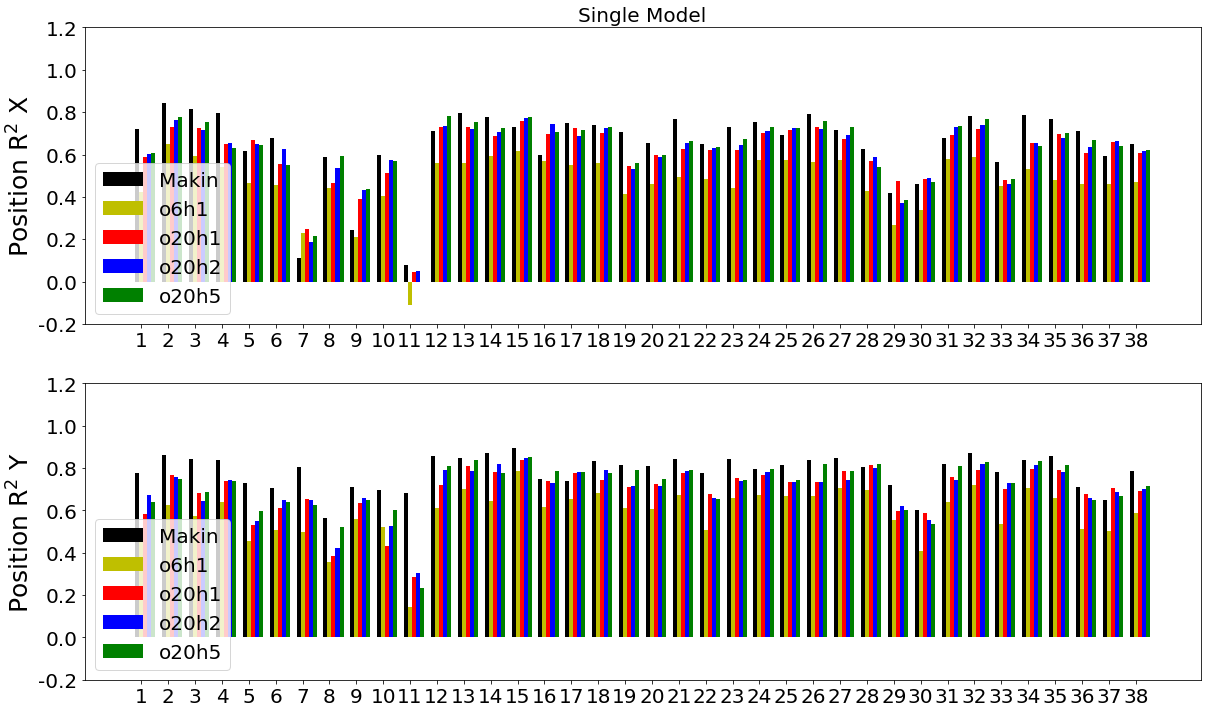

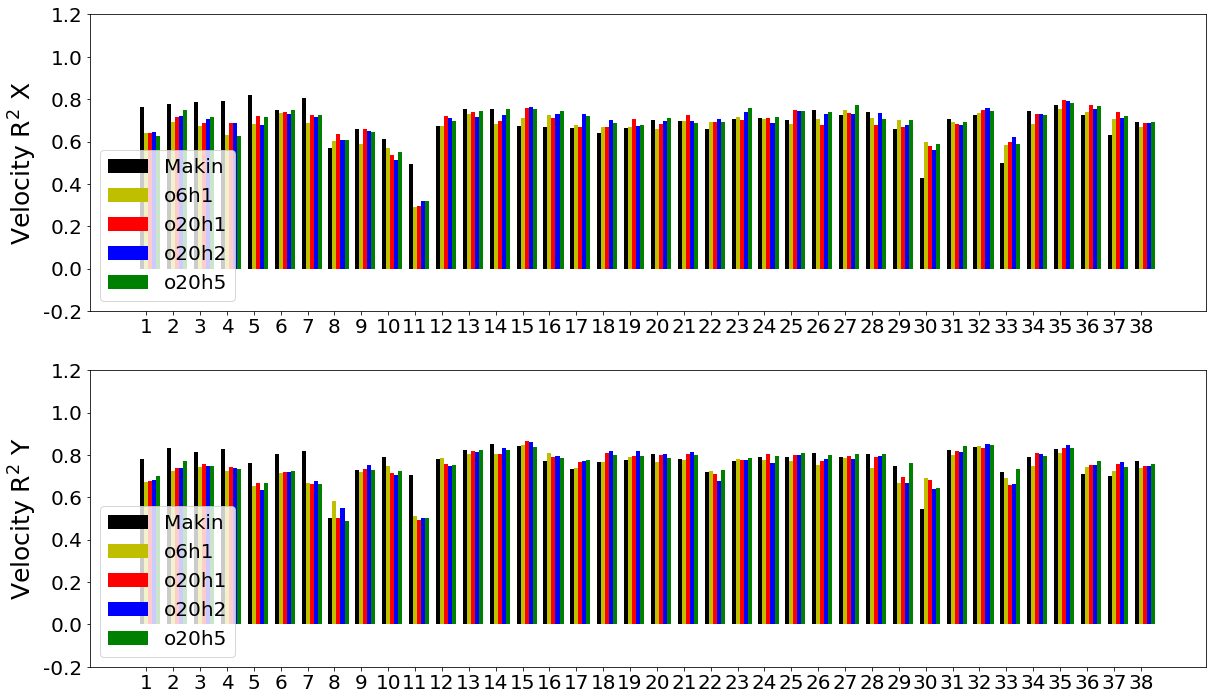

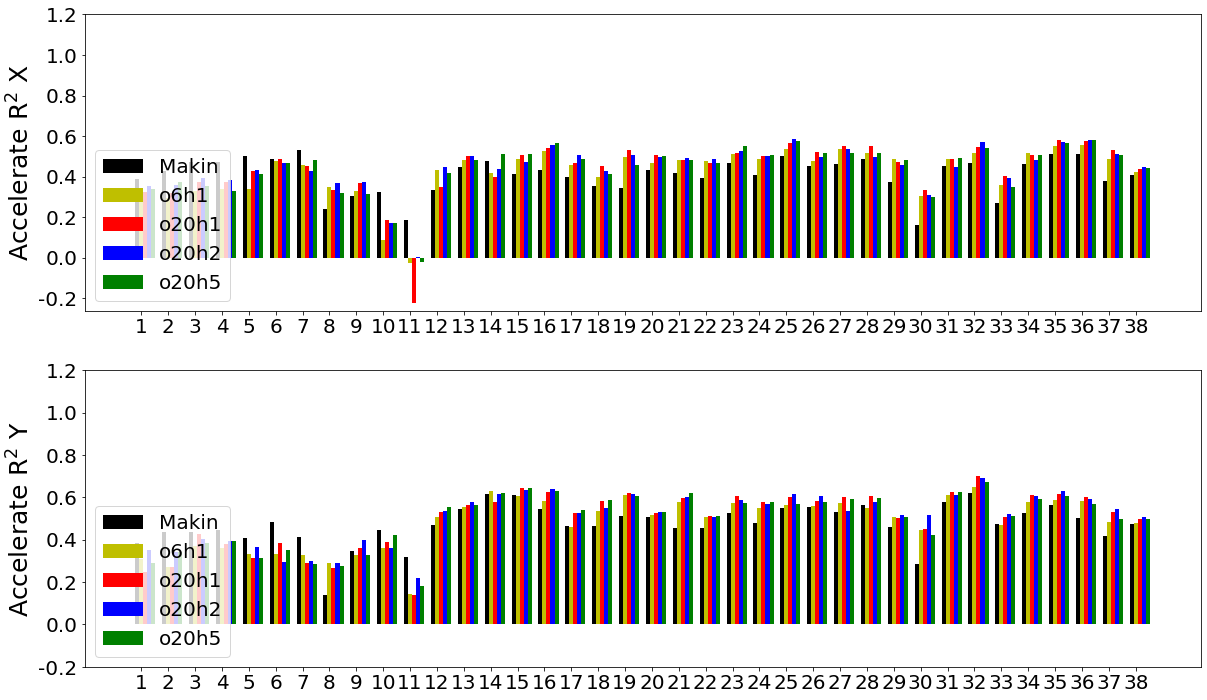

In [328]:
'''
將indy 數據 與論文相比
single model
Or == Order +1 使用幾個時刻的time bin 
H == Hidden

'''
Makin_px = np.hstack((indy_paper_pos_x, np.mean(indy_paper_pos_x)))
Makin_py = np.hstack((indy_paper_pos_y, np.mean(indy_paper_pos_y)))
Makin_vx = np.hstack((indy_paper_vel_x, np.mean(indy_paper_vel_x)))
Makin_vy = np.hstack((indy_paper_vel_y, np.mean(indy_paper_vel_y)))
Makin_ax = np.hstack((indy_paper_acc_x, np.mean(indy_paper_acc_x)))
Makin_ay = np.hstack((indy_paper_acc_y, np.mean(indy_paper_acc_y)))

pos_x_Or_6_H_1 = np.array([0.4243, 0.6481, 0.5929, 0.5389, 0.4674, 0.4577, 0.2281, 0.4431, 0.21, 0.4022, -0.1117, 0.561, 0.5578, 0.5913, 0.6159, 0.5675, 0.5511, 0.5624, 0.4161, 0.4589, 0.4934, 0.4847, 0.4431, 0.5724, 0.5744, 0.563, 0.5745, 0.4281, 0.2691, 0.339, 0.5807, 0.5888, 0.4507, 0.5329, 0.4822, 0.4595, 0.4621])
pos_y_Or_6_H_1 = np.array([0.4622, 0.6243, 0.5746, 0.6385, 0.4567, 0.5054, 0.4978, 0.3575, 0.5613, 0.5208, 0.1441, 0.612, 0.6992, 0.6439, 0.7866, 0.6144, 0.654, 0.6814, 0.6127, 0.6083, 0.6735, 0.5092, 0.6605, 0.6737, 0.6687, 0.6656, 0.7035, 0.6941, 0.5564, 0.4078, 0.64, 0.7184, 0.5345, 0.7061, 0.6573, 0.512, 0.5023])
vel_x_Or_6_H_1 = np.array([0.6395, 0.6937, 0.6711, 0.6296, 0.6819, 0.7332, 0.6864, 0.6013, 0.5882, 0.5689, 0.2898, 0.6723, 0.7281, 0.6807, 0.7113, 0.7259, 0.6784, 0.6678, 0.6678, 0.6607, 0.699, 0.6942, 0.7158, 0.7047, 0.684, 0.7052, 0.7491, 0.7103, 0.7025, 0.5957, 0.6932, 0.7334, 0.584, 0.6806, 0.7523, 0.7396, 0.7068])
vel_y_Or_6_H_1 = np.array([0.6706, 0.724, 0.7443, 0.7232, 0.6533, 0.7157, 0.6659, 0.5842, 0.7215, 0.749, 0.5098, 0.7873, 0.807, 0.8043, 0.8478, 0.8101, 0.7396, 0.7685, 0.7906, 0.7678, 0.7747, 0.7251, 0.7812, 0.7758, 0.7713, 0.7522, 0.7836, 0.7404, 0.6656, 0.6933, 0.7982, 0.8437, 0.6901, 0.7473, 0.8116, 0.7412, 0.725])
acc_x_Or_6_H_1 = np.array([0.2973, 0.2937, 0.3297, 0.3388, 0.3389, 0.4763, 0.4564, 0.3511, 0.3283, 0.0859, -0.0241, 0.4331, 0.4805, 0.4154, 0.4888, 0.5262, 0.456, 0.3986, 0.4971, 0.4666, 0.4836, 0.4771, 0.5117, 0.4875, 0.5349, 0.4753, 0.5367, 0.5153, 0.4851, 0.3032, 0.4866, 0.5184, 0.3585, 0.515, 0.5488, 0.5567, 0.4862])
acc_y_Or_6_H_1 = np.array([0.3086, 0.2691, 0.3719, 0.3588, 0.3326, 0.3322, 0.3265, 0.2891, 0.3278, 0.362, 0.1451, 0.5091, 0.5555, 0.6324, 0.6078, 0.5851, 0.4593, 0.5342, 0.6092, 0.5184, 0.578, 0.5083, 0.5757, 0.5493, 0.5628, 0.5594, 0.5727, 0.5505, 0.5069, 0.4443, 0.6096, 0.6502, 0.469, 0.5774, 0.5873, 0.5833, 0.4836])

pos_x_Or_6_H_1_P = np.hstack((pos_x_Or_6_H_1, np.mean(pos_x_Or_6_H_1)))
pos_y_Or_6_H_1_P = np.hstack((pos_y_Or_6_H_1, np.mean(pos_y_Or_6_H_1)))
vel_x_Or_6_H_1_P = np.hstack((vel_x_Or_6_H_1, np.mean(vel_x_Or_6_H_1)))
vel_y_Or_6_H_1_P = np.hstack((vel_y_Or_6_H_1, np.mean(vel_y_Or_6_H_1)))
acc_x_Or_6_H_1_P = np.hstack((acc_x_Or_6_H_1, np.mean(acc_x_Or_6_H_1)))
acc_y_Or_6_H_1_P = np.hstack((acc_y_Or_6_H_1, np.mean(acc_y_Or_6_H_1)))

pos_x_Or_20_H_1 = np.array([0.5878, 0.7319, 0.7236, 0.6484, 0.6667, 0.554, 0.2465, 0.4636, 0.391, 0.5148, 0.044, 0.7289, 0.7309, 0.6863, 0.7587, 0.6964, 0.7245, 0.7006, 0.5445, 0.5991, 0.6276, 0.6229, 0.6204, 0.7023, 0.7179, 0.7306, 0.6716, 0.5719, 0.473, 0.4863, 0.6917, 0.7194, 0.4789, 0.6567, 0.6948, 0.6066, 0.6571])
pos_y_Or_20_H_1 = np.array([0.5806, 0.7679, 0.6813, 0.7407, 0.5307, 0.6092, 0.6543, 0.3841, 0.634, 0.432, 0.2841, 0.7203, 0.8076, 0.782, 0.8392, 0.7384, 0.7742, 0.7419, 0.7095, 0.7256, 0.7769, 0.6777, 0.7512, 0.7681, 0.7354, 0.7327, 0.7882, 0.8163, 0.5953, 0.5866, 0.7553, 0.7887, 0.7001, 0.7956, 0.7891, 0.6774, 0.7049])
vel_x_Or_20_H_1 = np.array([0.642, 0.7161, 0.6877, 0.6862, 0.7204, 0.7377, 0.7258, 0.6367, 0.6588, 0.5367, 0.2959, 0.7207, 0.7419, 0.6992, 0.7564, 0.7095, 0.6686, 0.6705, 0.7074, 0.6819, 0.7235, 0.6935, 0.702, 0.7132, 0.7511, 0.6794, 0.7358, 0.6763, 0.6693, 0.58, 0.6815, 0.7468, 0.5984, 0.7301, 0.798, 0.771, 0.7385])
vel_y_Or_20_H_1 = np.array([0.6761, 0.7371, 0.7559, 0.7418, 0.6682, 0.7207, 0.6631, 0.5037, 0.7319, 0.7158, 0.4913, 0.7574, 0.8188, 0.8043, 0.8679, 0.7907, 0.7691, 0.8116, 0.7945, 0.7978, 0.8058, 0.7121, 0.7779, 0.8025, 0.8019, 0.772, 0.7966, 0.7912, 0.6951, 0.684, 0.8198, 0.8318, 0.6583, 0.8087, 0.8348, 0.754, 0.7574])
acc_x_Or_20_H_1 = np.array([0.3239, 0.3202, 0.374, 0.3729, 0.4272, 0.4868, 0.453, 0.3359, 0.3673, 0.1855, -0.2228, 0.3508, 0.5041, 0.3994, 0.5042, 0.539, 0.4695, 0.4523, 0.5291, 0.508, 0.4814, 0.4666, 0.514, 0.5041, 0.5668, 0.5196, 0.5525, 0.552, 0.4696, 0.3346, 0.4848, 0.5455, 0.4029, 0.5081, 0.5803, 0.5735, 0.5289])
acc_y_Or_20_H_1 = np.array([0.2494, 0.2699, 0.4258, 0.3815, 0.3158, 0.3832, 0.288, 0.2679, 0.3617, 0.3887, 0.1371, 0.5294, 0.565, 0.5804, 0.6451, 0.6258, 0.5284, 0.5816, 0.621, 0.5259, 0.597, 0.5116, 0.6071, 0.5786, 0.6013, 0.5834, 0.6016, 0.6078, 0.5027, 0.4494, 0.623, 0.7019, 0.5096, 0.6121, 0.6168, 0.6016, 0.5287])

pos_x_Or_20_H_1_P = np.hstack((pos_x_Or_20_H_1, np.mean(pos_x_Or_20_H_1)))
pos_y_Or_20_H_1_P = np.hstack((pos_y_Or_20_H_1, np.mean(pos_y_Or_20_H_1)))
vel_x_Or_20_H_1_P = np.hstack((vel_x_Or_20_H_1, np.mean(vel_x_Or_20_H_1)))
vel_y_Or_20_H_1_P = np.hstack((vel_y_Or_20_H_1, np.mean(vel_y_Or_20_H_1)))
acc_x_Or_20_H_1_P = np.hstack((acc_x_Or_20_H_1, np.mean(acc_x_Or_20_H_1)))
acc_y_Or_20_H_1_P = np.hstack((acc_y_Or_20_H_1, np.mean(acc_y_Or_20_H_1)))

pos_x_Or_20_H_2 = np.array([0.6042, 0.7653, 0.7138, 0.6528, 0.6482, 0.6274, 0.1894, 0.5378, 0.4328, 0.5748, 0.0483, 0.7329, 0.7188, 0.7075, 0.7736, 0.7446, 0.6874, 0.7257, 0.5329, 0.5903, 0.6533, 0.6306, 0.6428, 0.7131, 0.7259, 0.723, 0.6945, 0.5892, 0.3703, 0.4912, 0.7312, 0.7409, 0.4596, 0.6527, 0.6769, 0.6366, 0.6638])
pos_y_Or_20_H_2 = np.array([0.6702, 0.7591, 0.646, 0.7411, 0.5516, 0.6479, 0.6492, 0.4237, 0.66, 0.5262, 0.3065, 0.7893, 0.7848, 0.8208, 0.8456, 0.729, 0.7821, 0.7896, 0.7128, 0.7165, 0.7881, 0.6598, 0.741, 0.7807, 0.7326, 0.732, 0.7434, 0.7987, 0.6187, 0.5546, 0.7449, 0.817, 0.7306, 0.8159, 0.7792, 0.657, 0.6887])
vel_x_Or_20_H_2 = np.array([0.6446, 0.7228, 0.7067, 0.6859, 0.6776, 0.7286, 0.7162, 0.6086, 0.6511, 0.5113, 0.3179, 0.7116, 0.7178, 0.7231, 0.7618, 0.7284, 0.7309, 0.7028, 0.6752, 0.6993, 0.6984, 0.7078, 0.74, 0.6897, 0.7421, 0.7293, 0.7293, 0.7325, 0.6786, 0.5621, 0.6763, 0.7581, 0.6204, 0.7315, 0.7904, 0.756, 0.7115])
vel_y_Or_20_H_2 = np.array([0.6806, 0.7364, 0.746, 0.7375, 0.637, 0.7198, 0.6783, 0.5487, 0.7539, 0.7048, 0.5035, 0.7481, 0.8158, 0.8319, 0.8607, 0.7946, 0.7711, 0.8176, 0.8208, 0.8036, 0.8121, 0.6754, 0.7758, 0.7616, 0.7999, 0.7824, 0.7818, 0.7965, 0.6673, 0.6381, 0.8132, 0.8518, 0.6629, 0.806, 0.8459, 0.7507, 0.7659])
acc_x_Or_20_H_2 = np.array([0.3554, 0.3585, 0.3909, 0.3856, 0.4334, 0.4663, 0.4272, 0.3669, 0.3746, 0.1711, 0.0054, 0.4463, 0.5001, 0.4355, 0.4741, 0.5561, 0.5079, 0.4259, 0.5066, 0.4979, 0.4898, 0.4859, 0.5286, 0.5033, 0.5851, 0.4984, 0.5355, 0.4957, 0.456, 0.3104, 0.4476, 0.5718, 0.3924, 0.482, 0.5704, 0.5801, 0.5125])
acc_y_Or_20_H_2 = np.array([0.351, 0.3402, 0.4031, 0.3951, 0.3661, 0.2959, 0.298, 0.289, 0.3996, 0.3615, 0.217, 0.5376, 0.577, 0.616, 0.6331, 0.6373, 0.5285, 0.5477, 0.6152, 0.5305, 0.602, 0.5066, 0.5891, 0.5678, 0.6156, 0.6077, 0.5351, 0.5782, 0.5153, 0.5182, 0.6092, 0.6926, 0.522, 0.6057, 0.6284, 0.5946, 0.5448])

pos_x_Or_20_H_2_P = np.hstack((pos_x_Or_20_H_2, np.mean(pos_x_Or_20_H_2)))
pos_y_Or_20_H_2_P = np.hstack((pos_y_Or_20_H_2, np.mean(pos_y_Or_20_H_2)))
vel_x_Or_20_H_2_P = np.hstack((vel_x_Or_20_H_2, np.mean(vel_x_Or_20_H_2)))
vel_y_Or_20_H_2_P = np.hstack((vel_y_Or_20_H_2, np.mean(vel_y_Or_20_H_2)))
acc_x_Or_20_H_2_P = np.hstack((acc_x_Or_20_H_2, np.mean(acc_x_Or_20_H_2)))
acc_y_Or_20_H_2_P = np.hstack((acc_y_Or_20_H_2, np.mean(acc_y_Or_20_H_2)))

pos_x_Or_20_H_5 = np.array([0.6059, 0.7787, 0.7524, 0.6292, 0.6438, 0.5518, 0.2174, 0.5921, 0.4379, 0.5701, -0.0022, 0.7811, 0.755, 0.7265, 0.7778, 0.7053, 0.7157, 0.7288, 0.5606, 0.5981, 0.6636, 0.6369, 0.6715, 0.7282, 0.726, 0.7578, 0.7303, 0.5401, 0.386, 0.4697, 0.7355, 0.7695, 0.4842, 0.6415, 0.7016, 0.6681, 0.6402])
pos_y_Or_20_H_5 = np.array([0.6385, 0.7464, 0.6844, 0.7386, 0.5957, 0.6402, 0.6276, 0.5224, 0.6472, 0.5999, 0.234, 0.8093, 0.8396, 0.7763, 0.8532, 0.7838, 0.7814, 0.7782, 0.7889, 0.7494, 0.7905, 0.6524, 0.7454, 0.7953, 0.7453, 0.817, 0.7876, 0.8195, 0.6028, 0.5375, 0.8111, 0.8271, 0.7309, 0.8328, 0.8126, 0.6497, 0.6667])
vel_x_Or_20_H_5 = np.array([0.6267, 0.749, 0.7155, 0.6275, 0.7142, 0.7477, 0.7268, 0.6054, 0.6452, 0.5484, 0.3184, 0.6974, 0.7447, 0.7542, 0.7556, 0.7464, 0.7223, 0.6855, 0.6788, 0.7096, 0.6888, 0.6929, 0.757, 0.7182, 0.7465, 0.739, 0.7717, 0.7053, 0.7009, 0.5904, 0.6944, 0.7459, 0.5861, 0.7256, 0.7812, 0.7682, 0.721])
vel_y_Or_20_H_5 = np.array([0.6996, 0.7709, 0.7495, 0.7347, 0.6701, 0.7248, 0.6613, 0.4905, 0.7307, 0.7267, 0.5016, 0.7543, 0.823, 0.8257, 0.8394, 0.7865, 0.7751, 0.7998, 0.7974, 0.7874, 0.8005, 0.7287, 0.7865, 0.7964, 0.8081, 0.7999, 0.8038, 0.8033, 0.7642, 0.6452, 0.842, 0.8458, 0.7342, 0.7949, 0.8345, 0.7716, 0.7457])
acc_x_Or_20_H_5 = np.array([0.3375, 0.3718, 0.3527, 0.3272, 0.4135, 0.4667, 0.4799, 0.3201, 0.3146, 0.1711, -0.0199, 0.4156, 0.4814, 0.511, 0.5092, 0.565, 0.4855, 0.414, 0.4582, 0.4993, 0.4814, 0.4652, 0.5525, 0.5066, 0.5744, 0.5187, 0.5182, 0.5164, 0.4799, 0.299, 0.4938, 0.5404, 0.3508, 0.5054, 0.5647, 0.5786, 0.5075])
acc_y_Or_20_H_5 = np.array([0.2918, 0.3441, 0.3827, 0.3927, 0.3151, 0.3508, 0.2855, 0.2773, 0.3277, 0.4223, 0.1804, 0.5567, 0.5651, 0.6186, 0.644, 0.6312, 0.5417, 0.5861, 0.6055, 0.5309, 0.6225, 0.5101, 0.5734, 0.5789, 0.5674, 0.5777, 0.5925, 0.595, 0.5051, 0.4227, 0.6251, 0.6723, 0.5119, 0.5917, 0.6058, 0.5681, 0.4977])

pos_x_Or_20_H_5_P = np.hstack((pos_x_Or_20_H_5, np.mean(pos_x_Or_20_H_5)))
pos_y_Or_20_H_5_P = np.hstack((pos_y_Or_20_H_5, np.mean(pos_y_Or_20_H_5)))
vel_x_Or_20_H_5_P = np.hstack((vel_x_Or_20_H_5, np.mean(vel_x_Or_20_H_5)))
vel_y_Or_20_H_5_P = np.hstack((vel_y_Or_20_H_5, np.mean(vel_y_Or_20_H_5)))
acc_x_Or_20_H_5_P = np.hstack((acc_x_Or_20_H_5, np.mean(acc_x_Or_20_H_5)))
acc_y_Or_20_H_5_P = np.hstack((acc_y_Or_20_H_5, np.mean(acc_y_Or_20_H_5)))

x_ticks = []
width = 0.15
for n in range(38):
    x_ticks.append(n+1)
x_ticks = np.array(x_ticks)
y_ticks= np.array([-0.2,0, 0.2, 0.4, 0.6, 0.8,1,1.2])

fig, ax_= plt.subplots(2, 1, figsize = (20,12))
ax_[0].set_title('Single Model', size=20 )
ax_[0].bar(x_ticks-width, Makin_px, width, label='Makin', color='#000000')
ax_[0].bar(x_ticks, pos_x_Or_6_H_1_P, width, label='o6h1', color='y')
ax_[0].bar(x_ticks+width, pos_x_Or_20_H_1_P, width, label='o20h1', color='r')
ax_[0].bar(x_ticks+width*2, pos_x_Or_20_H_2_P, width, label='o20h2', color='b')
ax_[0].bar(x_ticks+width*3, pos_x_Or_20_H_5_P, width, label='o20h5', color='g')
ax_[0].set_ylabel('Position R$^{2}$ X', size=25)
ax_[0].set_yticks(y_ticks)
ax_[0].set_yticklabels(y_ticks, size = 20)
ax_[0].set_xticks(x_ticks)
ax_[0].set_xticklabels(x_ticks, size=20)
ax_[0].legend(fontsize = 20, loc=3)

ax_[1].bar(x_ticks-width, Makin_py, width, label='Makin', color='#000000')
ax_[1].bar(x_ticks, pos_y_Or_6_H_1_P, width, label='o6h1', color='y')
ax_[1].bar(x_ticks+width, pos_y_Or_20_H_1_P, width, label='o20h1', color='r')
ax_[1].bar(x_ticks+width*2, pos_y_Or_20_H_2_P, width, label='o20h2', color='b')
ax_[1].bar(x_ticks+width*3, pos_y_Or_20_H_5_P, width, label='o20h5', color='g')
ax_[1].set_ylabel('Position R$^{2}$ Y', size=25)
ax_[1].set_yticks(y_ticks)
ax_[1].set_yticklabels(y_ticks, size = 20)
ax_[1].set_xticks(x_ticks)
ax_[1].set_xticklabels(x_ticks, size=20)
ax_[1].legend(fontsize = 20, loc=3)

fig, ax_= plt.subplots(2, 1, figsize = (20,12))
ax_[0].bar(x_ticks-width, Makin_vx, width, label='Makin', color='#000000')
ax_[0].bar(x_ticks, vel_x_Or_6_H_1_P, width, label='o6h1', color='y')
ax_[0].bar(x_ticks+width, vel_x_Or_20_H_1_P, width, label='o20h1', color='r')
ax_[0].bar(x_ticks+width*2, vel_x_Or_20_H_2_P, width, label='o20h2', color='b')
ax_[0].bar(x_ticks+width*3, vel_x_Or_20_H_5_P, width, label='o20h5', color='g')
ax_[0].set_ylabel('Velocity R$^{2}$ X', size=25)
ax_[0].set_yticks(y_ticks)
ax_[0].set_yticklabels(y_ticks, size = 20)
ax_[0].set_xticks(x_ticks)
ax_[0].set_xticklabels(x_ticks, size=20)
ax_[0].legend(fontsize = 20, loc=3)

ax_[1].bar(x_ticks-width, Makin_vy, width, label='Makin', color='#000000')
ax_[1].bar(x_ticks, vel_y_Or_6_H_1_P, width, label='o6h1', color='y')
ax_[1].bar(x_ticks+width, vel_y_Or_20_H_1_P, width, label='o20h1', color='r')
ax_[1].bar(x_ticks+width*2, vel_y_Or_20_H_2_P, width, label='o20h2', color='b')
ax_[1].bar(x_ticks+width*3, vel_y_Or_20_H_5_P, width, label='o20h5', color='g')
ax_[1].set_ylabel('Velocity R$^{2}$ Y', size=25)
ax_[1].set_yticks(y_ticks)
ax_[1].set_yticklabels(y_ticks, size = 20)
ax_[1].set_xticks(x_ticks)
ax_[1].set_xticklabels(x_ticks, size=20)
ax_[1].legend(fontsize = 20, loc=3)

fig, ax_= plt.subplots(2, 1, figsize = (20,12))
ax_[0].bar(x_ticks-width, Makin_ax, width, label='Makin', color='#000000')
ax_[0].bar(x_ticks, acc_x_Or_6_H_1_P, width, label='o6h1', color='y')
ax_[0].bar(x_ticks+width, acc_x_Or_20_H_1_P, width, label='o20h1', color='r')
ax_[0].bar(x_ticks+width*2, acc_x_Or_20_H_2_P, width, label='o20h2', color='b')
ax_[0].bar(x_ticks+width*3, acc_x_Or_20_H_5_P, width, label='o20h5', color='g')
ax_[0].set_ylabel('Accelerate R$^{2}$ X', size=25)
ax_[0].set_yticks(y_ticks)
ax_[0].set_yticklabels(y_ticks, size = 20)
ax_[0].set_xticks(x_ticks)
ax_[0].set_xticklabels(x_ticks, size=20)
ax_[0].legend(fontsize = 20, loc=3)

ax_[1].bar(x_ticks-width, Makin_ay, width, label='Makin', color='#000000')
ax_[1].bar(x_ticks, acc_y_Or_6_H_1_P, width, label='o6h1', color='y')
ax_[1].bar(x_ticks+width, acc_y_Or_20_H_1_P, width, label='o20h1', color='r')
ax_[1].bar(x_ticks+width*2, acc_y_Or_20_H_2_P, width, label='o20h2', color='b')
ax_[1].bar(x_ticks+width*3, acc_y_Or_20_H_5_P, width, label='o20h5', color='g')
ax_[1].set_ylabel('Accelerate R$^{2}$ Y', size=25)
ax_[1].set_yticks(y_ticks)
ax_[1].set_yticklabels(y_ticks, size = 20)
ax_[1].set_xticks(x_ticks)
ax_[1].set_xticklabels(x_ticks, size=20)
ax_[1].legend(fontsize = 20, loc=3)

In [247]:
'''
CROSS MODEL
Order = 19+1 , Hidden_Num =5 
'''
with torch.no_grad():
    print('---------position-----------------')
    print('R2_POS_X :',R2_POS_X_indy)
#     print('R2_POS_X SNR :', get_SNR(np.mean(R2_POS_X_indy)))
    print('R2_POS_Y :',R2_POS_Y_indy)
#     print('R2_POS_Y SNR:',get_SNR(np.mean(R2_POS_Y_indy)))
    print('R2_POS_X mean :',np.mean(R2_POS_X_indy))
    print('R2_POS_Y mean :',np.mean(R2_POS_Y_indy))
    print('POS avg(X+Y):',  (np.mean(R2_POS_X_indy)+np.mean(R2_POS_Y_indy))/2 )
    
    print('\n---------velocity-----------------')
    print('R2_VEL_X :',R2_VEL_X_indy)
#     print('R2_VEL_X SNR :', get_SNR(np.mean(R2_VEL_X_indy)))
    print('R2_VEL_Y :',R2_VEL_Y_indy)
#     print('R2_VEL_Y SNR:',get_SNR(np.mean(R2_VEL_Y_indy)))
#     print('vel avg(X+Y):', get_SNR( (np.mean(R2_VEL_X_indy)+np.mean(R2_VEL_Y_indy))/2   ))
    print('R2_VEL_X mean :',np.mean(R2_VEL_X_indy))
    print('R2_VEL_Y mean :',np.mean(R2_VEL_Y_indy))
    print('vel avg(X+Y):', (np.mean(R2_VEL_X_indy)+np.mean(R2_VEL_Y_indy))/2)
          
    print('\n---------accelerate-----------------')
    print('R2_ACC_X :',R2_ACC_X_indy)
#     print('R2_ACC_X SNR :', get_SNR(np.mean(R2_ACC_X_indy)))
    print('R2_ACC_Y :',R2_ACC_Y_indy)
#     print('R2_ACC_Y SNR:',get_SNR(np.mean(R2_ACC_Y_indy)))
    print('R2_ACC_X mean :',np.mean(R2_ACC_X_indy))
    print('R2_ACC_Y mean :',np.mean(R2_ACC_Y_indy))
    print('ACC avg(X+Y):',  (np.mean(R2_ACC_X_indy)+np.mean(R2_ACC_Y_indy))/2 )


---------position-----------------
R2_POS_X : [0.5813, 0.8521, 0.7783, 0.7503, 0.7503, 0.7313, 0.4032, 0.6195, 0.526, 0.6942, -0.0389, 0.7511, 0.81, 0.7852, 0.8128, 0.7725, 0.7607, 0.7995, 0.6987, 0.6965, 0.783, 0.7451, 0.6383, 0.7684, 0.774, 0.778, 0.7253, 0.7235, 0.6845, 0.6428, 0.7983, 0.7816, 0.6399, 0.7511, 0.6634, 0.7477, 0.7377]
R2_POS_Y : [0.6748, 0.8447, 0.7684, 0.7726, 0.6095, 0.7378, 0.7044, 0.6298, 0.6882, 0.8159, 0.0526, 0.8586, 0.8893, 0.8463, 0.8822, 0.8266, 0.8141, 0.8224, 0.8057, 0.8506, 0.8882, 0.7801, 0.7574, 0.8524, 0.8283, 0.852, 0.8649, 0.859, 0.752, 0.7238, 0.8568, 0.871, 0.7495, 0.8437, 0.8034, 0.7984, 0.7425]
R2_POS_X mean : 0.700464864864865
R2_POS_Y mean : 0.7761594594594594
POS avg(X+Y): 0.7383121621621622

---------velocity-----------------
R2_VEL_X : [0.6709, 0.818, 0.7705, 0.7487, 0.7875, 0.8015, 0.8044, 0.7623, 0.7095, 0.7469, 0.3662, 0.825, 0.8288, 0.7691, 0.8316, 0.8314, 0.7974, 0.7724, 0.81, 0.7763, 0.7839, 0.8243, 0.749, 0.8196, 0.821, 0.7916, 0.8419

In [251]:
'''
CROSS MODEL
Order = 19+1 , Hidden_Num = 2
'''
with torch.no_grad():
    print('---------position-----------------')
    print('R2_POS_X :',R2_POS_X_indy)
#     print('R2_POS_X SNR :', get_SNR(np.mean(R2_POS_X_indy)))
    print('R2_POS_Y :',R2_POS_Y_indy)
#     print('R2_POS_Y SNR:',get_SNR(np.mean(R2_POS_Y_indy)))
    print('R2_POS_X mean :',np.mean(R2_POS_X_indy))
    print('R2_POS_Y mean :',np.mean(R2_POS_Y_indy))
    print('POS avg(X+Y):',  (np.mean(R2_POS_X_indy)+np.mean(R2_POS_Y_indy))/2 )
    
    print('\n---------velocity-----------------')
    print('R2_VEL_X :',R2_VEL_X_indy)
#     print('R2_VEL_X SNR :', get_SNR(np.mean(R2_VEL_X_indy)))
    print('R2_VEL_Y :',R2_VEL_Y_indy)
#     print('R2_VEL_Y SNR:',get_SNR(np.mean(R2_VEL_Y_indy)))
#     print('vel avg(X+Y):', get_SNR( (np.mean(R2_VEL_X_indy)+np.mean(R2_VEL_Y_indy))/2   ))
    print('R2_VEL_X mean :',np.mean(R2_VEL_X_indy))
    print('R2_VEL_Y mean :',np.mean(R2_VEL_Y_indy))
    print('vel avg(X+Y):', (np.mean(R2_VEL_X_indy)+np.mean(R2_VEL_Y_indy))/2)
          
    print('\n---------accelerate-----------------')
    print('R2_ACC_X :',R2_ACC_X_indy)
#     print('R2_ACC_X SNR :', get_SNR(np.mean(R2_ACC_X_indy)))
    print('R2_ACC_Y :',R2_ACC_Y_indy)
#     print('R2_ACC_Y SNR:',get_SNR(np.mean(R2_ACC_Y_indy)))
    print('R2_ACC_X mean :',np.mean(R2_ACC_X_indy))
    print('R2_ACC_Y mean :',np.mean(R2_ACC_Y_indy))
    print('ACC avg(X+Y):',  (np.mean(R2_ACC_X_indy)+np.mean(R2_ACC_Y_indy))/2 )


---------position-----------------
R2_POS_X : [0.65, 0.8394, 0.7757, 0.7472, 0.7347, 0.714, 0.3724, 0.6484, 0.6018, 0.6328, 0.0252, 0.7542, 0.8097, 0.7624, 0.8121, 0.8159, 0.7552, 0.762, 0.6169, 0.7196, 0.7341, 0.7435, 0.6357, 0.742, 0.7894, 0.6968, 0.777, 0.7325, 0.67, 0.5868, 0.7609, 0.7785, 0.6523, 0.7662, 0.6784, 0.7083, 0.7206]
R2_POS_Y : [0.7014, 0.8405, 0.785, 0.7608, 0.5653, 0.7526, 0.6753, 0.5905, 0.6573, 0.8008, 0.0745, 0.8608, 0.8688, 0.8425, 0.8905, 0.8461, 0.8211, 0.8554, 0.831, 0.8363, 0.8736, 0.7484, 0.747, 0.8546, 0.8347, 0.8153, 0.8694, 0.8279, 0.7236, 0.7197, 0.8278, 0.8733, 0.7379, 0.8368, 0.815, 0.7886, 0.7141]
R2_POS_X mean : 0.6952054054054055
R2_POS_Y mean : 0.7693027027027026
POS avg(X+Y): 0.7322540540540541

---------velocity-----------------
R2_VEL_X : [0.6736, 0.8194, 0.787, 0.7672, 0.7715, 0.797, 0.8055, 0.7675, 0.7231, 0.7515, 0.3612, 0.7937, 0.8531, 0.7724, 0.8218, 0.8305, 0.8049, 0.7744, 0.7665, 0.7875, 0.7976, 0.8191, 0.7561, 0.8107, 0.8006, 0.7732, 0.82

In [255]:
'''
CROSS MODEL
Order = 19+1 , Hidden_Num = 1
'''
with torch.no_grad():
    print('---------position-----------------')
    print('R2_POS_X :',R2_POS_X_indy)
#     print('R2_POS_X SNR :', get_SNR(np.mean(R2_POS_X_indy)))
    print('R2_POS_Y :',R2_POS_Y_indy)
#     print('R2_POS_Y SNR:',get_SNR(np.mean(R2_POS_Y_indy)))
    print('R2_POS_X mean :',np.mean(R2_POS_X_indy))
    print('R2_POS_Y mean :',np.mean(R2_POS_Y_indy))
    print('POS avg(X+Y):',  (np.mean(R2_POS_X_indy)+np.mean(R2_POS_Y_indy))/2 )
    
    print('\n---------velocity-----------------')
    print('R2_VEL_X :',R2_VEL_X_indy)
#     print('R2_VEL_X SNR :', get_SNR(np.mean(R2_VEL_X_indy)))
    print('R2_VEL_Y :',R2_VEL_Y_indy)
#     print('R2_VEL_Y SNR:',get_SNR(np.mean(R2_VEL_Y_indy)))
#     print('vel avg(X+Y):', get_SNR( (np.mean(R2_VEL_X_indy)+np.mean(R2_VEL_Y_indy))/2   ))
    print('R2_VEL_X mean :',np.mean(R2_VEL_X_indy))
    print('R2_VEL_Y mean :',np.mean(R2_VEL_Y_indy))
    print('vel avg(X+Y):', (np.mean(R2_VEL_X_indy)+np.mean(R2_VEL_Y_indy))/2)
          
    print('\n---------accelerate-----------------')
    print('R2_ACC_X :',R2_ACC_X_indy)
#     print('R2_ACC_X SNR :', get_SNR(np.mean(R2_ACC_X_indy)))
    print('R2_ACC_Y :',R2_ACC_Y_indy)
#     print('R2_ACC_Y SNR:',get_SNR(np.mean(R2_ACC_Y_indy)))
    print('R2_ACC_X mean :',np.mean(R2_ACC_X_indy))
    print('R2_ACC_Y mean :',np.mean(R2_ACC_Y_indy))
    print('ACC avg(X+Y):',  (np.mean(R2_ACC_X_indy)+np.mean(R2_ACC_Y_indy))/2 )


---------position-----------------
R2_POS_X : [0.5804, 0.8272, 0.7683, 0.7376, 0.7097, 0.7295, 0.3482, 0.6214, 0.5664, 0.651, -0.1096, 0.7001, 0.8038, 0.759, 0.7867, 0.7746, 0.7499, 0.7676, 0.6512, 0.7113, 0.7591, 0.728, 0.6372, 0.7638, 0.7463, 0.7491, 0.7423, 0.7094, 0.6317, 0.6389, 0.7984, 0.7821, 0.6043, 0.7626, 0.6726, 0.7415, 0.6993]
R2_POS_Y : [0.7009, 0.8171, 0.7574, 0.7379, 0.6208, 0.7291, 0.6767, 0.5845, 0.681, 0.7785, -0.1606, 0.8585, 0.901, 0.8279, 0.8984, 0.8336, 0.8368, 0.8459, 0.8171, 0.8301, 0.8658, 0.7949, 0.7531, 0.8481, 0.8336, 0.8514, 0.8675, 0.8283, 0.7444, 0.705, 0.8326, 0.842, 0.7415, 0.8116, 0.805, 0.755, 0.7608]
R2_POS_X mean : 0.683808108108108
R2_POS_Y mean : 0.7625189189189189
POS avg(X+Y): 0.7231635135135135

---------velocity-----------------
R2_VEL_X : [0.6516, 0.8163, 0.7698, 0.765, 0.7703, 0.785, 0.8038, 0.7639, 0.7393, 0.7412, 0.3264, 0.829, 0.8281, 0.7951, 0.8305, 0.8287, 0.8145, 0.7763, 0.799, 0.7671, 0.7755, 0.8288, 0.7154, 0.8082, 0.8251, 0.7961, 0.

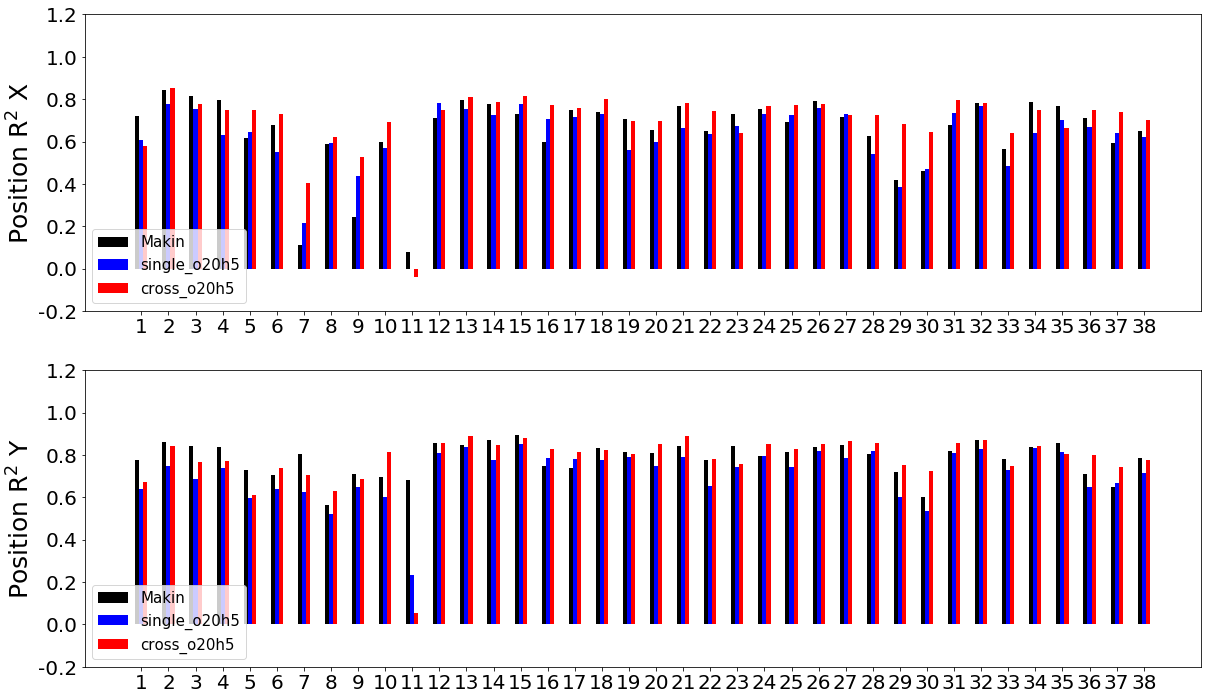

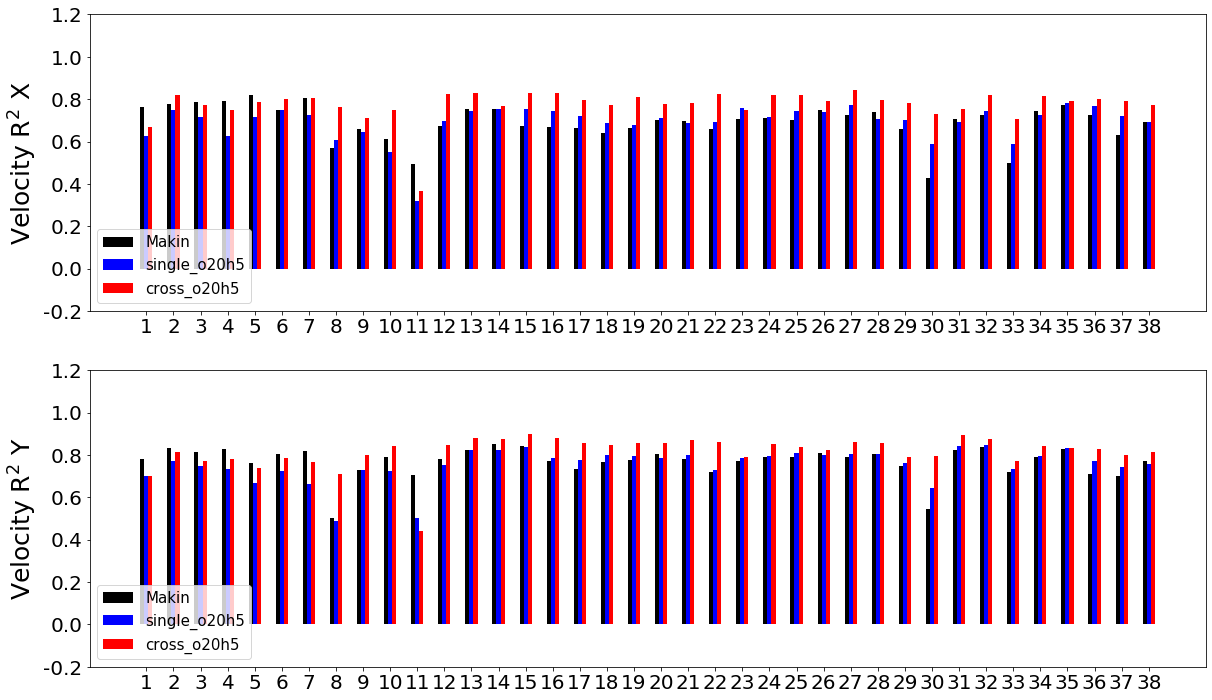

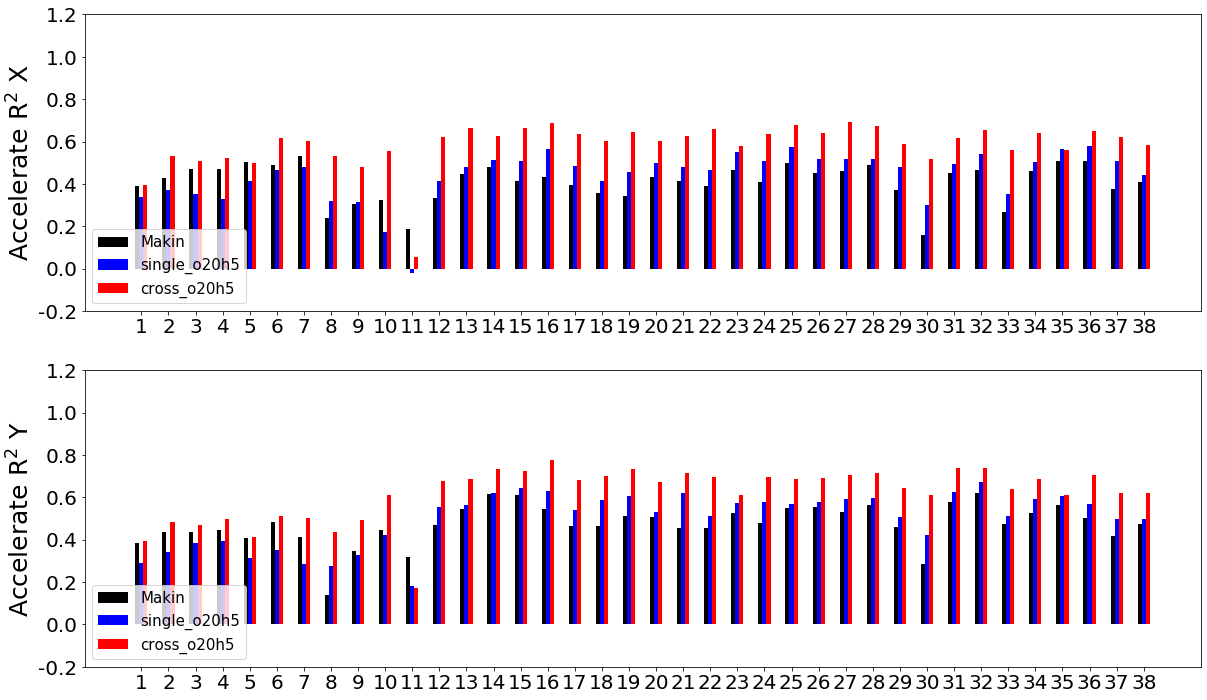

In [342]:
'''
將indy 數據 與論文相比
single model
Or == Order +1 使用幾個時刻的time bin 
H == Hidden

'''
Makin_px = np.hstack((indy_paper_pos_x, np.mean(indy_paper_pos_x)))
Makin_py = np.hstack((indy_paper_pos_y, np.mean(indy_paper_pos_y)))
Makin_vx = np.hstack((indy_paper_vel_x, np.mean(indy_paper_vel_x)))
Makin_vy = np.hstack((indy_paper_vel_y, np.mean(indy_paper_vel_y)))
Makin_ax = np.hstack((indy_paper_acc_x, np.mean(indy_paper_acc_x)))
Makin_ay = np.hstack((indy_paper_acc_y, np.mean(indy_paper_acc_y)))

single_pos_x_Or_20_H_5 = np.array([0.6059, 0.7787, 0.7524, 0.6292, 0.6438, 0.5518, 0.2174, 0.5921, 0.4379, 0.5701, -0.0022, 0.7811, 0.755, 0.7265, 0.7778, 0.7053, 0.7157, 0.7288, 0.5606, 0.5981, 0.6636, 0.6369, 0.6715, 0.7282, 0.726, 0.7578, 0.7303, 0.5401, 0.386, 0.4697, 0.7355, 0.7695, 0.4842, 0.6415, 0.7016, 0.6681, 0.6402])
single_pos_y_Or_20_H_5 = np.array([0.6385, 0.7464, 0.6844, 0.7386, 0.5957, 0.6402, 0.6276, 0.5224, 0.6472, 0.5999, 0.234, 0.8093, 0.8396, 0.7763, 0.8532, 0.7838, 0.7814, 0.7782, 0.7889, 0.7494, 0.7905, 0.6524, 0.7454, 0.7953, 0.7453, 0.817, 0.7876, 0.8195, 0.6028, 0.5375, 0.8111, 0.8271, 0.7309, 0.8328, 0.8126, 0.6497, 0.6667])
single_vel_x_Or_20_H_5 = np.array([0.6267, 0.749, 0.7155, 0.6275, 0.7142, 0.7477, 0.7268, 0.6054, 0.6452, 0.5484, 0.3184, 0.6974, 0.7447, 0.7542, 0.7556, 0.7464, 0.7223, 0.6855, 0.6788, 0.7096, 0.6888, 0.6929, 0.757, 0.7182, 0.7465, 0.739, 0.7717, 0.7053, 0.7009, 0.5904, 0.6944, 0.7459, 0.5861, 0.7256, 0.7812, 0.7682, 0.721])
single_vel_y_Or_20_H_5 = np.array([0.6996, 0.7709, 0.7495, 0.7347, 0.6701, 0.7248, 0.6613, 0.4905, 0.7307, 0.7267, 0.5016, 0.7543, 0.823, 0.8257, 0.8394, 0.7865, 0.7751, 0.7998, 0.7974, 0.7874, 0.8005, 0.7287, 0.7865, 0.7964, 0.8081, 0.7999, 0.8038, 0.8033, 0.7642, 0.6452, 0.842, 0.8458, 0.7342, 0.7949, 0.8345, 0.7716, 0.7457])
single_acc_x_Or_20_H_5 = np.array([0.3375, 0.3718, 0.3527, 0.3272, 0.4135, 0.4667, 0.4799, 0.3201, 0.3146, 0.1711, -0.0199, 0.4156, 0.4814, 0.511, 0.5092, 0.565, 0.4855, 0.414, 0.4582, 0.4993, 0.4814, 0.4652, 0.5525, 0.5066, 0.5744, 0.5187, 0.5182, 0.5164, 0.4799, 0.299, 0.4938, 0.5404, 0.3508, 0.5054, 0.5647, 0.5786, 0.5075])
single_acc_y_Or_20_H_5 = np.array([0.2918, 0.3441, 0.3827, 0.3927, 0.3151, 0.3508, 0.2855, 0.2773, 0.3277, 0.4223, 0.1804, 0.5567, 0.5651, 0.6186, 0.644, 0.6312, 0.5417, 0.5861, 0.6055, 0.5309, 0.6225, 0.5101, 0.5734, 0.5789, 0.5674, 0.5777, 0.5925, 0.595, 0.5051, 0.4227, 0.6251, 0.6723, 0.5119, 0.5917, 0.6058, 0.5681, 0.4977])

single_pos_x_Or_20_H_5_P = np.hstack((single_pos_x_Or_20_H_5, np.mean(single_pos_x_Or_20_H_5)))
single_pos_y_Or_20_H_5_P = np.hstack((single_pos_y_Or_20_H_5, np.mean(single_pos_y_Or_20_H_5)))
single_vel_x_Or_20_H_5_P = np.hstack((single_vel_x_Or_20_H_5, np.mean(single_vel_x_Or_20_H_5)))
single_vel_y_Or_20_H_5_P = np.hstack((single_vel_y_Or_20_H_5, np.mean(single_vel_y_Or_20_H_5)))
single_acc_x_Or_20_H_5_P = np.hstack((single_acc_x_Or_20_H_5, np.mean(single_acc_x_Or_20_H_5)))
single_acc_y_Or_20_H_5_P = np.hstack((single_acc_y_Or_20_H_5, np.mean(single_acc_y_Or_20_H_5)))

cross_pos_x_Or_20_H_5 = np.array([0.5813, 0.8521, 0.7783, 0.7503, 0.7503, 0.7313, 0.4032, 0.6195, 0.526, 0.6942, -0.0389, 0.7511, 0.81, 0.7852, 0.8128, 0.7725, 0.7607, 0.7995, 0.6987, 0.6965, 0.783, 0.7451, 0.6383, 0.7684, 0.774, 0.778, 0.7253, 0.7235, 0.6845, 0.6428, 0.7983, 0.7816, 0.6399, 0.7511, 0.6634, 0.7477, 0.7377])
cross_pos_y_Or_20_H_5 = np.array([0.6748, 0.8447, 0.7684, 0.7726, 0.6095, 0.7378, 0.7044, 0.6298, 0.6882, 0.8159, 0.0526, 0.8586, 0.8893, 0.8463, 0.8822, 0.8266, 0.8141, 0.8224, 0.8057, 0.8506, 0.8882, 0.7801, 0.7574, 0.8524, 0.8283, 0.852, 0.8649, 0.859, 0.752, 0.7238, 0.8568, 0.871, 0.7495, 0.8437, 0.8034, 0.7984, 0.7425])
cross_vel_x_Or_20_H_5 = np.array([0.6709, 0.818, 0.7705, 0.7487, 0.7875, 0.8015, 0.8044, 0.7623, 0.7095, 0.7469, 0.3662, 0.825, 0.8288, 0.7691, 0.8316, 0.8314, 0.7974, 0.7724, 0.81, 0.7763, 0.7839, 0.8243, 0.749, 0.8196, 0.821, 0.7916, 0.8419, 0.7951, 0.7801, 0.7284, 0.7554, 0.8207, 0.7075, 0.8162, 0.79, 0.8017, 0.7938])
cross_vel_y_Or_20_H_5 = np.array([0.6986, 0.8127, 0.7715, 0.7804, 0.7384, 0.7857, 0.7658, 0.7095, 0.8021, 0.8405, 0.4407, 0.8461, 0.8793, 0.8771, 0.8988, 0.8811, 0.8589, 0.8493, 0.8571, 0.8556, 0.8702, 0.8636, 0.7888, 0.8507, 0.8387, 0.8241, 0.863, 0.8562, 0.7885, 0.7966, 0.8922, 0.8764, 0.7714, 0.8421, 0.832, 0.8283, 0.801])
cross_acc_x_Or_20_H_5 = np.array([0.3969, 0.532, 0.5083, 0.5247, 0.5006, 0.6162, 0.6044, 0.5328, 0.478, 0.5557, 0.0529, 0.6221, 0.6649, 0.6283, 0.6619, 0.6864, 0.635, 0.603, 0.6432, 0.6023, 0.6247, 0.6596, 0.5783, 0.638, 0.6764, 0.6419, 0.6926, 0.6755, 0.5902, 0.5198, 0.6171, 0.6539, 0.5585, 0.6395, 0.5615, 0.6517, 0.6237])
cross_acc_y_Or_20_H_5 = np.array([0.3958, 0.485, 0.471, 0.4971, 0.4129, 0.5124, 0.5031, 0.4386, 0.4934, 0.6132, 0.1735, 0.6768, 0.6867, 0.7339, 0.7223, 0.7764, 0.6811, 0.6986, 0.733, 0.6748, 0.7171, 0.6976, 0.6105, 0.6944, 0.6886, 0.6908, 0.7077, 0.7136, 0.6425, 0.6132, 0.7402, 0.7381, 0.6403, 0.6852, 0.6113, 0.7056, 0.6188])

cross_pos_x_Or_20_H_5_P = np.hstack((cross_pos_x_Or_20_H_5, np.mean(cross_pos_x_Or_20_H_5)))
cross_pos_y_Or_20_H_5_P = np.hstack((cross_pos_y_Or_20_H_5, np.mean(cross_pos_y_Or_20_H_5)))
cross_vel_x_Or_20_H_5_P = np.hstack((cross_vel_x_Or_20_H_5, np.mean(cross_vel_x_Or_20_H_5)))
cross_vel_y_Or_20_H_5_P = np.hstack((cross_vel_y_Or_20_H_5, np.mean(cross_vel_y_Or_20_H_5)))
cross_acc_x_Or_20_H_5_P = np.hstack((cross_acc_x_Or_20_H_5, np.mean(cross_acc_x_Or_20_H_5)))
cross_acc_y_Or_20_H_5_P = np.hstack((cross_acc_y_Or_20_H_5, np.mean(cross_acc_y_Or_20_H_5)))

x_ticks = []
width = 0.15
for n in range(38):
    x_ticks.append(n+1)
x_ticks = np.array(x_ticks)
y_ticks= np.array([-0.2,0, 0.2, 0.4, 0.6, 0.8,1,1.2])

fig, ax_= plt.subplots(2, 1, figsize = (20,12))
ax_[0].bar(x_ticks-width, Makin_px, width, label='Makin', color='#000000')
ax_[0].bar(x_ticks, single_pos_x_Or_20_H_5_P, width, label='single_o20h5', color='b')
ax_[0].bar(x_ticks+width, cross_pos_x_Or_20_H_5_P, width, label='cross_o20h5', color='r')
ax_[0].set_ylabel('Position R$^{2}$ X', size=25)
ax_[0].set_yticks(y_ticks)
ax_[0].set_yticklabels(y_ticks, size = 20)
ax_[0].set_xticks(x_ticks)
ax_[0].set_xticklabels(x_ticks, size=20)
ax_[0].legend(fontsize = 15, loc=3)

ax_[1].bar(x_ticks-width, Makin_py, width, label='Makin', color='#000000')
ax_[1].bar(x_ticks, single_pos_y_Or_20_H_5_P, width, label='single_o20h5', color='b')
ax_[1].bar(x_ticks+width, cross_pos_y_Or_20_H_5_P, width, label='cross_o20h5', color='r')
ax_[1].set_ylabel('Position R$^{2}$ Y', size=25)
ax_[1].set_yticks(y_ticks)
ax_[1].set_yticklabels(y_ticks, size = 20)
ax_[1].set_xticks(x_ticks)
ax_[1].set_xticklabels(x_ticks, size=20)
ax_[1].legend(fontsize = 15, loc=3)

fig, ax_= plt.subplots(2, 1, figsize = (20,12))
ax_[0].bar(x_ticks-width, Makin_vx, width, label='Makin', color='#000000')
ax_[0].bar(x_ticks, single_vel_x_Or_20_H_5_P, width, label='single_o20h5', color='b')
ax_[0].bar(x_ticks+width, cross_vel_x_Or_20_H_5_P, width, label='cross_o20h5', color='r')
ax_[0].set_ylabel('Velocity R$^{2}$ X', size=25)
ax_[0].set_yticks(y_ticks)
ax_[0].set_yticklabels(y_ticks, size = 20)
ax_[0].set_xticks(x_ticks)
ax_[0].set_xticklabels(x_ticks, size=20)
ax_[0].legend(fontsize = 15, loc=3)

ax_[1].bar(x_ticks-width, Makin_vy, width, label='Makin', color='#000000')
ax_[1].bar(x_ticks, single_vel_y_Or_20_H_5_P, width, label='single_o20h5', color='b')
ax_[1].bar(x_ticks+width, cross_vel_y_Or_20_H_5_P, width, label='cross_o20h5', color='r')
ax_[1].set_ylabel('Velocity R$^{2}$ Y', size=25)
ax_[1].set_yticks(y_ticks)
ax_[1].set_yticklabels(y_ticks, size = 20)
ax_[1].set_xticks(x_ticks)
ax_[1].set_xticklabels(x_ticks, size=20)
ax_[1].legend(fontsize = 15, loc=3)

fig, ax_= plt.subplots(2, 1, figsize = (20,12))
ax_[0].bar(x_ticks-width, Makin_ax, width, label='Makin', color='#000000')
ax_[0].bar(x_ticks, single_acc_x_Or_20_H_5_P, width, label='single_o20h5', color='b')
ax_[0].bar(x_ticks+width, cross_acc_x_Or_20_H_5_P, width, label='cross_o20h5', color='r')
ax_[0].set_ylabel('Accelerate R$^{2}$ X', size=25)
ax_[0].set_yticks(y_ticks)
ax_[0].set_yticklabels(y_ticks, size = 20)
ax_[0].set_xticks(x_ticks)
ax_[0].set_xticklabels(x_ticks, size=20)
ax_[0].legend(fontsize = 15, loc=3)

ax_[1].bar(x_ticks-width, Makin_ay, width, label='Makin', color='#000000')
ax_[1].bar(x_ticks, single_acc_y_Or_20_H_5_P, width, label='single_o20h5', color='b')
ax_[1].bar(x_ticks+width, cross_acc_y_Or_20_H_5_P, width, label='cross_o20h5', color='r')
ax_[1].set_ylabel('Accelerate R$^{2}$ Y', size=25)
ax_[1].set_yticks(y_ticks)
ax_[1].set_yticklabels(y_ticks, size = 20)
ax_[1].set_xticks(x_ticks)
ax_[1].set_xticklabels(x_ticks, size=20)
ax_[1].legend(fontsize = 15, loc=3)
print()

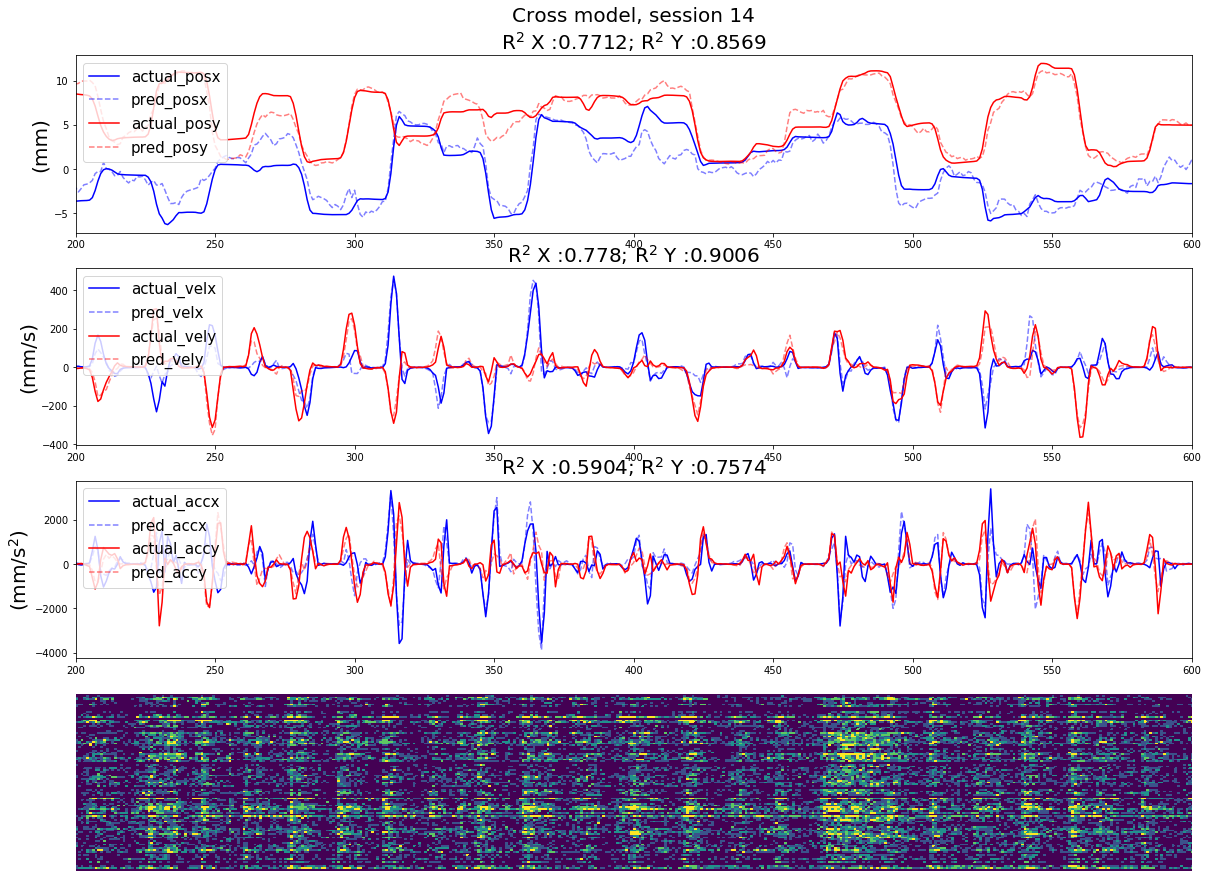

In [294]:
'''
plot observation session
位置 *(-1) 主要是配合論文的圖 ,將normal後的預測數據做還原 在*(-1)
'''
select_s = 13 # if want select sesssion 1 , that select_s==0
ticks = []
for i in range(len(Pred_POS_X_indy[select_s])):
    ticks.append(i)
ticks = np.array(ticks)
bound_down = 200
bound_up = 600

fig, ax_valid = plt.subplots(4,1, figsize=(20,15))
ax_valid[0].set_title('Cross model, session '+str(select_s+1) +
                      '\nR$^{2}$ X :'+ str(R2_POS_X_indy[select_s]) +
                      '; R$^{2}$ Y :'+ str(R2_POS_Y_indy[select_s]), fontsize=20)
ax_valid[0].plot(ticks, Real_POS_X_indy[select_s]*(-1), color = 'b', label='actual_posx')
ax_valid[0].plot(ticks, Pred_POS_X_indy[select_s]*(-1), color = 'b', label='pred_posx',linestyle='dashed', alpha=0.5)
ax_valid[0].plot(ticks, Real_POS_Y_indy[select_s]*(-1), color = 'r', label='actual_posy')
ax_valid[0].plot(ticks, Pred_POS_Y_indy[select_s]*(-1), color = 'r', label='pred_posy',linestyle='dashed', alpha=0.5)
ax_valid[0].set_xlim(bound_down, bound_up)
ax_valid[0].set_ylabel('(mm)', size=20)
ax_valid[0].legend(fontsize=15, loc=2)

ax_valid[1].set_title('R$^{2}$ X :'+ str(R2_VEL_X_indy[select_s]) +
                      '; R$^{2}$ Y :'+ str(R2_VEL_Y_indy[select_s]), fontsize=20)
ax_valid[1].plot(ticks, Real_VEL_X_indy[select_s], color = 'b', label='actual_velx')
ax_valid[1].plot(ticks, Pred_VEL_X_indy[select_s], color = 'b', label='pred_velx',linestyle='dashed', alpha=0.5)
ax_valid[1].plot(ticks, Real_VEL_Y_indy[select_s], color = 'r', label='actual_vely')
ax_valid[1].plot(ticks, Pred_VEL_Y_indy[select_s], color = 'r', label='pred_vely',linestyle='dashed', alpha=0.5)
ax_valid[1].set_xlim(bound_down, bound_up)
ax_valid[1].set_ylabel('(mm/s)', size=20)
ax_valid[1].legend(fontsize=15, loc=2)

ax_valid[2].set_title('R$^{2}$ X :'+ str(R2_ACC_X_indy[select_s]) +
                      '; R$^{2}$ Y :'+ str(R2_ACC_Y_indy[select_s]), fontsize=20)
ax_valid[2].plot(ticks, Real_ACC_X_indy[select_s], color = 'b', label='actual_accx')
ax_valid[2].plot(ticks, Pred_ACC_X_indy[select_s], color = 'b', label='pred_accx',linestyle='dashed', alpha=0.5)
ax_valid[2].plot(ticks, Real_ACC_Y_indy[select_s], color = 'r', label='actual_accy')
ax_valid[2].plot(ticks, Pred_ACC_Y_indy[select_s], color = 'r', label='pred_accy',linestyle='dashed', alpha=0.5)
ax_valid[2].set_xlim(bound_down, bound_up)
ax_valid[2].set_ylabel('(mm/s$^{2}$)', size=20)
ax_valid[2].legend(fontsize=15, loc=2)

fr_data = (SESSION_UNSORTING_FR_64_indy[select_s])[:,5000:5000+Paper_Test_Count_Indy[select_s]]
# cbar 先隱藏掉 為了讓寬度數量配合運動的數量,出圖時 可以另外畫 然後把bar切割
sns.heatmap(fr_data, cmap = 'viridis',vmin=0,vmax=4, cbar=False,
               xticklabels = False,yticklabels = False,cbar_kws = {'orientation' : 'vertical'}, ax = ax_valid[3])
ax_valid[3].set_xlim(bound_down, bound_up)
print()

(200, 600)

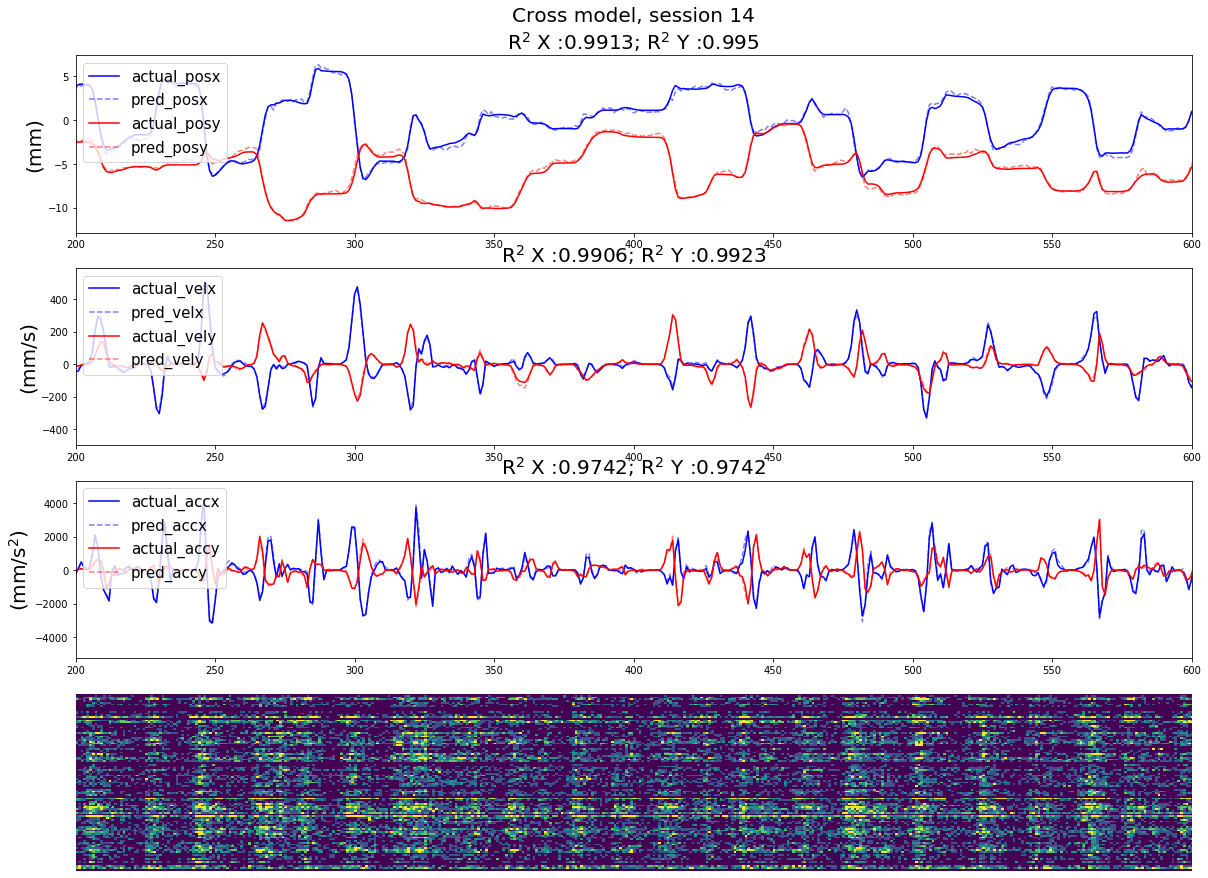

In [318]:
'''
驗證 model 在訓練時是否有學習到
把訓練資料 與 測試資料 個別輸入 "訓練"好的模型
'''
select_s = 13
# ----- real data
select_train_data = (SESSION_UNSORTING_FR_64_indy[select_s])[:,:TRAIN_DATA_COUNT]
train_px = SESSION_POS_X_64_indy[select_s][:TRAIN_DATA_COUNT]
train_py = SESSION_POS_Y_64_indy[select_s][:TRAIN_DATA_COUNT]
train_vx = SESSION_VEL_X_64_indy[select_s][:TRAIN_DATA_COUNT]
train_vy = SESSION_VEL_Y_64_indy[select_s][:TRAIN_DATA_COUNT]
train_ax = SESSION_ACC_X_64_indy[select_s][:TRAIN_DATA_COUNT]
train_ay = SESSION_ACC_Y_64_indy[select_s][:TRAIN_DATA_COUNT]
# ----- pred data 
pred_train_px = Pred_Train_PX_indy[select_s]
pred_train_py = Pred_Train_PY_indy[select_s]
pred_train_vx = Pred_Train_VX_indy[select_s]
pred_train_vy = Pred_Train_VY_indy[select_s]
pred_train_ax = Pred_Train_AX_indy[select_s]
pred_train_ay = Pred_Train_AY_indy[select_s]
(np.round(r2_score(train_px, pred_train_px),4))
#---------------------------------------------
ticks = []
for i in range(len(train_px)):
    ticks.append(i)
ticks = np.array(ticks)
bound_down = 200
bound_up = 600

fig, ax_valid = plt.subplots(4,1, figsize=(20,15))
ax_valid[0].set_title('Cross model, session '+str(select_s+1) +
                      '\nR$^{2}$ X :'+ str(np.round(r2_score(train_px, pred_train_px),4)) +
                      '; R$^{2}$ Y :'+ str(np.round(r2_score(train_py, pred_train_py),4)), fontsize=20)
ax_valid[0].plot(ticks, train_px, color = 'b', label='actual_posx')
ax_valid[0].plot(ticks, pred_train_px, color = 'b', label='pred_posx',linestyle='dashed', alpha=0.5)
ax_valid[0].plot(ticks, train_py, color = 'r', label='actual_posy')
ax_valid[0].plot(ticks, pred_train_py, color = 'r', label='pred_posy',linestyle='dashed', alpha=0.5)
ax_valid[0].set_xlim(bound_down, bound_up)
ax_valid[0].set_ylabel('(mm)', size=20)
ax_valid[0].legend(fontsize=15, loc=2)

ax_valid[1].set_title('R$^{2}$ X :'+ str(np.round(r2_score(train_vx, pred_train_vx),4))  +
                      '; R$^{2}$ Y :'+ str(np.round(r2_score(train_vy, pred_train_vy),4)), fontsize=20)
ax_valid[1].plot(ticks, train_vx, color = 'b', label='actual_velx')
ax_valid[1].plot(ticks, pred_train_vx, color = 'b', label='pred_velx',linestyle='dashed', alpha=0.5)
ax_valid[1].plot(ticks, train_vy, color = 'r', label='actual_vely')
ax_valid[1].plot(ticks, pred_train_vy, color = 'r', label='pred_vely',linestyle='dashed', alpha=0.5)
ax_valid[1].set_xlim(bound_down, bound_up)
ax_valid[1].set_ylabel('(mm/s)', size=20)
ax_valid[1].legend(fontsize=15, loc=2)

ax_valid[2].set_title('R$^{2}$ X :'+ str(np.round(r2_score(train_ax, pred_train_ax),4)) +
                      '; R$^{2}$ Y :'+ str(np.round(r2_score(train_ax, pred_train_ax),4)), fontsize=20)
ax_valid[2].plot(ticks, train_ax, color = 'b', label='actual_accx')
ax_valid[2].plot(ticks, pred_train_ax, color = 'b', label='pred_accx',linestyle='dashed', alpha=0.5)
ax_valid[2].plot(ticks, train_ay, color = 'r', label='actual_accy')
ax_valid[2].plot(ticks, pred_train_ay, color = 'r', label='pred_accy',linestyle='dashed', alpha=0.5)
ax_valid[2].set_xlim(bound_down, bound_up)
ax_valid[2].set_ylabel('(mm/s$^{2}$)', size=20)
ax_valid[2].legend(fontsize=15, loc=2)

# cbar 先隱藏掉 為了讓寬度數量配合運動的數量,出圖時 可以另外畫 然後把bar切割
sns.heatmap(select_train_data, cmap = 'viridis',vmin=0,vmax=4, cbar=False,
               xticklabels = False,yticklabels = False,cbar_kws = {'orientation' : 'vertical'}, ax = ax_valid[3])
ax_valid[3].set_xlim(bound_down, bound_up)

In [257]:
'''
cross data 

'''

train_unsort_cross = torch.from_numpy(CROSS_DATA_UNSORT_indy).type(torch.FloatTensor)
train_label_cross = torch.from_numpy(CROSS_LABEL_indy).type(torch.FloatTensor)
    
print(train_unsort_cross.size())
print(train_label_cross.size())
cross_unsort_dataset = torch.utils.data.TensorDataset(train_unsort_cross, train_label_cross)#  
cross_unsort_dataloader = torch.utils.data.DataLoader(dataset = cross_unsort_dataset, batch_size=32, shuffle=True)

cross_model = model_1(Order_Count= ORDER, Hidden_layer_num = Hidden_Num) 
cross_optim = torch.optim.Adam(cross_model.parameters(), lr=0.0001)
Epoch = 30
loss_MSE = nn.MSELoss()
if device:
    cross_model.to(device)
    loss_MSE.to(device)
for epoch in range(Epoch):
    for n, (Data, Label) in enumerate(cross_unsort_dataloader):
        cross_optim.zero_grad()
        fr_data = Data
        valid_pos = Label[:, -1, :2]
        valid_vel = Label[:, -1, 3:5]
        valid_acc = Label[:, -1, 6:8]

        if torch.cuda.is_available():
            valid_pos = valid_pos.to(device)
            valid_vel = valid_vel.to(device)
            valid_acc = valid_acc.to(device)
            fr_data = fr_data.cuda()

        pred_vel, pred_acc , pred_pos= cross_model(fr_data)
        loss_vel = loss_MSE(pred_vel, valid_vel)
        loss_acc = loss_MSE(pred_acc, valid_acc)
        loss_pos = loss_MSE(pred_pos, valid_pos)
        loss = loss_vel+ loss_acc + loss_pos

        loss.backward()
        cross_optim.step()
    with torch.no_grad():
        print('epoch[{}], loss:{:.4f} >> vel loss:{:.4f}, acc loss:{:.4f}, pos loss:{:.4f}'.format(epoch+1, 
                                                    loss.item(), loss_vel.item(), loss_acc.item(), loss_pos.item()))

torch.Size([185000, 20, 100])
torch.Size([185000, 20, 9])
epoch[1], loss:0.0084 >> vel loss:0.0016, acc loss:0.0012, pos loss:0.0056
epoch[2], loss:0.0039 >> vel loss:0.0007, acc loss:0.0007, pos loss:0.0024
epoch[3], loss:0.0022 >> vel loss:0.0004, acc loss:0.0004, pos loss:0.0014
epoch[4], loss:0.0015 >> vel loss:0.0003, acc loss:0.0004, pos loss:0.0008
epoch[5], loss:0.0030 >> vel loss:0.0010, acc loss:0.0017, pos loss:0.0003
epoch[6], loss:0.0028 >> vel loss:0.0003, acc loss:0.0017, pos loss:0.0007
epoch[7], loss:0.0010 >> vel loss:0.0001, acc loss:0.0005, pos loss:0.0004
epoch[8], loss:0.0012 >> vel loss:0.0003, acc loss:0.0005, pos loss:0.0003
epoch[9], loss:0.0007 >> vel loss:0.0003, acc loss:0.0002, pos loss:0.0002
epoch[10], loss:0.0004 >> vel loss:0.0000, acc loss:0.0001, pos loss:0.0003
epoch[11], loss:0.0007 >> vel loss:0.0001, acc loss:0.0004, pos loss:0.0002
epoch[12], loss:0.0008 >> vel loss:0.0003, acc loss:0.0002, pos loss:0.0002
epoch[13], loss:0.0005 >> vel loss:0.00

In [120]:
'''
loco
training cross data prepare
&& 
single model
'''

CROSS_DATA_UNSORT_loco = []
CROSS_LABEL_loco = []
CROSS_DATA_SORT_loco = []

R2_POS_X_loco = []
R2_POS_Y_loco = []
R2_VEL_X_loco = []
R2_VEL_Y_loco = []
R2_ACC_X_loco = []
R2_ACC_Y_loco = []

for index in range(len(SESSION_UNSORTING_FR_64_loco)):
    print('\n------------ Session '+str(index+1)+'-----------')
    print('total session data :', np.transpose(SESSION_UNSORTING_FR_64_loco[index]).shape[0])
    testing_data_count = Paper_Test_Count_Loco[index]
    print('training data count : 5000 ; Testing data count(same wiht Markin paper) :', testing_data_count)
    
    fr_unsort = []
    fr_sort = []
    pos_x = [] 
    pos_y = []
    pos_z = []
    
    vel_x = []
    vel_y = []
    vel_z = []
    
    acc_x = []
    acc_y = []
    acc_z = []
    fr_unsort = np.transpose(SESSION_UNSORTING_FR_64_loco[index])
    if UseSortData == True:
        fr_sort = (SESSION_SORTING_FR_64_loco[index]).transpose(2, 0, 1) 
    
    pos_x = SESSION_POS_X_64_loco[index].reshape(len(SESSION_POS_X_64_loco[index]),1) #
    pos_y = SESSION_POS_Y_64_loco[index].reshape(len(SESSION_POS_Y_64_loco[index]),1)
    pos_z = SESSION_POS_Z_64_loco[index].reshape(len(SESSION_POS_Z_64_loco[index]),1)
    
    vel_x = SESSION_VEL_X_64_loco[index].reshape(len(SESSION_VEL_X_64_loco[index]), 1)
    vel_y = SESSION_VEL_Y_64_loco[index].reshape(len(SESSION_VEL_Y_64_loco[index]), 1)
    vel_z = SESSION_VEL_Z_64_loco[index].reshape(len(SESSION_VEL_Z_64_loco[index]), 1)
    
    acc_x = SESSION_ACC_X_64_loco[index].reshape(len(SESSION_ACC_X_64_loco[index]), 1)
    acc_y = SESSION_ACC_Y_64_loco[index].reshape(len(SESSION_ACC_Y_64_loco[index]), 1)
    acc_z = SESSION_ACC_Z_64_loco[index].reshape(len(SESSION_ACC_Z_64_loco[index]), 1)
    # ------------------------Normalize Data-----------------------------------------
    # 只能使用前5000筆 training data 取均值或標準差 做 normalize
    pos_x_mean, pos_x_max , pos_x_min = np.mean(pos_x[:5000, 0]), np.max(pos_x[:5000, 0]), np.min(vel_x[:5000, 0])
    pos_y_mean, pos_y_max , pos_y_min = np.mean(pos_y[:5000, 0]), np.max(pos_y[:5000, 0]), np.min(vel_y[:5000, 0])
    pos_z_mean, pos_z_max , pos_z_min = np.mean(pos_z[:5000, 0]), np.max(pos_z[:5000, 0]), np.min(vel_z[:5000, 0])
    
    vel_x_mean, vel_x_max , vel_x_min = np.mean(vel_x[:5000, 0]), np.max(vel_x[:5000, 0]), np.min(vel_x[:5000, 0])
    vel_y_mean, vel_y_max , vel_y_min = np.mean(vel_y[:5000, 0]), np.max(vel_y[:5000, 0]), np.min(vel_y[:5000, 0])
    vel_z_mean, vel_z_max , vel_z_min = np.mean(vel_z[:5000, 0]), np.max(vel_z[:5000, 0]), np.min(vel_z[:5000, 0])
    
    acc_x_mean, acc_x_max , acc_x_min = np.mean(acc_x[:5000, 0]), np.max(acc_x[:5000, 0]), np.min(acc_x[:5000, 0])
    acc_y_mean, acc_y_max , acc_y_min = np.mean(acc_y[:5000, 0]), np.max(acc_y[:5000, 0]), np.min(acc_y[:5000, 0])
    acc_z_mean, acc_z_max , acc_z_min = np.mean(acc_z[:5000, 0]), np.max(acc_z[:5000, 0]), np.min(acc_z[:5000, 0])
    # -----------------------------------------------------------------
    
    # split train data 
    train_fr_unsort = fr_unsort[:TRAIN_DATA_COUNT]
    if UseSortData == True:
        train_fr_sort = fr_sort[:TRAIN_DATA_COUNT]

    train_pos_x = pos_x[:TRAIN_DATA_COUNT]
    train_pos_y = pos_y[:TRAIN_DATA_COUNT]
    train_pos_z = pos_z[:TRAIN_DATA_COUNT]

    train_vel_x = vel_x[:TRAIN_DATA_COUNT]
    train_vel_y = vel_y[:TRAIN_DATA_COUNT]
    train_vel_z = vel_z[:TRAIN_DATA_COUNT]
    
    train_acc_x = acc_x[:TRAIN_DATA_COUNT]
    train_acc_y = acc_y[:TRAIN_DATA_COUNT]
    train_acc_z = acc_z[:TRAIN_DATA_COUNT]

    # concatenate var
    session_pos = np.hstack((train_pos_x, train_pos_y ,train_pos_z))
    session_vel = np.hstack((train_vel_x, train_vel_y, train_vel_z)) 
    session_acc = np.hstack((train_acc_x, train_acc_y, train_acc_z))

    # ------------------------ Data add ORDER(training / testing) ------------------------
    print(' === training data (order)=== ')
    # training label
    pos_order = []
    pre_order = []
    pre_data = []
    pre_order = np.zeros([ORDER, session_pos.shape[1]])
    pre_data = np.concatenate((pre_order, session_pos), axis=0)
    for kk in range(ORDER):
        n = pre_data[kk :(kk-ORDER)]
        data = n.reshape(n.shape[0], 1, n.shape[1])
        if kk == 0:
            pos_order = data
        else:
            pos_order = np.concatenate((pos_order, data), axis=1)
    pos_order = np.concatenate((pos_order, session_pos.reshape(session_pos.shape[0], 1,
                                                                    session_pos.shape[1])), axis=1)
    print('Train Position Data(order):', pos_order.shape)
    
    vel_order = []
    pre_order = []
    pre_data = []
    pre_order = np.zeros([ORDER, session_vel.shape[1]])
    pre_data = np.concatenate((pre_order, session_vel), axis=0)
    for kk in range(ORDER):
        n = pre_data[kk :(kk-ORDER)]
        data = n.reshape(n.shape[0], 1, n.shape[1])
        if kk == 0:
            vel_order = data
        else:
            vel_order = np.concatenate((vel_order, data), axis=1)
    vel_order = np.concatenate((vel_order, session_vel.reshape(session_vel.shape[0], 1,
                                                                     session_vel.shape[1])), axis=1)
    print('Train Velocity Data(order):', pos_order.shape)
    
    acc_order = []
    pre_order = []
    pre_data = []
    pre_order = np.zeros([ORDER, session_acc.shape[1]])
    pre_data = np.concatenate((pre_order, session_acc), axis=0)
    for kk in range(ORDER):
        n = pre_data[kk :(kk-ORDER)]
        data = n.reshape(n.shape[0], 1, n.shape[1])
        if kk == 0:
            acc_order = data
        else:
            acc_order = np.concatenate((acc_order, data), axis=1)
    acc_order = np.concatenate((acc_order, session_acc.reshape(session_acc.shape[0], 1,
                                                                     session_acc.shape[1])), axis =1)
    print('Train Accelerate Data(order):', acc_order.shape)
        # training data
    fr_unsort_order = [] # unsort firing rate
    pre_order =[]
    pre_data =[]
    pre_order = np.zeros([ORDER, train_fr_unsort.shape[1]])
    pre_data = np.concatenate((pre_order, train_fr_unsort), axis=0)
    for kk in range(ORDER):
        n = pre_data[kk :(kk-ORDER)]
        data = n.reshape(n.shape[0], 1, n.shape[1])
        if kk == 0:
            fr_unsort_order = data
        else:
            fr_unsort_order = np.concatenate((fr_unsort_order, data), axis=1)
    fr_unsort_order = np.concatenate((fr_unsort_order,  train_fr_unsort.reshape(train_fr_unsort.shape[0], 1,
                                                                      train_fr_unsort.shape[1])), axis=1)
    print('Train Unsort Data(order):', fr_unsort_order.shape)
    if UseSortData == True:
        fr_sort_order = [] # sorting firing rate 排列 [tb, unit, order, el_ch]
        pre_order =[]
        pre_data =[]
        pre_order = np.zeros([ORDER, train_fr_sort.shape[1], train_fr_sort.shape[2]])
        pre_data = np.concatenate((pre_order, train_fr_sort), axis=0)
        for kk in range(ORDER):
            n = pre_data[kk :(kk-ORDER)]
            data = n.reshape(n.shape[0], n.shape[1], 1, n.shape[2])
            if kk == 0:
                fr_sort_order = data
            else:
                fr_sort_order = np.concatenate((fr_sort_order, data), axis=2)
        fr_sort_order = np.concatenate((fr_sort_order, 
                                   train_fr_sort.reshape(train_fr_sort.shape[0], 
                                                         train_fr_sort.shape[1], 1,train_fr_sort.shape[2])), axis=2)
        # [time_bin, unit_ch]
        # print(fr_sort[0, 1]) #用以檢查unit order 排列的正確性
        #  print(fr_sort[1, 1])
        #  print(fr_sort_order[1, 1])
        print('Train Sorting Data(order):', fr_sort_order.shape)
    #------- cross data for cross model -------------------------------
    cross_label = np.concatenate((pos_order, vel_order, acc_order), axis=2)

    if index == 0:
        CROSS_DATA_UNSORT_indy = fr_unsort_order
        CROSS_LABEL_indy = cross_label
        if UseSortData == True:
            CROSS_DATA_SORT_indy = fr_sort_order
    else:
        CROSS_DATA_UNSORT_indy = np.concatenate((CROSS_DATA_UNSORT_indy, fr_unsort_order), axis=0)
        CROSS_LABEL_indy = np.concatenate((CROSS_LABEL_indy, cross_label), axis=0)
        if UseSortData == True:
            CROSS_DATA_SORT_indy = np.concatenate((CROSS_DATA_SORT, fr_sort_order), axis = 0)
    #-------------------------------------------------------------------
    print(' === testing data === ')
    test_fr_unsort = fr_unsort[5000:5000+testing_data_count]
    test_fr_sort = fr_sort[5000:5000+testing_data_count]

    test_pos_x = pos_x[5000:5000+testing_data_count]
    test_pos_y = pos_y[5000:5000+testing_data_count]
    test_pos_z = pos_z[5000:5000+testing_data_count]

    test_vel_x = vel_x[5000:5000+testing_data_count]
    test_vel_y = vel_y[5000:5000+testing_data_count]
    test_vel_z = vel_z[5000:5000+testing_data_count]
    
    test_acc_x = acc_x[5000:5000+testing_data_count]
    test_acc_y = acc_y[5000:5000+testing_data_count]
    test_acc_z = acc_z[5000:5000+testing_data_count]
    
    # test order
    test_fr_unsort_order = []
    pre_order = []
    pre_data = []
    pre_order = np.zeros([ORDER, test_fr_unsort.shape[1]])
    pre_data = np.concatenate((pre_order, test_fr_unsort), axis=0)
    for kk in range(ORDER):
        n = pre_data[kk :(kk-ORDER)]
        data = n.reshape(n.shape[0], 1, n.shape[1])
        if kk == 0:
            test_fr_unsort_order = data
        else:
            test_fr_unsort_order = np.concatenate((test_fr_unsort_order, data), axis=1)
    test_fr_unsort_order = np.concatenate((test_fr_unsort_order, 
                                           test_fr_unsort.reshape(test_fr_unsort.shape[0], 1,
                                                                        test_fr_unsort.shape[1])), axis=1)
    print('Test Unsort Data(order):', test_fr_unsort_order.shape)
    if UseSortData == True:
        test_fr_sort_order = []
        pre_order = []
        pre_data = []
        pre_order = np.zeros([ORDER, test_fr_sort.shape[1], test_fr_sort.shape[2]])
        pre_data = np.concatenate((pre_order, test_fr_sort), axis = 0)
        for kk in range(ORDER):
            n = pre_data[kk :(kk-ORDER)]
            data = n.reshape(n.shape[0], n.shape[1], 1, n.shape[2])
            if kk == 0:
                test_fr_sort_order = data
            else:
                test_fr_sort_order = np.concatenate((test_fr_sort_order, data), axis=2)
        test_fr_sort_order = np.concatenate((test_fr_sort_order, test_fr_sort.reshape(test_fr_sort.shape[0], test_fr_sort.shape[1], 1,
                                                                   test_fr_sort.shape[2])), axis =2)
        print('Test Sorting Data(order):',test_fr_sort_order.shape)
print('\n-------------------\n')
print('CROSS_DATA_UNSORT :', CROSS_DATA_UNSORT_indy.shape)
print('CROSS_LABEL_POS :', CROSS_LABEL_indy.shape)
print('cross data end')


------------ Session 1-----------
total session data : 27630
training data count : 5000 ; Testing data count(same wiht Markin paper) : 2500
 === training data (order)=== 
Train Position Data(order): (5000, 6, 3)
Train Velocity Data(order): (5000, 6, 3)
Train Accelerate Data(order): (5000, 6, 3)
Train Unsort Data(order): (5000, 6, 100)
 === testing data === 
Test Unsort Data(order): (2500, 6, 100)

------------ Session 2-----------
total session data : 37772
training data count : 5000 ; Testing data count(same wiht Markin paper) : 26200
 === training data (order)=== 
Train Position Data(order): (5000, 6, 3)
Train Velocity Data(order): (5000, 6, 3)
Train Accelerate Data(order): (5000, 6, 3)
Train Unsort Data(order): (5000, 6, 100)
 === testing data === 
Test Unsort Data(order): (26200, 6, 100)

------------ Session 3-----------
total session data : 49987
training data count : 5000 ; Testing data count(same wiht Markin paper) : 5859
 === training data (order)=== 
Train Position Data(orde

In [ ]:
'''
'''